# XStoryCloze Evaluation

In [356]:
import pandas as pd


def get_dfs(model_names, dataset_name="xstory_cloze"):
    acc_df = pd.DataFrame()
    ppl_cor_df = pd.DataFrame()
    ppl_inc_df = pd.DataFrame()

    for model_name in model_names:
        name = model_name.split("/")[-1]
        metrics_df = pd.read_csv(
            f"../results/{dataset_name}_{name}_metrics.tsv", delimiter="\t"
        )
        acc_df["lang"] = metrics_df["lang"]
        ppl_cor_df["lang"] = metrics_df["lang"]
        ppl_inc_df["lang"] = metrics_df["lang"]
        acc_df[name] = metrics_df["acc"]
        ppl_cor_df[name] = metrics_df["ppl_cor"]
        ppl_inc_df[name] = metrics_df["ppl_inc"]

    return acc_df, ppl_cor_df, ppl_inc_df


import matplotlib.pyplot as plt


def plot_df(df, title):
    df.plot.bar()
    plt.title(title)
    plt.xticks(list(range(len(df["lang"]))), df["lang"], rotation="vertical")
    plt.show()


def plot_size_df(df, model_sizes, model_names, title):
    dft = df.set_index("lang").T
    dft["size"] = model_sizes
    dft.plot(x="size", marker="o")
    plt.title(title)
    plt.xticks(model_sizes, model_sizes, rotation="vertical");


## GPT3 EUS

In [357]:
gpt3_eus_model_names = [
    "/gscratch4/users/aormazabal024/GPT3_EUS/to_share/spm_model",
    "/gscratch4/users/aormazabal024/GPT3_EUS/to_share/bpe_model",
]
gpt3_eus_model_sizes = [0.35, 0.35]
gpt3_eus_names = [name.split("/")[-1] for name in gpt3_eus_model_names]
acc_df_gpt3_eus, ppl_cor_df_gpt3_eus, ppl_inc_df_gpt3_eus = get_dfs(
    gpt3_eus_model_names
)


In [358]:
display(acc_df_gpt3_eus)
display(ppl_cor_df_gpt3_eus)
display(ppl_inc_df_gpt3_eus)


lang  spm_model  bpe_model
0    eu       55.2       52.3
1   avg       49.8       52.3
2   NaN       49.9        NaN
3   NaN       51.4        NaN
4   NaN       50.6        NaN
5   NaN       52.0        NaN
6   NaN       53.0        NaN
7   NaN       45.8        NaN
8   NaN       51.5        NaN
9   NaN       54.7        NaN
10  NaN       52.0        NaN
11  NaN       51.4        NaN

lang  spm_model  bpe_model
0    eu      64.78      86.75
1   avg       1.76      86.75
2   NaN       5.79        NaN
3   NaN      53.05        NaN
4   NaN       1.59        NaN
5   NaN       1.37        NaN
6   NaN     709.57        NaN
7   NaN       1.75        NaN
8   NaN     474.17        NaN
9   NaN      55.63        NaN
10  NaN       1.41        NaN
11  NaN     124.62        NaN

lang  spm_model  bpe_model
0    eu      66.48      87.83
1   avg       1.76      87.83
2   NaN       5.78        NaN
3   NaN      53.73        NaN
4   NaN       1.59        NaN
5   NaN       1.37        NaN
6   NaN     718.14        NaN
7   NaN       1.75        NaN
8   NaN     476.46        NaN
9   NaN      57.15        NaN
10  NaN       1.42        NaN
11  NaN     125.97        NaN

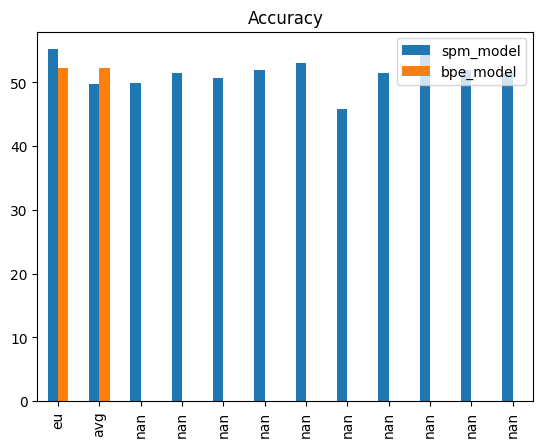

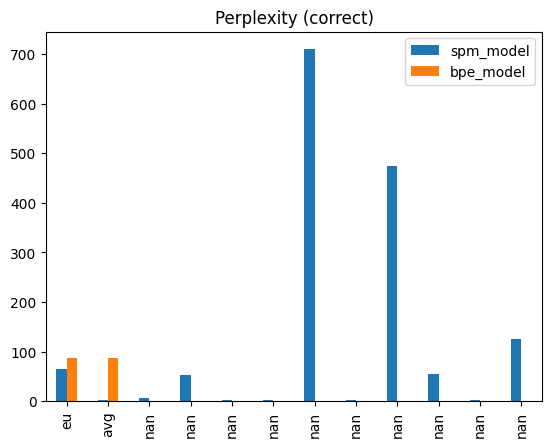

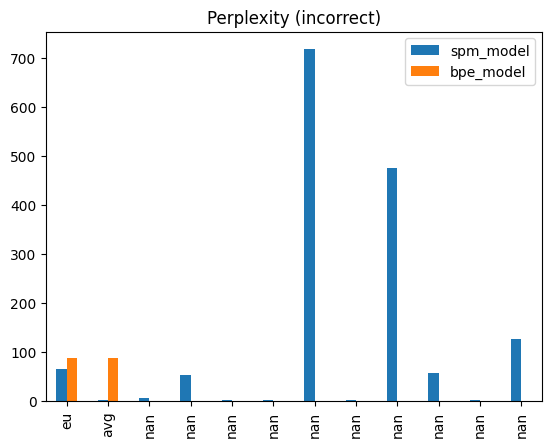

In [359]:
plot_df(acc_df_gpt3_eus, "Accuracy")
plot_df(ppl_cor_df_gpt3_eus, "Perplexity (correct)")
plot_df(ppl_inc_df_gpt3_eus, "Perplexity (incorrect)")


## GPT2 EUS

In [360]:
gpt2_eus_model_names = [
    "HiTZ/gpt2-eus-euscrawl",
    # "HiTZ/gpt2-eus-mc4",
    # "HiTZ/gpt2-eus-cc100",
    # "HiTZ/gpt2-medium-eus-euscrawl"
]
gpt2_eus_model_sizes = [0.125]
gpt2_eus_names = [name.split("/")[-1] for name in gpt2_eus_model_names]
acc_df_gpt2_eus, ppl_cor_df_gpt2_eus, ppl_inc_df_gpt2_eus = get_dfs(
    gpt2_eus_model_names
)


In [361]:
display(acc_df_gpt2_eus)
display(ppl_cor_df_gpt2_eus)
display(ppl_inc_df_gpt2_eus)


lang  gpt2-eus-euscrawl
0    en               51.2
1    ru               52.4
2    zh               55.1
3    es               53.0
4    ar               52.6
5    hi               49.3
6    id               52.2
7    te               55.6
8    sw               50.2
9    eu               54.1
10   my               51.4
11  avg               52.5

lang  gpt2-eus-euscrawl
0    en              72.56
1    ru              16.08
2    zh              27.58
3    es              69.64
4    ar               8.89
5    hi               6.26
6    id             780.86
7    te               5.24
8    sw             420.45
9    eu              61.10
10   my               5.97
11  avg             134.06

lang  gpt2-eus-euscrawl
0    en              73.44
1    ru              16.20
2    zh              27.92
3    es              70.45
4    ar               8.92
5    hi               6.26
6    id             787.68
7    te               5.26
8    sw             420.66
9    eu              62.52
10   my               5.97
11  avg             135.03

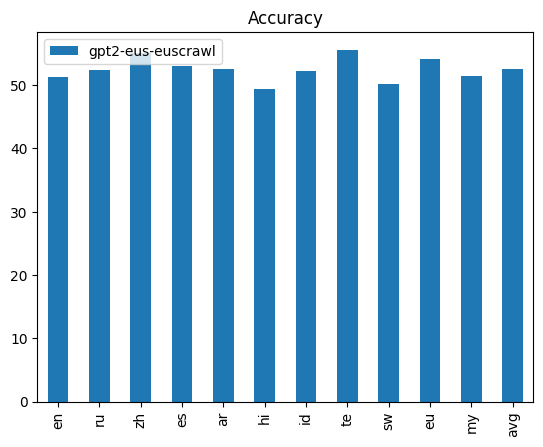

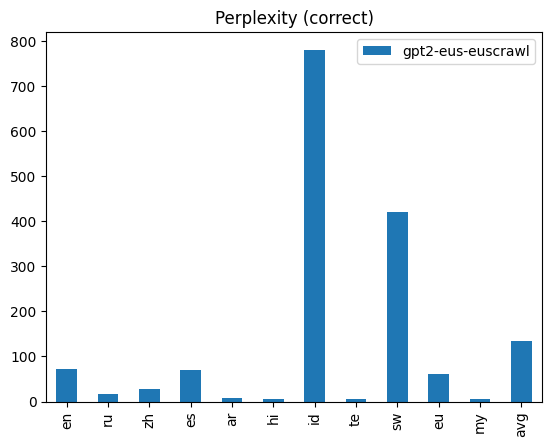

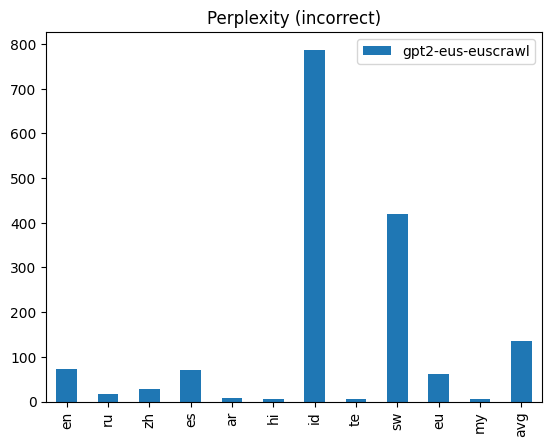

In [362]:
plot_df(acc_df_gpt2_eus, "Accuracy")
plot_df(ppl_cor_df_gpt2_eus, "Perplexity (correct)")
plot_df(ppl_inc_df_gpt2_eus, "Perplexity (incorrect)")


## mGPT

In [363]:
mgpt_model_names = ["sberbank-ai/mGPT"]
mgpt_model_sizes = [1.3]
mgpt_names = [name.split("/")[-1] for name in mgpt_model_names]
acc_df_mgpt, ppl_cor_df_mgpt, ppl_inc_df_mgpt = get_dfs(mgpt_model_names)


In [364]:
metrics_df = pd.read_csv(f"../results/xstory_cloze_mGPT_metrics.tsv", delimiter="\t")
metrics_df


lang   acc  ppl_cor  ppl_inc
0    en  63.2    20.67    21.80
1    ru  61.3    12.86    13.30
2    zh  57.0    17.21    17.63
3    es  58.8    17.40    18.01
4    ar  53.3    24.25    24.61
5    hi  56.5     4.42     4.48
6    id  58.8    19.37    20.06
7    te  58.2     3.57     3.63
8    sw  57.8    12.47    12.82
9    eu  55.9    16.91    17.28
10   my  57.0     3.63     3.67
11  avg  58.0    13.89    14.30

In [365]:
metrics_mt_df = pd.read_csv(
    f"../results/xstory_cloze_mt_nllb-3B_mGPT_metrics.tsv", delimiter="\t"
)
metrics_mt_df


lang   acc  ppl_cor  ppl_inc
0    en  63.2    20.67    21.80
1    ru  63.5    18.39    19.42
2    zh  62.5    18.94    19.92
3    es  63.9    19.62    20.62
4    ar  61.0    21.12    22.13
5    hi  60.0    20.74    21.76
6    id  59.7    21.49    22.45
7    te  60.9    22.48    23.45
8    sw  61.3    20.87    21.86
9    eu  61.2    19.41    20.41
10   my  60.8    19.35    20.28
11  avg  61.6    20.28    21.28

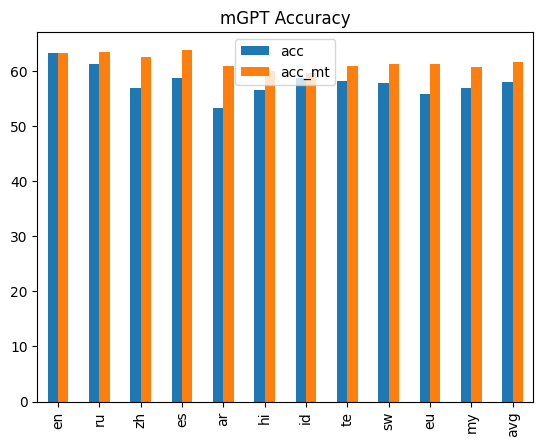

In [366]:
metrics_df["acc_mt"] = metrics_mt_df["acc"]
metrics_df["ppl_cor_mt"] = metrics_mt_df["ppl_cor"]
metrics_df["ppl_inc_mt"] = metrics_mt_df["ppl_inc"]
plot_df(metrics_df[["lang", "acc", "acc_mt"]], "mGPT Accuracy")


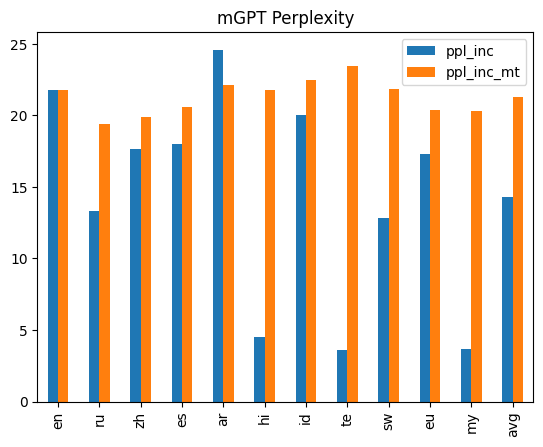

In [367]:
plot_df(metrics_df[["lang", "ppl_inc", "ppl_inc_mt"]], "mGPT Perplexity")


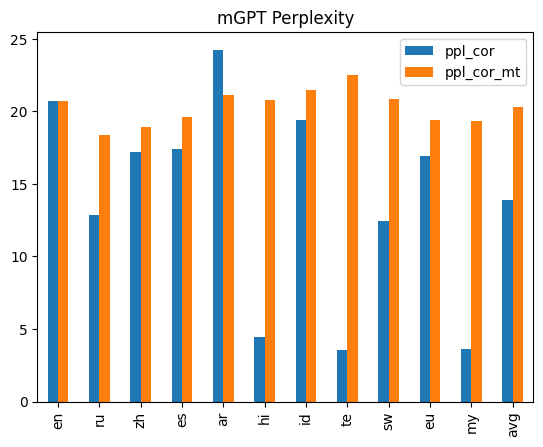

In [368]:
plot_df(metrics_df[["lang", "ppl_cor", "ppl_cor_mt"]], "mGPT Perplexity")


## XGLM

In [369]:
xglm_model_names = [
    "facebook/xglm-564M",
    "facebook/xglm-1.7B",
    "facebook/xglm-2.9B",
    "facebook/xglm-4.5B",
    "facebook/xglm-7.5B",
]
xglm_model_sizes = [0.56, 1.7, 2.9, 4.5, 7.5]
xglm_names = [name.split("/")[-1] for name in xglm_model_names]
acc_df_xglm, ppl_cor_df_xglm, ppl_inc_df_xglm = get_dfs(xglm_model_names)


In [370]:
display(acc_df_xglm)
display(ppl_cor_df_xglm)
display(ppl_inc_df_xglm)


lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en       61.3       66.6       69.6       72.1       73.7
1    ru       59.5       62.8       67.2       66.8       69.0
2    zh       56.3       60.2       64.1       64.4       65.9
3    es       56.5       60.6       64.6       66.4       66.7
4    ar       53.9       55.6       57.7       57.7       58.5
5    hi       54.2       56.8       59.4       57.1       59.5
6    id       56.8       61.5       65.5       65.6       68.0
7    te       56.9       58.4       59.4       58.7       60.6
8    sw       56.4       60.8       60.8       60.1       63.3
9    eu       55.1       57.5       58.4       55.3       61.7
10   my       54.5       56.4       57.2       55.3       60.4
11  avg       56.5       59.7       62.2       61.8       64.3

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      21.41      17.18      15.57      14.67      14.43
1    ru      21.55      16.51      15.07      14.10      13.86
2    zh      33.26      25.65      22.72      21.26      20.70
3    es      24.74      18.75      16.70      15.69      15.10
4    ar      44.25      31.90      26.17      27.32      23.48
5    hi      23.14      18.21      16.33      20.63      15.31
6    id      42.47      31.93      28.09      28.64      25.71
7    te      29.10      24.68      20.60      26.38      18.81
8    sw      47.24      33.23      28.51      46.27      25.16
9    eu      34.55      23.12      20.18     104.26      18.94
10   my      20.04      15.68      13.85      31.75      13.34
11  avg      31.07      23.35      20.34      31.91      18.62

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      22.50      18.41      16.91      16.04      15.83
1    ru      22.32      17.34      16.02      15.01      14.83
2    zh      34.08      26.61      23.86      22.41      21.92
3    es      25.50      19.58      17.64      16.65      16.10
4    ar      44.79      32.59      26.96      28.11      24.31
5    hi      23.48      18.64      16.85      21.24      15.84
6    id      44.09      33.73      30.13      30.72      27.88
7    te      29.89      25.52      21.42      27.34      19.62
8    sw      48.73      34.70      29.92      48.24      26.57
9    eu      35.48      23.84      20.93     107.33      19.77
10   my      20.31      16.01      14.21      32.31      13.77
11  avg      31.92      24.27      21.35      33.22      19.68

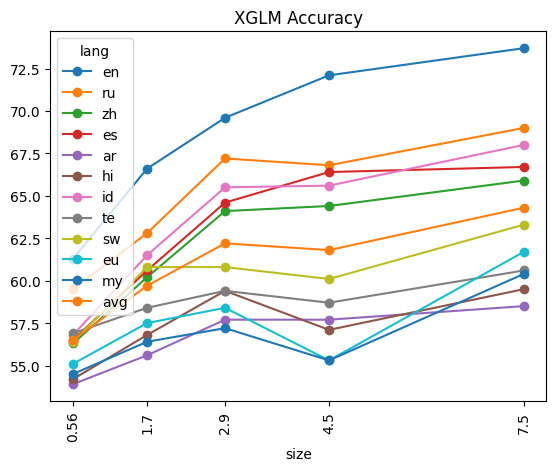

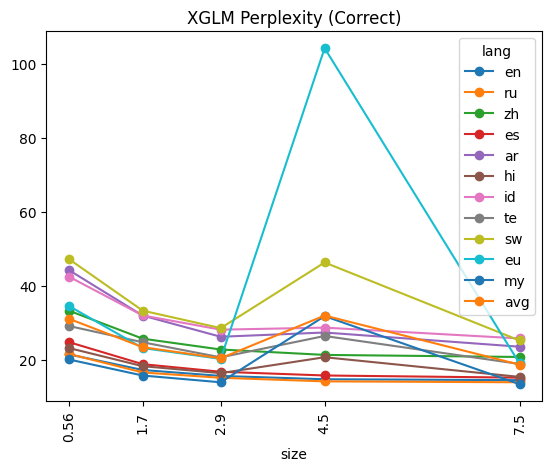

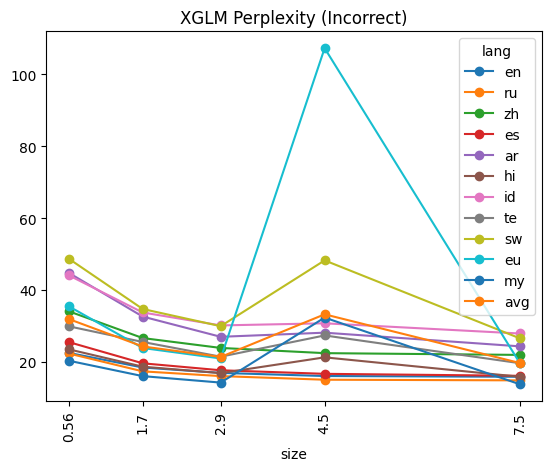

In [371]:
plot_size_df(acc_df_xglm, xglm_model_sizes, xglm_names, "XGLM Accuracy")
plot_size_df(ppl_cor_df_xglm, xglm_model_sizes, xglm_names, "XGLM Perplexity (Correct)")
plot_size_df(
    ppl_inc_df_xglm, xglm_model_sizes, xglm_names, "XGLM Perplexity (Incorrect)"
)


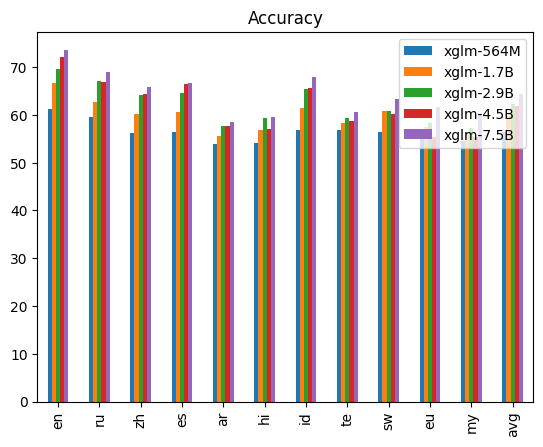

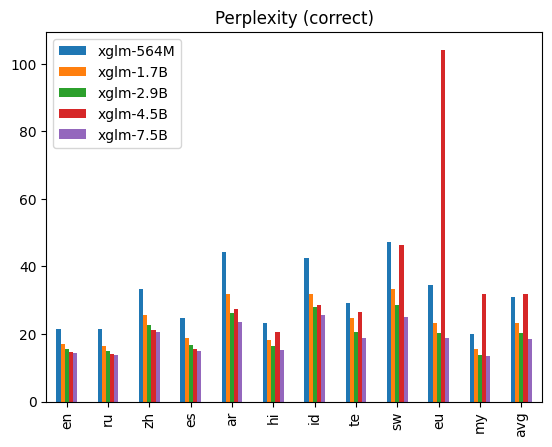

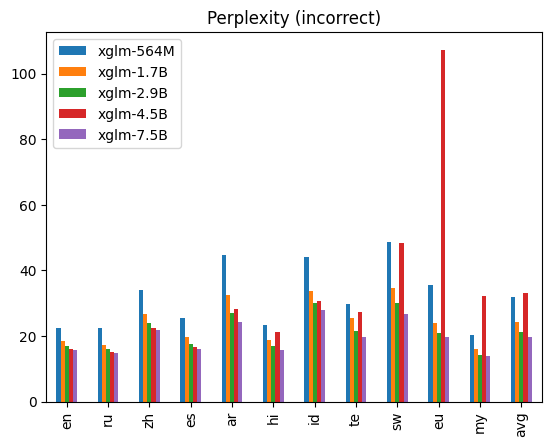

In [372]:
plot_df(acc_df_xglm, "Accuracy")
plot_df(ppl_cor_df_xglm, "Perplexity (correct)")
plot_df(ppl_inc_df_xglm, "Perplexity (incorrect)")


## BLOOM

In [373]:
bloom_model_names = [
    "bigscience/bloom-560m",
    "bigscience/bloom-1b1",
    "bigscience/bloom-1b7",
    "bigscience/bloom-3b",
    "bigscience/bloom-7b1",
]
bloom_names = [name.split("/")[-1] for name in bloom_model_names]
bloom_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1]
acc_df_bloom, ppl_cor_df_bloom, ppl_inc_df_bloom = get_dfs(bloom_model_names)


In [374]:
display(acc_df_bloom)
display(ppl_cor_df_bloom)
display(ppl_inc_df_bloom)


lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en        64.1       67.4       70.0      72.1       74.9
1    ru        55.3       54.3       56.7      57.7       59.2
2    zh        58.8       63.3       65.0      67.3       69.4
3    es        58.7       61.3       64.3      67.0       70.1
4    ar        52.7       56.5       56.0      59.6       62.5
5    hi        54.3       56.7       57.8      58.6       62.7
6    id        56.9       61.8       62.9      66.8       69.4
7    te        55.2       55.3       56.0      58.5       57.5
8    sw        52.7       53.7       57.7      58.0       59.2
9    eu        53.8       53.8       55.7      57.2       59.0
10   my        52.7       53.3       52.4      52.1       54.2
11  avg        55.9       57.9       59.5      61.4       63.5

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       25.17      21.03      18.82     16.70      14.87
1    ru       27.34      22.23      17.14     14.61      11.75
2    zh       50.50      41.78      36.88     33.22      29.73
3    es       23.78      20.01      17.83     16.09      14.66
4    ar       61.01      47.04      40.49     35.01      30.16
5    hi       36.25      30.39      25.89     23.60      20.80
6    id      421.08      49.98      42.55     35.84      31.89
7    te      166.78     115.38      64.08     63.15      50.55
8    sw      513.69     356.80     175.12    131.60      88.72
9    eu      116.24      88.00      60.89     50.50      41.14
10   my        4.04       3.76       3.36      3.19       3.16
11  avg      131.44      72.40      45.73     38.50      30.68

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       26.79      22.58      20.45     18.33      16.53
1    ru       28.00      22.70      17.57     15.02      12.14
2    zh       53.13      44.53      39.61     36.03      32.65
3    es       24.75      20.99      18.92     17.24      15.88
4    ar       62.20      48.42      42.00     36.57      31.93
5    hi       37.08      31.29      26.75     24.59      21.81
6    id      443.79      52.86      45.52     38.68      34.95
7    te      171.31     118.89      66.10     65.51      52.52
8    sw      529.58     365.86     182.30    137.75      93.63
9    eu      118.98      90.22      62.87     52.24      43.03
10   my        4.06       3.77       3.37      3.19       3.18
11  avg      136.33      74.74      47.77     40.47      32.57

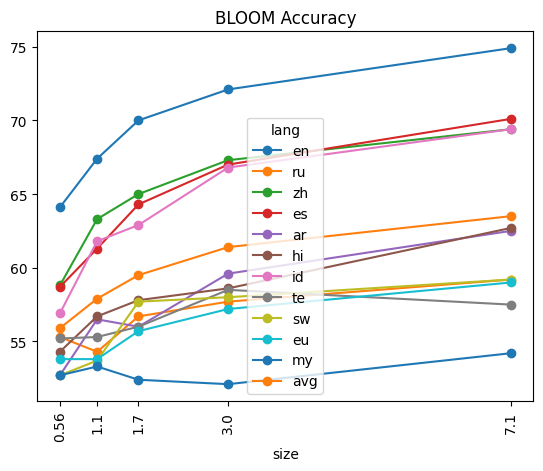

In [375]:
plot_size_df(acc_df_bloom, bloom_model_sizes, bloom_names, "BLOOM Accuracy")


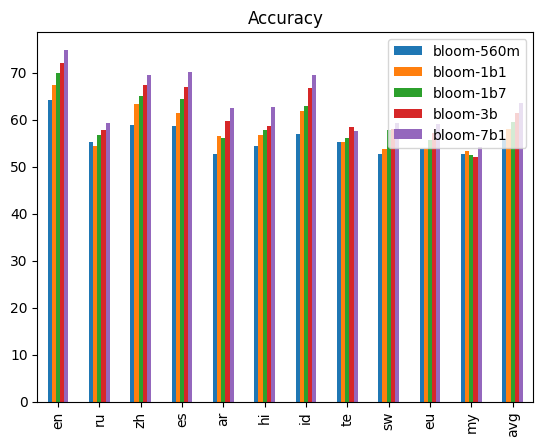

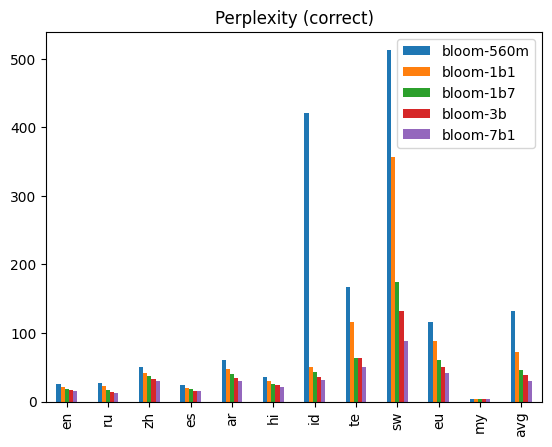

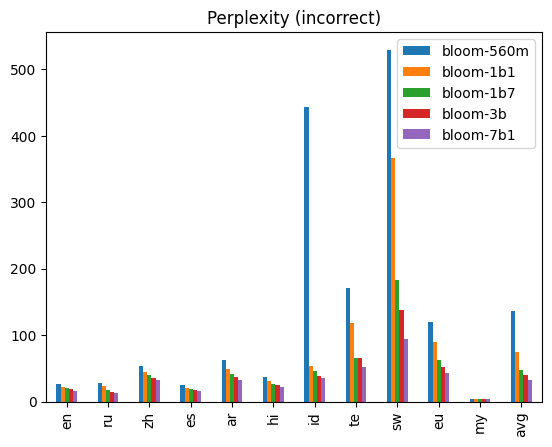

In [376]:
plot_df(acc_df_bloom, "Accuracy")
plot_df(ppl_cor_df_bloom, "Perplexity (correct)")
plot_df(ppl_inc_df_bloom, "Perplexity (incorrect)")


## BLOOMZ

In [377]:
bloomz_model_names = [
    "bigscience/bloomz-560m",
    "bigscience/bloomz-1b1",
    "bigscience/bloomz-1b7",
    "bigscience/bloomz-3b",
    "bigscience/bloomz-7b1",
    "bigscience/bloomz-7b1-mt",
    "bigscience/bloomz-7b1-p3",
]
bloomz_names = [name.split("/")[-1] for name in bloomz_model_names]
bloomz_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1, 7.1, 7.1]
acc_df_bloomz, ppl_cor_df_bloomz, ppl_inc_df_bloomz = get_dfs(bloomz_model_names)


In [378]:
display(acc_df_bloomz)
display(ppl_cor_df_bloomz)
display(ppl_inc_df_bloomz)


lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en         66.0        68.8        72.4       74.4        78.0   
1    ru         54.9        53.5        55.1       56.2        56.8   
2    zh         62.3        64.3        63.1       62.9        66.8   
3    es         60.0        62.3        60.4       58.3        68.0   
4    ar         55.2        58.1        56.3       56.3        60.8   
5    hi         54.6        57.4        55.1       55.3        59.6   
6    id         50.6        62.9        57.9       58.2        61.5   
7    te         52.5        55.0        52.0       52.8        55.3   
8    sw         53.4        53.5        52.4       53.8        54.9   
9    eu         47.1        52.0        47.2       45.9        52.9   
10   my         52.2        53.3        54.5       53.0        54.3   
11  avg         55.3        58.3        56.9       57.0        60.8   

    bloomz-7b1-mt  bloomz-7b1-p3  
0            78.4           78.1  
1            57.0           59.1  
2            67.6           73.2  
3            67.5           69.2  
4            62.1           66.5  
5            57.8           65.8  
6            61.2           67.5  
7            54.5           59.2  
8            56.2           59.2  
9            51.1           59.1  
10           54.7           54.1  
11           60.7           64.6

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        24.69       20.04       18.57      16.90       15.18   
1    ru       336.42       29.06      275.05      71.41       35.33   
2    zh        55.72       39.26      201.04    1328.52      229.26   
3    es        30.23       19.97       68.04     111.60       33.56   
4    ar       457.17       46.39      323.19     615.79      110.64   
5    hi       645.07       32.66     4906.12    4065.63      469.22   
6    id  27358560.60       64.19     3687.49    3650.53     2574.75   
7    te      5606.46       97.41    28257.47   27149.30     3633.10   
8    sw      1426.43      349.50     1806.27    3225.77     2088.35   
9    eu      6841.67      288.67    28747.34   22186.82     4138.25   
10   my         5.05        4.28        4.08       3.90        3.51   
11  avg   2488544.50       90.13     6208.61    5675.11     1211.92   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           15.02          15.97  
1           34.19          14.36  
2          185.35          71.93  
3           45.88          21.92  
4          106.18          58.39  
5         1616.87          46.36  
6         4844.56          66.11  
7         8788.37          76.16  
8         2541.11         166.68  
9         6434.85          85.29  
10           3.53           3.41  
11        2237.81          56.96

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        26.46       21.74       20.43      18.80       17.19   
1    ru       346.63       29.61      283.78      73.54       36.61   
2    zh        59.45       42.26      219.60    1458.29      257.09   
3    es        31.57       21.09       72.31     117.73       36.59   
4    ar       478.23       48.25      337.64     635.47      117.52   
5    hi       661.11       33.87     5117.14    4222.96      496.04   
6    id  23056264.00       68.18     3920.80    3851.31     2809.18   
7    te      5690.15       99.97    28922.91   27755.74     3784.70   
8    sw      1459.68      356.69     1848.71    3316.85     2175.87   
9    eu      6689.80      293.84    28074.24   21626.92     4213.08   
10   my         5.07        4.29        4.10       3.91        3.53   
11  avg   2097428.38       92.71     6256.51    5734.68     1267.95   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           17.04          18.37  
1           35.47          14.86  
2          208.04          82.36  
3           50.18          24.20  
4          113.56          63.32  
5         1710.25          49.56  
6         5328.30          73.53  
7         9069.93          80.02  
8         2663.81         176.53  
9         6514.98          90.57  
10           3.55           3.43  
11        2337.74          61.52

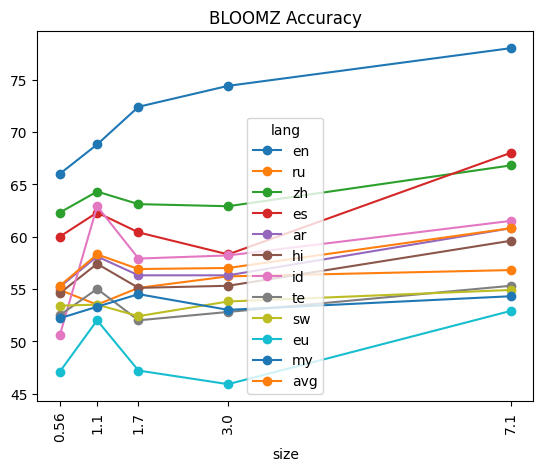

In [379]:
plot_size_df(
    acc_df_bloomz[
        ["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]
    ],
    bloomz_model_sizes[:-2],
    bloomz_names[:-2],
    "BLOOMZ Accuracy",
)


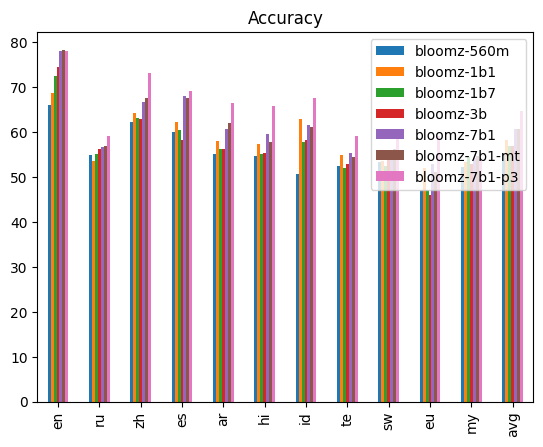

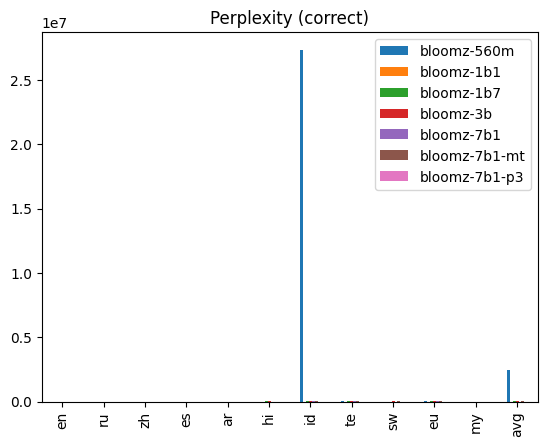

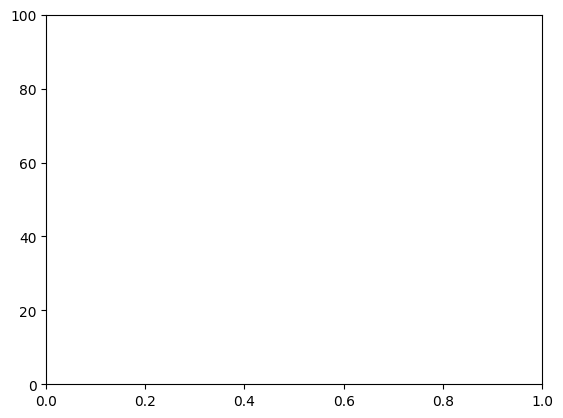

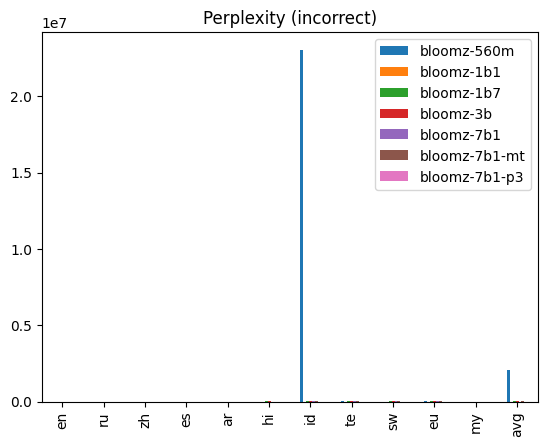

(0.0, 100.0)

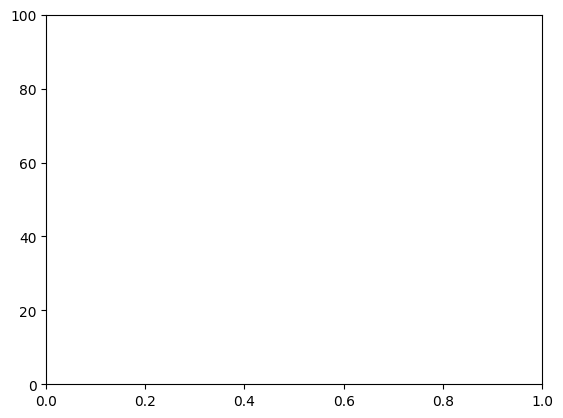

In [380]:
plot_df(acc_df_bloomz, "Accuracy")
plot_df(ppl_cor_df_bloomz, "Perplexity (correct)")
plt.ylim(0, 100)
plot_df(ppl_inc_df_bloomz, "Perplexity (incorrect)")
plt.ylim(0, 100)


## GPT2

In [381]:
gpt2_model_names = ["gpt2", "gpt2-medium", "gpt2-large", "gpt2-xl"]
gpt2_model_sizes = [0.125, 0.35, 0.77, 1.5]
gpt2_names = [name.split("/")[-1] for name in gpt2_model_names]
acc_df_gpt2, ppl_cor_df_gpt2, ppl_inc_df_gpt2 = get_dfs(gpt2_model_names)


In [382]:
display(acc_df_gpt2)
display(ppl_cor_df_gpt2)
display(ppl_inc_df_gpt2)


lang  gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en  60.3         64.8        68.3     71.2
1    ru  49.6         50.9        51.6     52.9
2    zh  54.6         54.3        53.3     54.3
3    es  56.0         55.1        55.8     56.8
4    ar  53.4         53.0        54.1     55.3
5    hi  50.3         50.4        51.0     51.4
6    id  52.7         52.8        53.5     55.3
7    te  52.9         52.9        54.4     55.7
8    sw  52.0         52.2        52.6     52.1
9    eu  51.2         52.0        51.3     52.0
10   my  53.3         51.8        52.9     51.4
11  avg  53.3         53.7        54.4     55.3

lang    gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en   27.99        21.54       19.03    17.32
1    ru    8.10         6.62        5.79     5.25
2    zh   21.42        16.83       14.66    13.66
3    es  112.83        62.65       47.14    37.52
4    ar    9.93         8.65        8.00     7.69
5    hi    5.64         4.88        4.48     4.18
6    id  366.90       251.81      173.92   115.74
7    te    3.24         2.91        2.71     2.57
8    sw  298.84       245.89      227.63   205.59
9    eu  423.35       410.41      388.32   392.84
10   my    3.53         3.09        3.10     2.89
11  avg  116.52        94.12       81.34    73.20

lang    gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en   29.38        23.08       20.56    18.94
1    ru    8.11         6.63        5.81     5.28
2    zh   21.68        17.03       14.84    13.83
3    es  115.85        64.26       48.36    38.48
4    ar   10.01         8.72        8.07     7.76
5    hi    5.65         4.88        4.49     4.18
6    id  372.15       255.53      176.96   118.41
7    te    3.25         2.92        2.72     2.58
8    sw  302.48       249.56      231.31   208.43
9    eu  428.84       416.42      393.52   398.42
10   my    3.54         3.09        3.11     2.90
11  avg  118.27        95.65       82.70    74.47

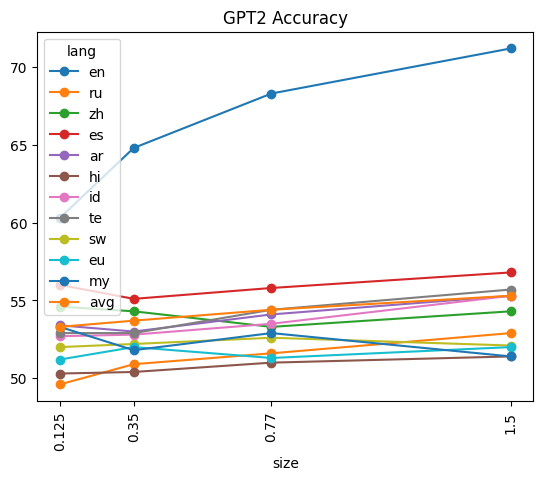

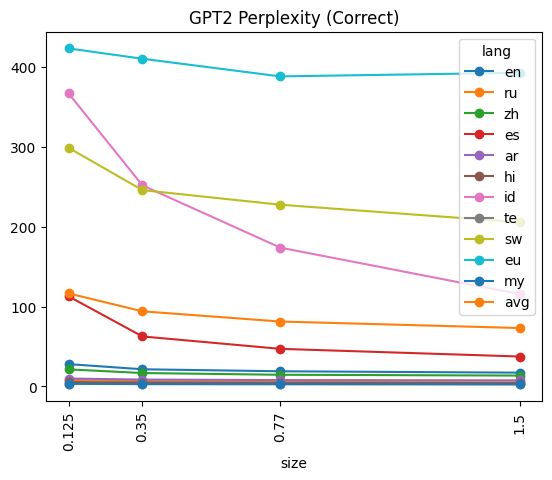

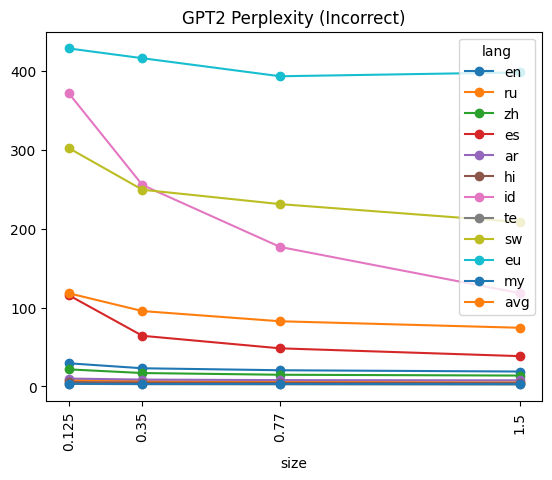

In [383]:
plot_size_df(acc_df_gpt2, gpt2_model_sizes, gpt2_names, "GPT2 Accuracy")
plot_size_df(ppl_cor_df_gpt2, gpt2_model_sizes, gpt2_names, "GPT2 Perplexity (Correct)")
plot_size_df(
    ppl_inc_df_gpt2, gpt2_model_sizes, gpt2_names, "GPT2 Perplexity (Incorrect)"
)


## OPT

In [384]:
opt_model_names = [
    "facebook/opt-125m",
    "facebook/opt-350m",
    "facebook/opt-1.3b",
    "facebook/opt-2.7b",
    "facebook/opt-6.7b",
    "facebook/opt-13b",
]
opt_model_sizes = [0.125, 0.35, 1.3, 2.7, 6.7, 13]
opt_names = [name.split("/")[-1] for name in opt_model_names]
acc_df_opt, ppl_cor_df_opt, ppl_inc_df_opt = get_dfs(opt_model_names)


In [385]:
display(acc_df_opt)
display(ppl_cor_df_opt)
display(ppl_inc_df_opt)


lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en      61.1      64.3      74.0      75.4      78.8     79.4
1    ru      54.1      53.9      54.6      54.9      54.3     49.1
2    zh      54.9      56.1      53.5      54.6      55.0     56.1
3    es      54.5      56.1      60.4      62.0      64.0     66.2
4    ar      53.7      54.7      52.7      54.8      53.6     51.0
5    hi      50.6      51.7      53.8      53.4      54.2     47.8
6    id      55.5      55.3      54.2      53.4      55.7     56.2
7    te      53.1      54.0      55.5      55.3      55.5     47.2
8    sw      53.3      53.0      53.8      54.2      55.2     55.4
9    eu      51.0      52.3      52.9      52.0      52.4     53.5
10   my      52.7      53.1      52.3      51.5      51.8     47.2
11  avg      54.0      55.0      56.2      56.5      57.3     55.4

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     26.45     22.26     16.70     15.57     14.54    14.13
1    ru      4.34      3.81      3.28      3.01      2.82     2.84
2    zh     22.85     19.25     13.91     11.64      9.80     8.89
3    es     26.91     21.31     12.61     10.92      9.31     9.02
4    ar      8.70      7.63      6.53      6.10      5.58     5.47
5    hi      4.53      3.77      3.29      3.11      2.92     3.10
6    id     60.03     40.98     23.71     19.94     16.03    14.05
7    te      3.20      2.71      2.52      2.43      2.32     2.68
8    sw    196.26    148.83     66.52     50.79     37.16    32.20
9    eu    528.41    500.28    331.65    308.90    252.11   225.69
10   my      3.38      2.95      2.69      2.61      2.38     2.91
11  avg     80.46     70.34     43.95     39.55     32.27    29.18

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     27.82     23.71     18.50     17.39     16.43    16.07
1    ru      4.38      3.84      3.30      3.03      2.84     2.85
2    zh     23.13     19.54     14.07     11.77      9.91     8.99
3    es     27.65     21.87     13.05     11.35      9.74     9.48
4    ar      8.79      7.71      6.59      6.16      5.62     5.51
5    hi      4.53      3.78      3.31      3.13      2.94     3.11
6    id     61.65     42.12     24.26     20.36     16.40    14.42
7    te      3.21      2.72      2.53      2.44      2.33     2.68
8    sw    199.72    151.30     67.98     51.87     38.05    32.99
9    eu    535.26    508.41    336.27    312.81    255.48   228.96
10   my      3.39      2.96      2.69      2.62      2.39     2.91
11  avg     81.78     71.63     44.78     40.27     32.92    29.82

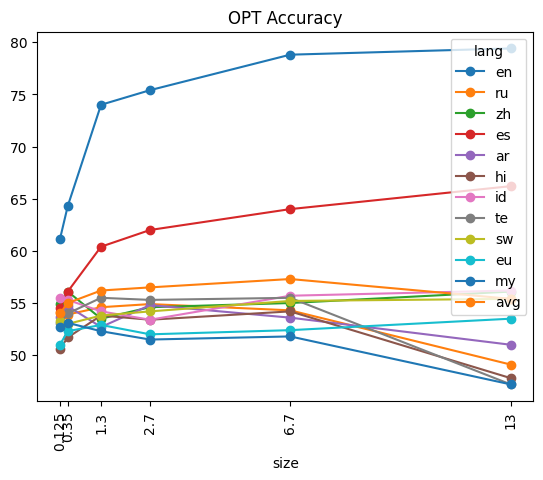

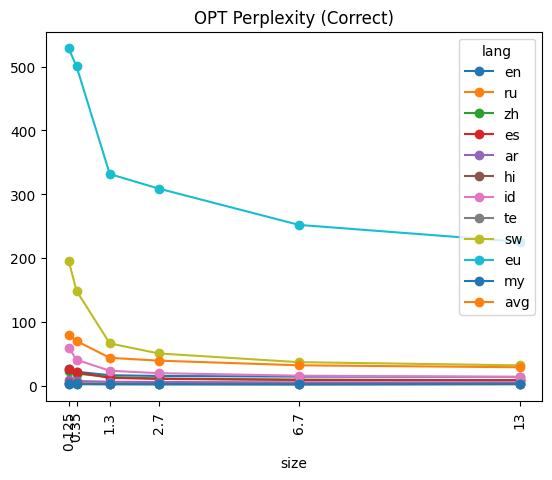

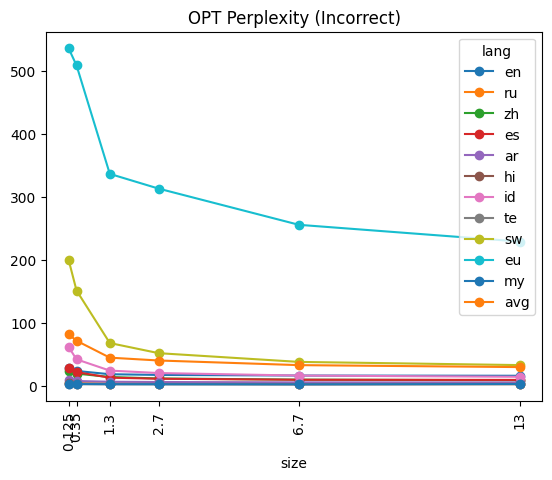

In [386]:
plot_size_df(acc_df_opt, opt_model_sizes, opt_names, "OPT Accuracy")
plot_size_df(ppl_cor_df_opt, opt_model_sizes, opt_names, "OPT Perplexity (Correct)")
plot_size_df(ppl_inc_df_opt, opt_model_sizes, opt_names, "OPT Perplexity (Incorrect)")


## LLaMA

In [387]:
llama_model_names = [
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/7B",
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/13B"
]
llama_model_sizes = [7, 13]
llama_names = [name.split("/")[-1] for name in llama_model_names]
acc_df_llama, ppl_cor_df_llama, ppl_inc_df_llama = get_dfs(llama_model_names)


In [388]:
display(acc_df_llama)
display(ppl_cor_df_llama)
display(ppl_inc_df_llama)


lang    7B   13B
0    en  81.3  83.5
1    ru  68.4  71.0
2    zh  61.2  63.3
3    es  70.2  73.9
4    ar  52.2  54.3
5    hi  56.3  49.8
6    id  58.5  61.2
7    te  58.4  47.2
8    sw  56.6  55.9
9    eu  52.7  54.2
10   my  54.4  47.2
11  avg  60.9  60.1

lang     7B    13B
0    en  10.21   9.82
1    ru   7.78   7.11
2    zh   8.37   7.40
3    es   9.63   8.73
4    ar   5.41   5.06
5    hi   3.10   3.13
6    id  13.18  10.98
7    te   2.09   2.31
8    sw  36.00  29.62
9    eu  85.42  67.63
10   my   3.03   3.56
11  avg  16.75  14.12

lang     7B    13B
0    en  11.48  11.17
1    ru   8.20   7.56
2    zh   8.61   7.65
3    es  10.29   9.45
4    ar   5.46   5.11
5    hi   3.13   3.14
6    id  13.62  11.43
7    te   2.10   2.31
8    sw  36.84  30.25
9    eu  86.61  68.59
10   my   3.05   3.56
11  avg  17.22  14.57

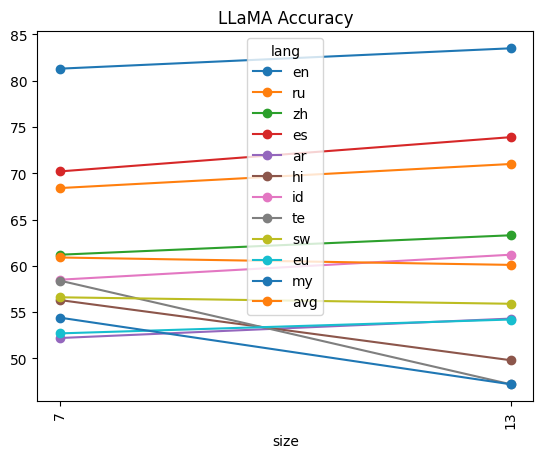

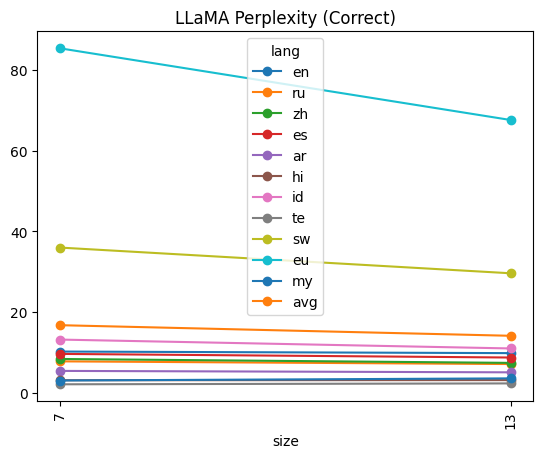

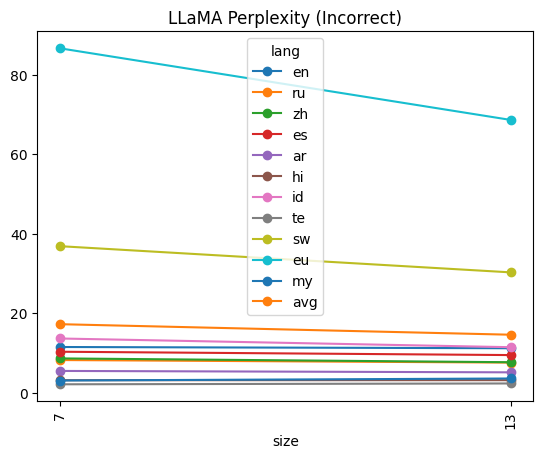

In [389]:
plot_size_df(acc_df_llama, llama_model_sizes, llama_names, "LLaMA Accuracy")
plot_size_df(ppl_cor_df_llama, llama_model_sizes, llama_names, "LLaMA Perplexity (Correct)")
plot_size_df(ppl_inc_df_llama, llama_model_sizes, llama_names, "LLaMA Perplexity (Incorrect)")


## MT5

In [390]:
mt5_model_names = [
    "google/mt5-small",
    "google/mt5-base",
    "google/mt5-large",
    "google/mt5-xl",
    "google/mt5-xxl",
]
mt5_model_sizes = [0.30, 0.58, 1.2, 3.7, 13]
mt5_names = [name.split("/")[-1] for name in mt5_model_names]
acc_df_mt5, ppl_cor_df_mt5, ppl_inc_df_mt5 = get_dfs(mt5_model_names)


In [391]:
display(acc_df_mt5)
display(ppl_cor_df_mt5)
display(ppl_inc_df_mt5)


lang  mt5-small  mt5-base  mt5-large  mt5-xl  mt5-xxl
0    en       50.7      49.8       44.3    45.7     46.7
1    ru       49.0      51.6       47.1    41.8     46.1
2    zh       49.3      49.6       47.1    40.4     49.8
3    es       51.2      49.0       50.0    44.4     45.9
4    ar       51.0      50.3       45.7    43.9     50.3
5    hi       49.4      52.2       50.0    46.1     48.5
6    id       48.8      50.0       44.0    42.5     48.9
7    te       50.2      50.5       46.9    45.5     50.8
8    sw       47.4      50.7       45.6    43.2     48.8
9    eu       48.6      49.1       49.4    43.1     49.3
10   my       49.1      51.8       48.8    44.5     48.4
11  avg       49.5      50.4       47.2    43.7     48.5

lang     mt5-small     mt5-base     mt5-large      mt5-xl    mt5-xxl
0    en  1.868034e+06  13544203.47  1.090669e+13   430029.12   52047.26
1    ru  9.191158e+06   2702896.53  1.756600e+12  1156627.72  182663.40
2    zh  4.444300e+08   3381148.52  1.591443e+11   235086.81   34299.03
3    es  1.559326e+07  15621977.25  3.528823e+12   523036.06  158619.27
4    ar  8.636016e+07    631214.11  2.519046e+11   494111.37  371093.43
5    hi  5.193157e+06    440435.60  3.066918e+12   545452.65   75027.17
6    id  7.681878e+06   4597085.88  1.437592e+12   914272.11  152048.12
7    te  1.458078e+07   1084107.23  9.377326e+11  2048464.26  287550.24
8    sw  7.219980e+06   1882629.47  7.710654e+11   666076.29  172698.93
9    eu  3.141810e+08   1661057.36  3.684538e+11   635447.47  209447.90
10   my  1.725319e+07    226728.59  3.069245e+11    22331.18   31772.40
11  avg  8.395933e+07   4161225.82  2.135622e+12   697357.73  157024.29

lang     mt5-small     mt5-base     mt5-large      mt5-xl    mt5-xxl
0    en  1.898570e+06  12586895.32  8.822960e+12   395244.60   50020.69
1    ru  8.365080e+06   2974320.42  1.644000e+12  1010340.02  174627.48
2    zh  4.446624e+08   3136163.89  1.477492e+11   192303.46   33740.45
3    es  1.432284e+07  16987046.06  3.835069e+12   473619.80  150019.05
4    ar  8.655757e+07    664944.35  2.157728e+11   450470.40  373841.93
5    hi  4.689022e+06    495191.68  3.540121e+12   502215.00   73489.47
6    id  7.017224e+06   4252444.84  1.112272e+12   785641.19  147808.54
7    te  1.426079e+07   1080053.90  8.995039e+11  1895669.68  292477.09
8    sw  5.914702e+06   2147655.83  5.932067e+11   597187.71  171105.07
9    eu  2.846103e+08   1695084.05  3.535874e+11   585323.86  207716.86
10   my  1.745429e+07    239121.09  2.866825e+11    20229.77   30554.28
11  avg  8.088662e+07   4205356.49  1.950084e+12   628022.32  155036.45

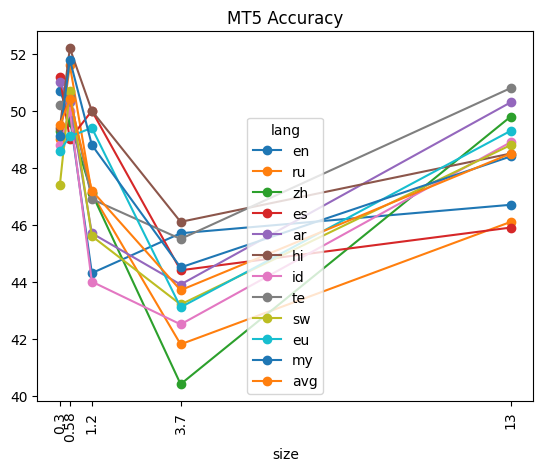

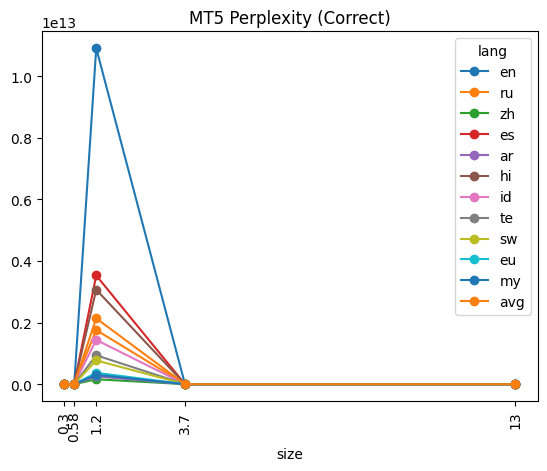

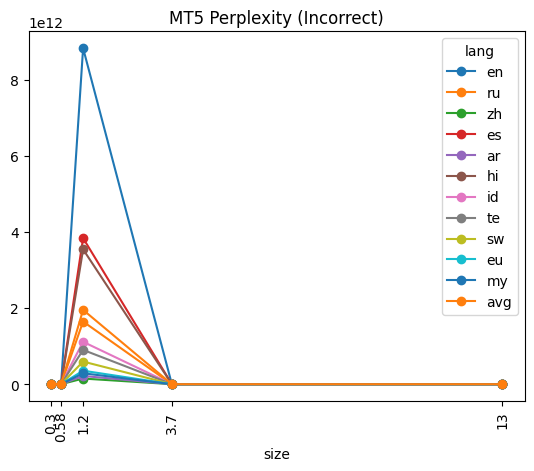

In [392]:
plot_size_df(acc_df_mt5, mt5_model_sizes, mt5_names, "MT5 Accuracy")
plot_size_df(ppl_cor_df_mt5, mt5_model_sizes, mt5_names, "MT5 Perplexity (Correct)")
plot_size_df(ppl_inc_df_mt5, mt5_model_sizes, mt5_names, "MT5 Perplexity (Incorrect)")


## MT0

In [393]:
mt0_model_names = [
    "bigscience/mt0-small",
    "bigscience/mt0-base",
    "bigscience/mt0-large",
    "bigscience/mt0-xl",
    "bigscience/mt0-xxl",
    "bigscience/mt0-xxl-mt",
    "bigscience/mt0-xxl-p3",
]
mt0_model_sizes = [0.30, 0.58, 1.2, 3.7, 13, 13, 13]
mt0_names = [name.split("/")[-1] for name in mt0_model_names]
acc_df_mt0, ppl_cor_df_mt0, ppl_inc_df_mt0 = get_dfs(mt0_model_names)


In [394]:
display(acc_df_mt0)
display(ppl_cor_df_mt0)
display(ppl_inc_df_mt0)


lang  mt0-small  mt0-base  mt0-large  mt0-xl  mt0-xxl  mt0-xxl-mt  \
0    en       52.2      53.0       57.7    58.2     52.3        61.9   
1    ru       52.1      52.5       56.3    51.5     47.9        54.3   
2    zh       56.1      56.3       60.6    59.6     58.0        65.4   
3    es       50.8      51.1       53.5    56.1     52.9        59.7   
4    ar       55.0      56.5       59.4    58.4     52.3        55.3   
5    hi       53.1      50.4       53.0    51.6     45.1        48.0   
6    id       51.2      51.9       54.6    56.1     52.0        58.3   
7    te       52.1      50.6       51.5    51.6     46.5        51.0   
8    sw       50.9      51.7       52.9    50.8     48.6        52.2   
9    eu       52.5      53.0       51.9    52.2     49.9        52.8   
10   my       53.5      53.1       55.8    53.5     47.5        50.6   
11  avg       52.7      52.7       55.2    54.5     50.3        55.4   

    mt0-xxl-p3  
0         55.5  
1         49.8  
2         60.4  
3         55.9  
4         56.9  
5         49.8  
6         53.9  
7         50.5  
8         51.0  
9         56.6  
10        50.8  
11        53.7

lang  mt0-small    mt0-base  mt0-large     mt0-xl    mt0-xxl  mt0-xxl-mt  \
0    en   29597.35    44176.27   41405.60   35553.32   47628.41    38042.25   
1    ru  254904.25   215405.58  162926.15  213173.36  455962.32   413178.37   
2    zh   13943.28    11925.64    7253.30    8658.36   12979.83    13955.19   
3    es  164265.44   339508.68  276677.78  249016.55  247868.88   214090.95   
4    ar  624524.10  1046864.84  909197.54  603704.73  595675.91   565579.17   
5    hi  276203.94   393623.53  433897.04  240315.71  349422.50   211590.69   
6    id  156301.69   196353.21  206282.52  239225.56  241345.34   170105.83   
7    te  496192.25   579687.75  500102.24  351396.01  386721.46   221383.23   
8    sw  226204.01   316419.65  417665.22  363194.43  424621.87   360111.66   
9    eu  110096.57   281172.61  132496.97  169066.54  233001.95   179328.66   
10   my   69543.57    86725.48   34081.13   13803.17   33254.95    17257.74   
11  avg  220161.50   319260.29  283816.86  226100.70  275316.67   218602.16   

    mt0-xxl-p3  
0     62807.47  
1    298405.27  
2     19532.49  
3    217956.68  
4    237281.38  
5    110700.80  
6    188930.22  
7    219515.77  
8    441383.95  
9    438733.71  
10    25650.11  
11   205536.17

lang  mt0-small    mt0-base   mt0-large     mt0-xl    mt0-xxl  mt0-xxl-mt  \
0    en   30188.86    45515.61    44550.32   39341.94   50453.23    47072.80   
1    ru  257653.59   218920.94   170039.42  222574.66  443688.89   463167.40   
2    zh   14711.82    12705.81     8016.46    9940.13   15518.50    19237.55   
3    es  166772.82   343418.18   289193.44  267272.10  261946.81   251684.06   
4    ar  656930.96  1109967.36  1016557.52  678305.29  624540.63   643130.70   
5    hi  282128.84   398578.00   444732.53  247719.65  337483.54   215143.44   
6    id  157915.39   197858.57   214570.39  262929.87  260022.68   199971.44   
7    te  503919.63   578013.64   505242.03  362394.89  371747.28   231005.90   
8    sw  226063.34   317666.00   423199.48  370158.89  417270.13   384732.83   
9    eu  112435.20   291335.36   136114.38  175487.13  232316.76   194044.70   
10   my   71698.02    89778.66    35669.51   14405.24   32217.28    17705.10   
11  avg  225492.59   327614.38   298898.68  240957.25  277018.70   242445.08   

    mt0-xxl-p3  
0     66089.76  
1    301849.45  
2     22182.12  
3    232820.06  
4    256561.18  
5    112504.43  
6    201445.87  
7    222710.22  
8    447072.70  
9    472058.27  
10    25994.29  
11   214662.58

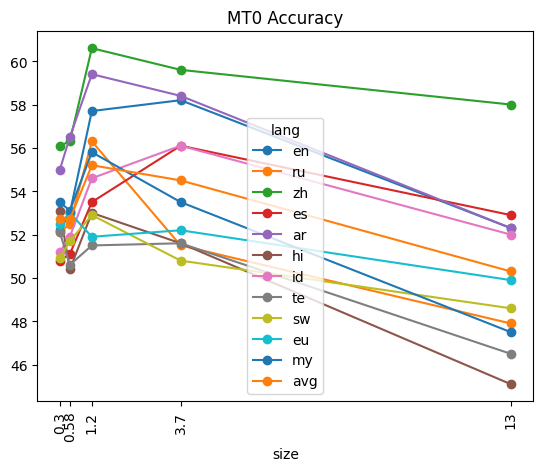

In [395]:
plot_size_df(
    acc_df_mt0[
        ["lang", "mt0-small",
        "mt0-base",
        "mt0-large",
        "mt0-xl",
        "mt0-xxl"]
    ],
    mt0_model_sizes[:-2],
    mt0_names[:-2],
    "MT0 Accuracy",
)

## Summary EU

In [396]:
# summarize the eu language results for all models
model_sizes = (
    gpt3_eus_model_sizes
    + gpt2_eus_model_sizes
    + mgpt_model_sizes
    + xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + gpt2_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    gpt3_eus_names
    + gpt2_eus_names
    + mgpt_names
    + xglm_names
    + bloom_names
    + bloomz_names
    + gpt2_names
    + opt_names
    + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[0] = "gpt3-eus-spm"
models[1] = "gpt3-eus-bpe"
models[2] = "gpt2-eus-euscrawl"
models[19] = "bloomz-mt"
models[20] = "bloomz-p3"
models[31] = "llama"
models[32] = "llama"

acc_dfs = [
    acc_df_gpt3_eus,
    acc_df_gpt2_eus,
    acc_df_mgpt,
    acc_df_xglm,
    acc_df_bloom,
    acc_df_bloomz,
    acc_df_gpt2,
    acc_df_opt,
    acc_df_llama,
]
ppl_cor_dfs = [
    ppl_cor_df_gpt3_eus,
    ppl_cor_df_gpt2_eus,
    ppl_cor_df_mgpt,
    ppl_cor_df_xglm,
    ppl_cor_df_bloom,
    ppl_cor_df_bloomz,
    ppl_cor_df_gpt2,
    ppl_cor_df_opt,
    ppl_cor_df_llama,
]
ppl_inc_dfs = [
    ppl_inc_df_gpt3_eus,
    ppl_inc_df_gpt2_eus,
    ppl_inc_df_mgpt,
    ppl_inc_df_xglm,
    ppl_inc_df_bloom,
    ppl_inc_df_bloomz,
    ppl_inc_df_gpt2,
    ppl_inc_df_opt,
    ppl_inc_df_llama
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)

In [397]:
results_eu_df

model_name              model    size   acc   ppl_cor   ppl_inc
0           spm_model       gpt3-eus-spm   0.350  55.2     64.78     66.48
1           bpe_model       gpt3-eus-bpe   0.350  52.3     86.75     87.83
2   gpt2-eus-euscrawl  gpt2-eus-euscrawl   0.125  54.1     61.10     62.52
3                mGPT               mGPT   1.300  55.9     16.91     17.28
4           xglm-564M               xglm   0.560  55.1     34.55     35.48
5           xglm-1.7B               xglm   1.700  57.5     23.12     23.84
6           xglm-2.9B               xglm   2.900  58.4     20.18     20.93
7           xglm-4.5B               xglm   4.500  55.3    104.26    107.33
8           xglm-7.5B               xglm   7.500  61.7     18.94     19.77
9          bloom-560m              bloom   0.560  53.8    116.24    118.98
10          bloom-1b1              bloom   1.100  53.8     88.00     90.22
11          bloom-1b7              bloom   1.700  55.7     60.89     62.87
12           bloom-3b              bloom   3.000  57.2     50.50     52.24
13          bloom-7b1              bloom   7.100  59.0     41.14     43.03
14        bloomz-560m             bloomz   0.560  47.1   6841.67   6689.80
15         bloomz-1b1             bloomz   1.100  52.0    288.67    293.84
16         bloomz-1b7             bloomz   1.700  47.2  28747.34  28074.24
17          bloomz-3b             bloomz   3.000  45.9  22186.82  21626.92
18         bloomz-7b1             bloomz   7.100  52.9   4138.25   4213.08
19      bloomz-7b1-mt          bloomz-mt   7.100  51.1   6434.85   6514.98
20      bloomz-7b1-p3          bloomz-p3   7.100  59.1     85.29     90.57
21               gpt2               gpt2   0.125  51.2    423.35    428.84
22        gpt2-medium               gpt2   0.350  52.0    410.41    416.42
23         gpt2-large               gpt2   0.770  51.3    388.32    393.52
24            gpt2-xl               gpt2   1.500  52.0    392.84    398.42
25           opt-125m                opt   0.125  51.0    528.41    535.26
26           opt-350m                opt   0.350  52.3    500.28    508.41
27           opt-1.3b                opt   1.300  52.9    331.65    336.27
28           opt-2.7b                opt   2.700  52.0    308.90    312.81
29           opt-6.7b                opt   6.700  52.4    252.11    255.48
30            opt-13b                opt  13.000  53.5    225.69    228.96
31                 7B              llama   7.000  52.7     85.42     86.61
32                13B              llama  13.000  54.2     67.63     68.59

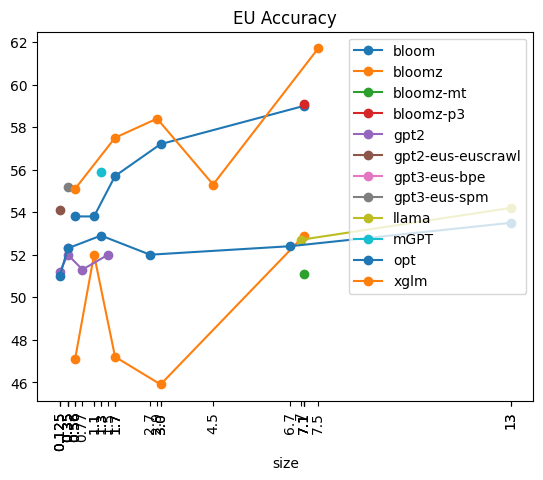

In [398]:
results_eu_df.set_index("size", inplace=True)
results_eu_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


(0.0, 100.0)

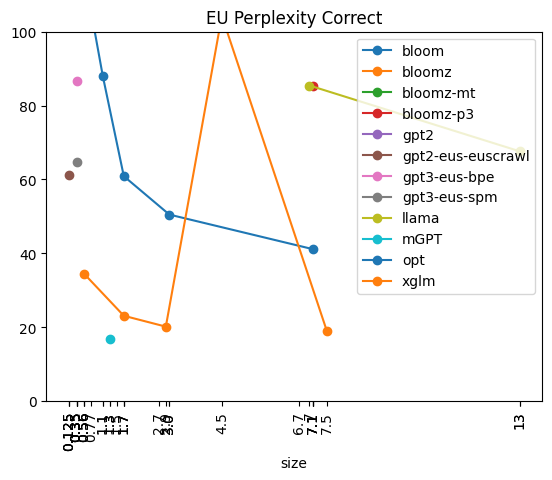

In [399]:
results_eu_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="EU Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


(0.0, 100.0)

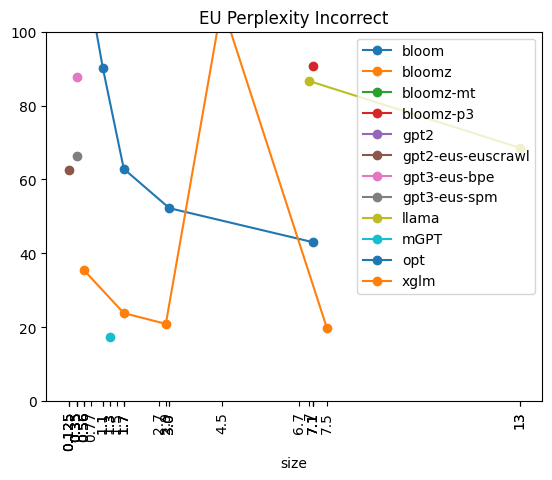

In [400]:
results_eu_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="EU Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


## Summary EN

In [401]:
# summarize the en language results for all models
model_sizes = (
    mgpt_model_sizes
    + xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + gpt2_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    mgpt_names
    + xglm_names
    + bloom_names
    + bloomz_names
    + gpt2_names
    + opt_names
    + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[16] = "bloomz-mt"
models[17] = "bloomz-p3"
models[28] = "llama"
models[29] = "llama"

acc_dfs = [
    acc_df_mgpt,
    acc_df_xglm,
    acc_df_bloom,
    acc_df_bloomz,
    acc_df_gpt2,
    acc_df_opt,
    acc_df_llama,
]
ppl_cor_dfs = [
    ppl_cor_df_mgpt,
    ppl_cor_df_xglm,
    ppl_cor_df_bloom,
    ppl_cor_df_bloomz,
    ppl_cor_df_gpt2,
    ppl_cor_df_opt,
    ppl_cor_df_llama,
]
ppl_inc_dfs = [
    ppl_inc_df_mgpt,
    ppl_inc_df_xglm,
    ppl_inc_df_bloom,
    ppl_inc_df_bloomz,
    ppl_inc_df_gpt2,
    ppl_inc_df_opt,
    ppl_inc_df_llama,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "en"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "en"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "en"].values[0][1:])

results_en_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)

In [402]:
results_en_df

model_name      model    size   acc  ppl_cor  ppl_inc
0            mGPT       mGPT   1.300  63.2    20.67    21.80
1       xglm-564M       xglm   0.560  61.3    21.41    22.50
2       xglm-1.7B       xglm   1.700  66.6    17.18    18.41
3       xglm-2.9B       xglm   2.900  69.6    15.57    16.91
4       xglm-4.5B       xglm   4.500  72.1    14.67    16.04
5       xglm-7.5B       xglm   7.500  73.7    14.43    15.83
6      bloom-560m      bloom   0.560  64.1    25.17    26.79
7       bloom-1b1      bloom   1.100  67.4    21.03    22.58
8       bloom-1b7      bloom   1.700  70.0    18.82    20.45
9        bloom-3b      bloom   3.000  72.1    16.70    18.33
10      bloom-7b1      bloom   7.100  74.9    14.87    16.53
11    bloomz-560m     bloomz   0.560  66.0    24.69    26.46
12     bloomz-1b1     bloomz   1.100  68.8    20.04    21.74
13     bloomz-1b7     bloomz   1.700  72.4    18.57    20.43
14      bloomz-3b     bloomz   3.000  74.4    16.90    18.80
15     bloomz-7b1     bloomz   7.100  78.0    15.18    17.19
16  bloomz-7b1-mt  bloomz-mt   7.100  78.4    15.02    17.04
17  bloomz-7b1-p3  bloomz-p3   7.100  78.1    15.97    18.37
18           gpt2       gpt2   0.125  60.3    27.99    29.38
19    gpt2-medium       gpt2   0.350  64.8    21.54    23.08
20     gpt2-large       gpt2   0.770  68.3    19.03    20.56
21        gpt2-xl       gpt2   1.500  71.2    17.32    18.94
22       opt-125m        opt   0.125  61.1    26.45    27.82
23       opt-350m        opt   0.350  64.3    22.26    23.71
24       opt-1.3b        opt   1.300  74.0    16.70    18.50
25       opt-2.7b        opt   2.700  75.4    15.57    17.39
26       opt-6.7b        opt   6.700  78.8    14.54    16.43
27        opt-13b        opt  13.000  79.4    14.13    16.07
28             7B      llama   7.000  81.3    10.21    11.48
29            13B      llama  13.000  83.5     9.82    11.17

In [403]:
results_en_df.set_index("size", inplace=True)

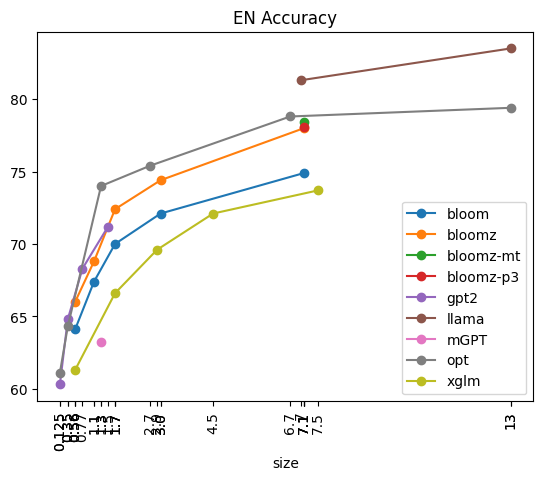

In [404]:
results_en_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EN Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


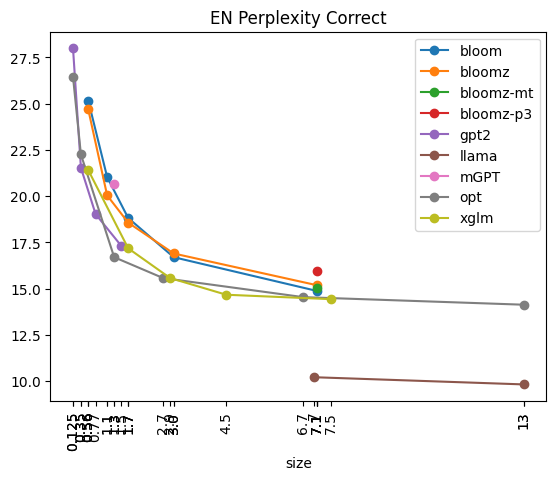

In [405]:
results_en_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="EN Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


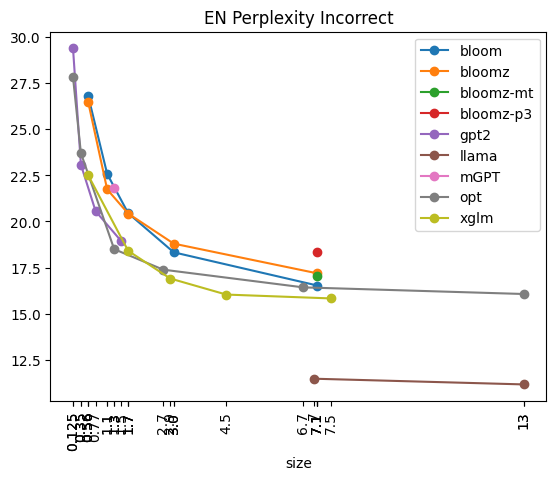

In [406]:
results_en_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="EN Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


## Summary AVG

In [407]:
model_sizes = (
    mgpt_model_sizes
    + xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + gpt2_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    mgpt_names
    + xglm_names
    + bloom_names
    + bloomz_names
    + gpt2_names
    + opt_names
    + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[16] = "bloomz-mt"
models[17] = "bloomz-p3"
models[28] = "llama"
models[29] = "llama"

acc_dfs = [
    acc_df_mgpt,
    acc_df_xglm,
    acc_df_bloom,
    acc_df_bloomz,
    acc_df_gpt2,
    acc_df_opt,
    acc_df_llama,
]
ppl_cor_dfs = [
    ppl_cor_df_mgpt,
    ppl_cor_df_xglm,
    ppl_cor_df_bloom,
    ppl_cor_df_bloomz,
    ppl_cor_df_gpt2,
    ppl_cor_df_opt,
    ppl_cor_df_llama,
]
ppl_inc_dfs = [
    ppl_inc_df_mgpt,
    ppl_inc_df_xglm,
    ppl_inc_df_bloom,
    ppl_inc_df_bloomz,
    ppl_inc_df_gpt2,
    ppl_inc_df_opt,
    ppl_inc_df_llama,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [408]:
results_avg_df

model_name      model    size   acc     ppl_cor     ppl_inc
0            mGPT       mGPT   1.300  58.0       13.89       14.30
1       xglm-564M       xglm   0.560  56.5       31.07       31.92
2       xglm-1.7B       xglm   1.700  59.7       23.35       24.27
3       xglm-2.9B       xglm   2.900  62.2       20.34       21.35
4       xglm-4.5B       xglm   4.500  61.8       31.91       33.22
5       xglm-7.5B       xglm   7.500  64.3       18.62       19.68
6      bloom-560m      bloom   0.560  55.9      131.44      136.33
7       bloom-1b1      bloom   1.100  57.9       72.40       74.74
8       bloom-1b7      bloom   1.700  59.5       45.73       47.77
9        bloom-3b      bloom   3.000  61.4       38.50       40.47
10      bloom-7b1      bloom   7.100  63.5       30.68       32.57
11    bloomz-560m     bloomz   0.560  55.3  2488544.50  2097428.38
12     bloomz-1b1     bloomz   1.100  58.3       90.13       92.71
13     bloomz-1b7     bloomz   1.700  56.9     6208.61     6256.51
14      bloomz-3b     bloomz   3.000  57.0     5675.11     5734.68
15     bloomz-7b1     bloomz   7.100  60.8     1211.92     1267.95
16  bloomz-7b1-mt  bloomz-mt   7.100  60.7     2237.81     2337.74
17  bloomz-7b1-p3  bloomz-p3   7.100  64.6       56.96       61.52
18           gpt2       gpt2   0.125  53.3      116.52      118.27
19    gpt2-medium       gpt2   0.350  53.7       94.12       95.65
20     gpt2-large       gpt2   0.770  54.4       81.34       82.70
21        gpt2-xl       gpt2   1.500  55.3       73.20       74.47
22       opt-125m        opt   0.125  54.0       80.46       81.78
23       opt-350m        opt   0.350  55.0       70.34       71.63
24       opt-1.3b        opt   1.300  56.2       43.95       44.78
25       opt-2.7b        opt   2.700  56.5       39.55       40.27
26       opt-6.7b        opt   6.700  57.3       32.27       32.92
27        opt-13b        opt  13.000  55.4       29.18       29.82
28             7B      llama   7.000  60.9       16.75       17.22
29            13B      llama  13.000  60.1       14.12       14.57

In [409]:
results_avg_df.set_index("size", inplace=True)

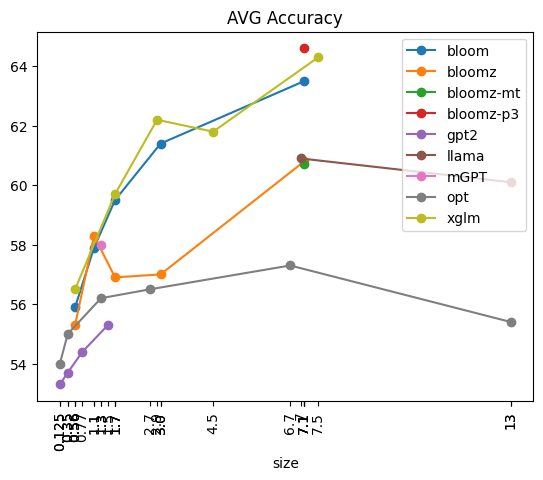

In [410]:
results_avg_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


(0.0, 100.0)

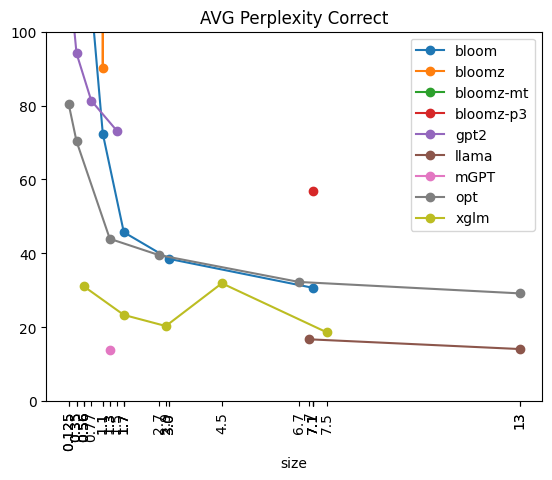

In [411]:
results_avg_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="AVG Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


(0.0, 100.0)

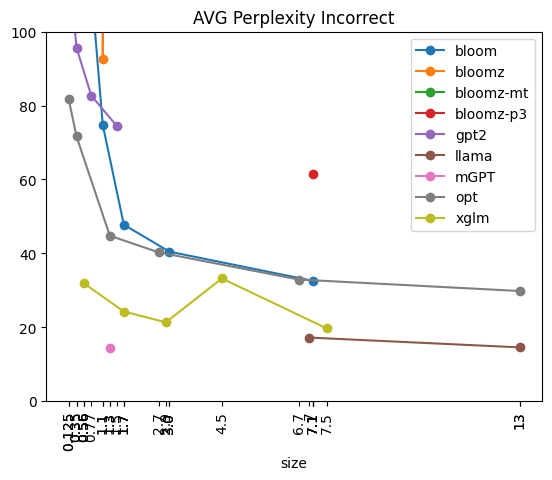

In [412]:
results_avg_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="AVG Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


# XStoryCloze Evaluation MT NLLB-200 3.3B

## mGPT

In [413]:
mgpt_model_names = ["sberbank-ai/mGPT"]
mgpt_model_sizes = [1.3]
mgpt_names = [name.split("/")[-1] for name in mgpt_model_names]
acc_df_mgpt_mt, ppl_cor_df_mgpt_mt, ppl_inc_df_mgpt_mt = get_dfs(
    mgpt_model_names, "xstory_cloze_mt_nllb-3B"
)


In [414]:
metrics_df = pd.read_csv(f"../results/xstory_cloze_mGPT_metrics.tsv", delimiter="\t")
metrics_df


lang   acc  ppl_cor  ppl_inc
0    en  63.2    20.67    21.80
1    ru  61.3    12.86    13.30
2    zh  57.0    17.21    17.63
3    es  58.8    17.40    18.01
4    ar  53.3    24.25    24.61
5    hi  56.5     4.42     4.48
6    id  58.8    19.37    20.06
7    te  58.2     3.57     3.63
8    sw  57.8    12.47    12.82
9    eu  55.9    16.91    17.28
10   my  57.0     3.63     3.67
11  avg  58.0    13.89    14.30

In [415]:
metrics_mt_df = pd.read_csv(
    f"../results/xstory_cloze_mt_nllb-3B_mGPT_metrics.tsv", delimiter="\t"
)
metrics_mt_df


lang   acc  ppl_cor  ppl_inc
0    en  63.2    20.67    21.80
1    ru  63.5    18.39    19.42
2    zh  62.5    18.94    19.92
3    es  63.9    19.62    20.62
4    ar  61.0    21.12    22.13
5    hi  60.0    20.74    21.76
6    id  59.7    21.49    22.45
7    te  60.9    22.48    23.45
8    sw  61.3    20.87    21.86
9    eu  61.2    19.41    20.41
10   my  60.8    19.35    20.28
11  avg  61.6    20.28    21.28

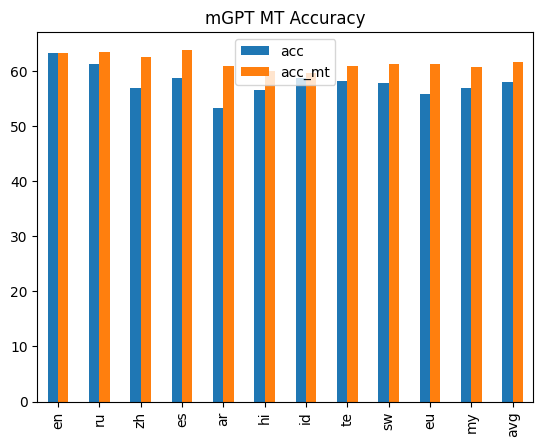

In [416]:
metrics_df["acc_mt"] = metrics_mt_df["acc"]
metrics_df["ppl_cor_mt"] = metrics_mt_df["ppl_cor"]
metrics_df["ppl_inc_mt"] = metrics_mt_df["ppl_inc"]
plot_df(metrics_df[["lang", "acc", "acc_mt"]], "mGPT MT Accuracy")


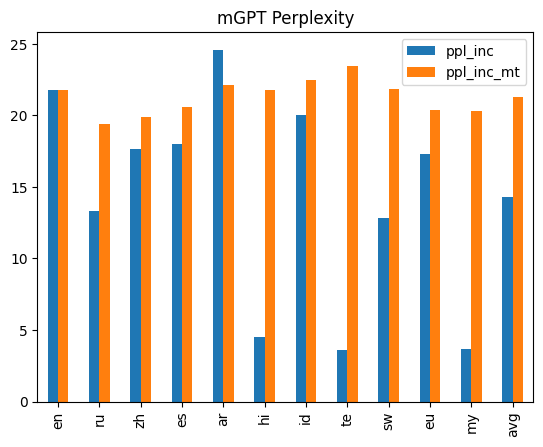

In [417]:
plot_df(metrics_df[["lang", "ppl_inc", "ppl_inc_mt"]], "mGPT Perplexity")


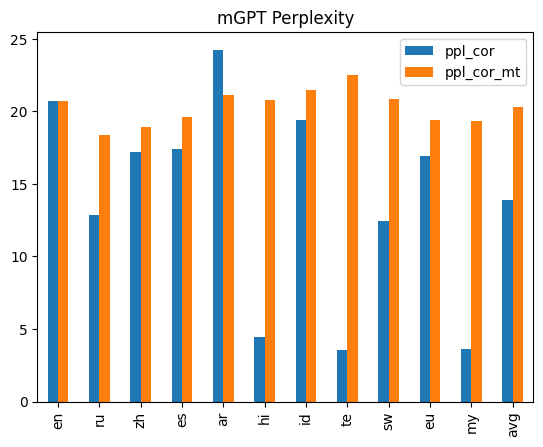

In [418]:
plot_df(metrics_df[["lang", "ppl_cor", "ppl_cor_mt"]], "mGPT Perplexity")


## XGLM

In [419]:
xglm_model_names = [
    "facebook/xglm-564M",
    "facebook/xglm-1.7B",
    "facebook/xglm-2.9B",
    "facebook/xglm-4.5B",
    "facebook/xglm-7.5B",
]
xglm_model_sizes = [0.56, 1.7, 2.9, 4.5, 7.5]
xglm_names = [name.split("/")[-1] for name in xglm_model_names]
acc_df_xglm_mt, ppl_cor_df_xglm_mt, ppl_inc_df_xglm_mt = get_dfs(
    xglm_model_names, "xstory_cloze_mt_nllb-3B"
)


In [420]:
display(acc_df_xglm_mt)
display(ppl_cor_df_xglm_mt)
display(ppl_inc_df_xglm_mt)


lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en       61.3       66.6       69.6       72.1       73.7
1    ru       61.1       66.4       68.6       69.8       69.9
2    zh       61.9       65.2       66.8       68.6       68.8
3    es       62.3       64.7       68.5       68.6       69.8
4    ar       59.5       61.0       63.9       64.5       64.9
5    hi       59.0       63.4       66.2       66.0       66.9
6    id       59.0       62.0       63.5       64.1       66.8
7    te       58.3       60.8       63.3       63.7       65.0
8    sw       59.2       63.3       64.0       64.3       65.7
9    eu       60.8       64.3       66.2       66.0       66.6
10   my       61.1       62.6       64.1       64.8       64.9
11  avg       60.3       63.7       65.9       66.6       67.5

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      21.41      17.18      15.57      14.67      14.43
1    ru      18.95      16.15      15.05      14.48      14.33
2    zh      19.99      17.45      16.47      16.02      15.82
3    es      20.43      17.23      16.11      15.47      15.25
4    ar      22.01      18.93      17.82      17.19      16.94
5    hi      21.95      18.81      17.67      17.10      16.88
6    id      22.20      19.05      17.89      17.26      16.99
7    te      23.88      21.14      19.94      19.31      19.14
8    sw      22.11      19.26      18.28      17.69      17.53
9    eu      20.39      17.80      16.94      16.39      16.25
10   my      20.58      18.49      17.72      17.35      17.25
11  avg      21.26      18.32      17.22      16.63      16.44

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      22.50      18.41      16.91      16.04      15.83
1    ru      19.89      17.22      16.24      15.71      15.57
2    zh      20.96      18.54      17.63      17.23      17.08
3    es      21.34      18.29      17.29      16.64      16.47
4    ar      22.93      19.99      18.97      18.37      18.15
5    hi      22.89      19.91      18.92      18.35      18.13
6    id      23.05      20.09      19.01      18.40      18.19
7    te      24.67      22.12      21.06      20.46      20.35
8    sw      23.05      20.34      19.43      18.88      18.74
9    eu      21.29      18.84      18.07      17.54      17.43
10   my      21.46      19.50      18.83      18.48      18.41
11  avg      22.18      19.39      18.40      17.83      17.67

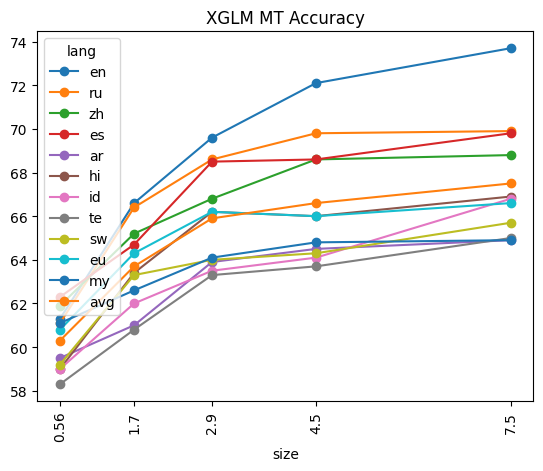

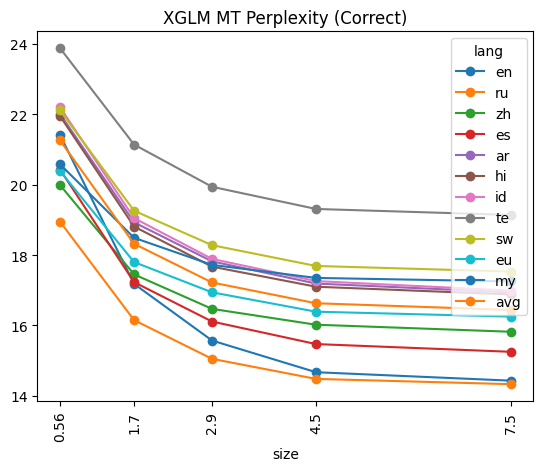

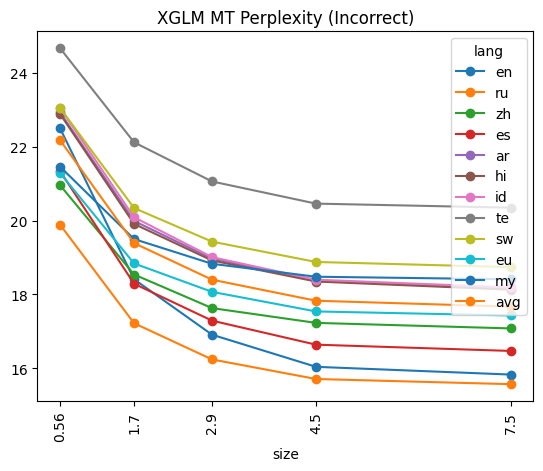

In [421]:
plot_size_df(acc_df_xglm_mt, xglm_model_sizes, xglm_names, "XGLM MT Accuracy")
plot_size_df(
    ppl_cor_df_xglm_mt, xglm_model_sizes, xglm_names, "XGLM MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_xglm_mt, xglm_model_sizes, xglm_names, "XGLM MT Perplexity (Incorrect)"
)


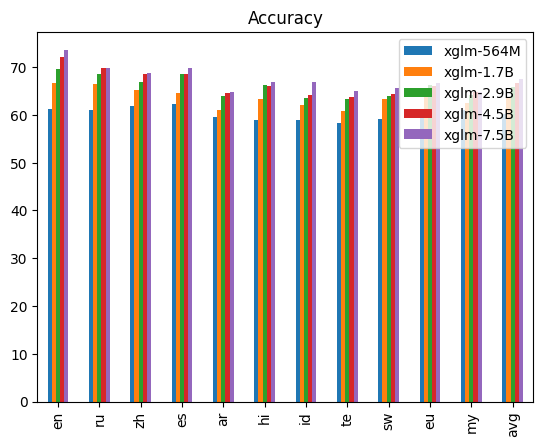

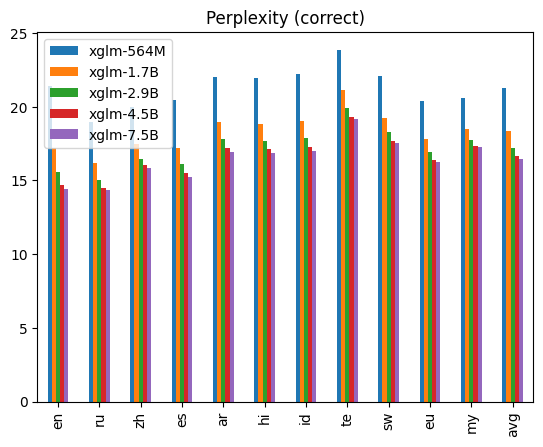

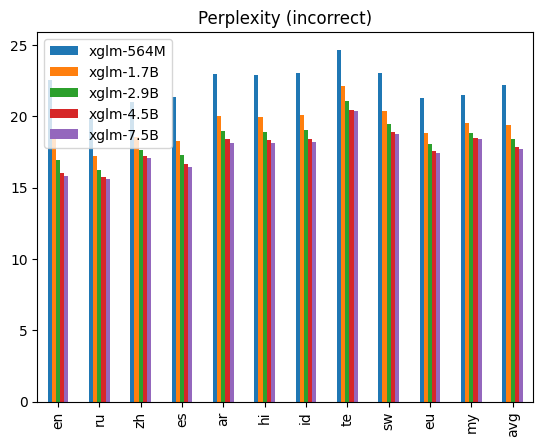

In [422]:
plot_df(acc_df_xglm_mt, "Accuracy")
plot_df(ppl_cor_df_xglm_mt, "Perplexity (correct)")
plot_df(ppl_inc_df_xglm_mt, "Perplexity (incorrect)")


## BLOOM

In [423]:
bloom_model_names = [
    "bigscience/bloom-560m",
    "bigscience/bloom-1b1",
    "bigscience/bloom-1b7",
    "bigscience/bloom-3b",
    "bigscience/bloom-7b1",
]
bloom_names = [name.split("/")[-1] for name in bloom_model_names]
bloom_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1]
acc_df_bloom_mt, ppl_cor_df_bloom_mt, ppl_inc_df_bloom_mt = get_dfs(
    bloom_model_names, "xstory_cloze_mt_nllb-3B"
)


In [424]:
display(acc_df_bloom_mt)
display(ppl_cor_df_bloom_mt)
display(ppl_inc_df_bloom_mt)


lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en        64.1       67.4       70.0      72.1       74.9
1    ru        64.0       67.2       69.2      72.1       73.9
2    zh        64.0       66.3       67.3      67.8       70.0
3    es        64.7       65.9       69.3      70.4       72.0
4    ar        61.5       63.8       64.9      66.8       67.2
5    hi        63.3       64.7       66.9      67.6       69.6
6    id        61.7       62.9       64.3      67.8       67.6
7    te        59.9       63.0       64.0      65.8       67.6
8    sw        62.7       62.8       65.0      65.4       67.2
9    eu        62.7       65.0       66.8      68.7       69.5
10   my        62.3       63.2       65.5      65.7       66.8
11  avg        62.8       64.7       66.7      68.2       69.7

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       25.17      21.03      18.82     16.70      14.87
1    ru       22.24      19.23      17.70     16.17      14.91
2    zh       22.73      20.07      18.80     17.35      16.13
3    es       23.79      20.43      18.81     17.17      15.86
4    ar       26.05      22.67      20.95     19.21      17.83
5    hi       24.64      21.46      19.89     18.23      16.99
6    id       26.86      23.26      21.53     19.75      18.35
7    te       27.38      24.23      22.77     21.07      19.71
8    sw       24.88      21.73      20.29     18.74      17.68
9    eu       23.53      20.72      19.32     17.96      16.94
10   my       22.80      20.59      19.50     18.31      17.48
11  avg       24.55      21.40      19.85     18.24      16.98

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       26.79      22.58      20.45     18.33      16.53
1    ru       23.74      20.70      19.22     17.70      16.49
2    zh       24.13      21.45      20.23     18.78      17.62
3    es       25.25      21.84      20.28     18.63      17.40
4    ar       27.61      24.12      22.44     20.72      19.40
5    hi       26.13      22.89      21.41     19.72      18.52
6    id       28.37      24.69      23.08     21.36      19.95
7    te       28.84      25.67      24.31     22.66      21.32
8    sw       26.22      23.02      21.60     20.07      19.04
9    eu       24.94      22.09      20.74     19.40      18.43
10   my       24.14      21.90      20.89     19.68      18.86
11  avg       26.01      22.81      21.33     19.73      18.51

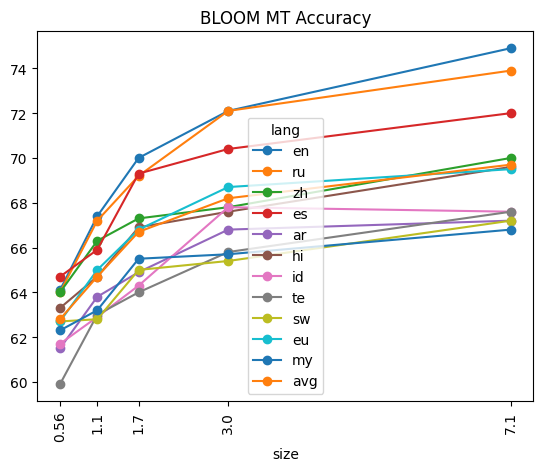

In [425]:
plot_size_df(acc_df_bloom_mt, bloom_model_sizes, bloom_names, "BLOOM MT Accuracy")


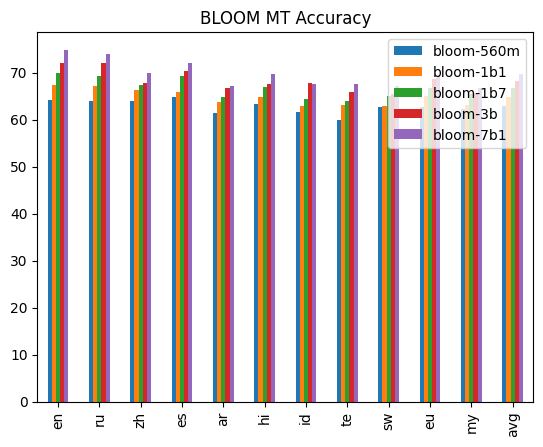

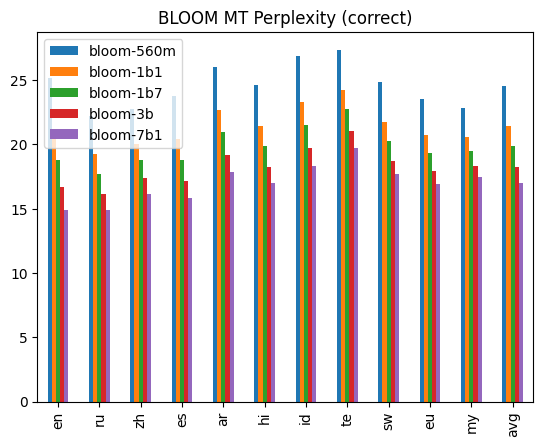

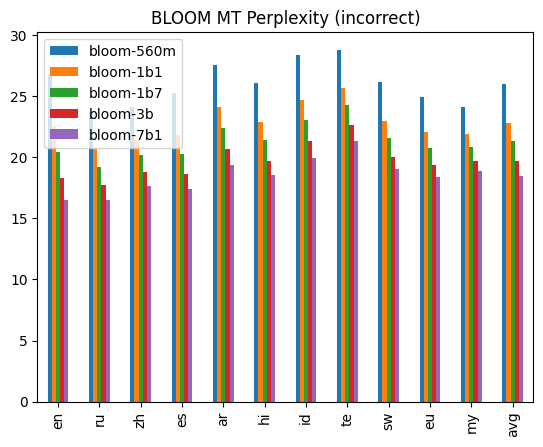

In [426]:
plot_df(acc_df_bloom_mt, "BLOOM MT Accuracy")
plot_df(ppl_cor_df_bloom_mt, "BLOOM MT Perplexity (correct)")
plot_df(ppl_inc_df_bloom_mt, "BLOOM MT Perplexity (incorrect)")


## BLOOMZ

In [427]:
bloomz_model_names = [
    "bigscience/bloomz-560m",
    "bigscience/bloomz-1b1",
    "bigscience/bloomz-1b7",
    "bigscience/bloomz-3b",
    "bigscience/bloomz-7b1",
    "bigscience/bloomz-7b1-mt",
    "bigscience/bloomz-7b1-p3",
]
bloomz_names = [name.split("/")[-1] for name in bloomz_model_names]
bloomz_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1, 7.1, 7.1]
acc_df_bloomz_mt, ppl_cor_df_bloomz_mt, ppl_inc_df_bloomz_mt = get_dfs(
    bloomz_model_names, "xstory_cloze_mt_nllb-3B"
)


In [428]:
display(acc_df_bloomz_mt)
display(ppl_cor_df_bloomz_mt)
display(ppl_inc_df_bloomz_mt)


lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en         66.0        68.8        72.4       74.4        78.0   
1    ru         65.8        69.2        71.1       73.1        75.9   
2    zh         64.5        67.2        68.2       70.2        71.8   
3    es         65.1        67.6        70.5       72.7        76.0   
4    ar         62.9        64.8        65.9       67.9        69.0   
5    hi         62.8        65.5        69.0       69.2        72.4   
6    id         63.6        65.3        67.4       69.2        71.4   
7    te         62.5        64.1        66.2       66.2        69.2   
8    sw         63.6        64.2        66.7       67.1        68.1   
9    eu         63.9        66.7        68.0       70.0        71.7   
10   my         63.7        65.4        65.5       66.6        67.7   
11  avg         64.0        66.3        68.3       69.7        71.9   

    bloomz-7b1-mt  bloomz-7b1-p3  
0            78.4           78.1  
1            76.2           73.9  
2            71.3           71.5  
3            75.1           74.3  
4            68.8           69.4  
5            71.7           72.7  
6            71.1           70.9  
7            69.9           70.4  
8            67.8           68.2  
9            71.9           72.2  
10           66.8           68.2  
11           71.7           71.8

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        24.69       20.04       18.57      16.90       15.18   
1    ru        22.33       18.49       17.81      16.63       15.46   
2    zh        22.70       19.22       18.94      17.96       16.73   
3    es        23.73       19.73       19.02      17.77       16.43   
4    ar        26.22       21.87       21.39      20.11       18.70   
5    hi        24.58       20.71       19.97      18.83       17.59   
6    id        26.91       22.29       21.83      20.60       18.93   
7    te        27.36       23.19       22.80      21.77       20.47   
8    sw        24.52       20.94       20.28      19.27       18.26   
9    eu        23.98       20.30       19.87      18.94       17.78   
10   my        22.93       19.93       19.83      18.99       18.19   
11  avg        24.54       20.61       20.03      18.89       17.61   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           15.02          15.97  
1           15.33          17.60  
2           16.60          19.10  
3           16.35          18.62  
4           18.59          21.42  
5           17.49          18.99  
6           18.88          23.07  
7           20.33          23.50  
8           18.16          19.39  
9           17.70          20.65  
10          18.07          19.96  
11          17.50          19.84

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        26.46       21.74       20.43      18.80       17.19   
1    ru        23.96       20.06       19.58      18.45       17.36   
2    zh        24.23       20.67       20.55      19.63       18.49   
3    es        25.36       21.25       20.73      19.53       18.32   
4    ar        27.92       23.39       23.12      21.86       20.62   
5    hi        26.15       22.23       21.69      20.56       19.43   
6    id        28.56       23.85       23.67      22.52       20.89   
7    te        28.98       24.73       24.56      23.58       22.45   
8    sw        25.99       22.34       21.81      20.85       19.97   
9    eu        25.55       21.76       21.52      20.64       19.62   
10   my        24.38       21.30       21.40      20.55       19.84   
11  avg        26.14       22.12       21.73      20.63       19.47   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           17.04          18.37  
1           17.23          20.17  
2           18.37          21.44  
3           18.22          21.18  
4           20.48          24.06  
5           19.31          21.28  
6           20.84          25.96  
7           22.29          26.40  
8           19.86          21.36  
9           19.51          23.19  
10          19.70          21.93  
11          19.35          22.30

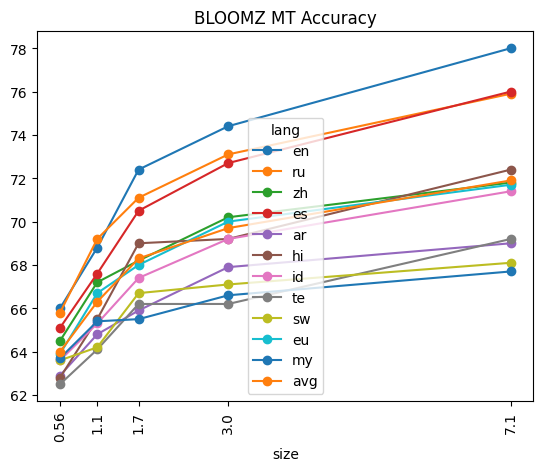

In [429]:
plot_size_df(
    acc_df_bloomz_mt[
        ["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]
    ],
    bloomz_model_sizes[:-2],
    bloomz_names[:-2],
    "BLOOMZ MT Accuracy",
)


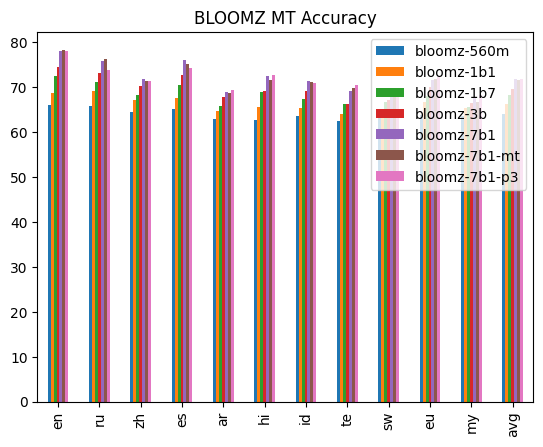

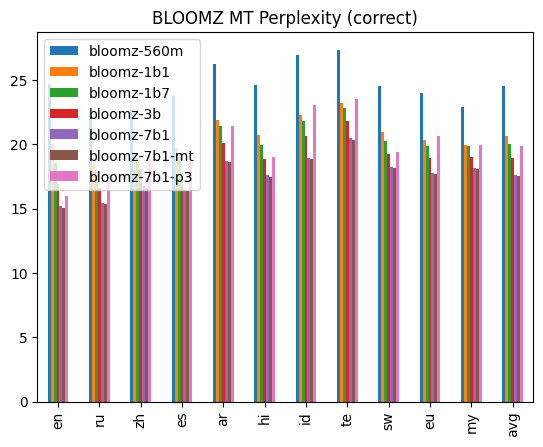

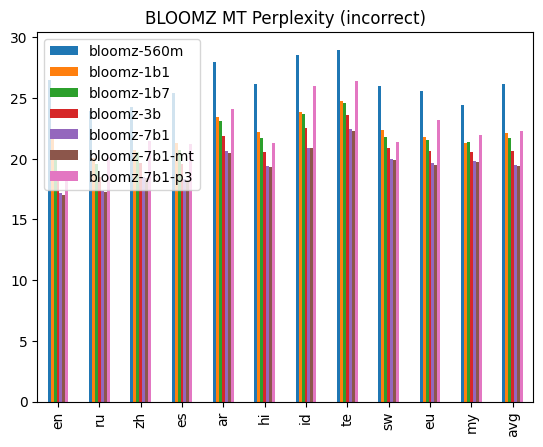

In [430]:
plot_df(acc_df_bloomz_mt, "BLOOMZ MT Accuracy")
plot_df(ppl_cor_df_bloomz_mt, "BLOOMZ MT Perplexity (correct)")
plot_df(ppl_inc_df_bloomz_mt, "BLOOMZ MT Perplexity (incorrect)")


## GPT2

In [431]:
gpt2_model_names = ["gpt2", "gpt2-medium", "gpt2-large", "gpt2-xl"]
gpt2_model_sizes = [0.125, 0.35, 0.77, 1.5]
gpt2_names = [name.split("/")[-1] for name in gpt2_model_names]
acc_df_gpt2_mt, ppl_cor_df_gpt2_mt, ppl_inc_df_gpt2_mt = get_dfs(
    gpt2_model_names, "xstory_cloze_mt_nllb-3B"
)


In [432]:
display(acc_df_gpt2_mt)
display(ppl_cor_df_gpt2_mt)
display(ppl_inc_df_gpt2_mt)


lang  gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en  60.3         64.8        68.3     71.2
1    ru  60.8         63.7        66.8     68.4
2    zh  61.1         63.9        65.9     65.7
3    es  60.3         64.5        66.0     68.5
4    ar  58.8         61.4        62.3     65.2
5    hi  60.0         62.9        64.9     66.7
6    id  58.4         62.1        62.7     64.9
7    te  58.2         60.8        62.3     62.9
8    sw  59.4         61.7        62.5     65.4
9    eu  60.7         63.2        64.3     65.3
10   my  59.7         62.0        63.1     63.5
11  avg  59.8         62.8        64.5     66.2

lang   gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en  27.99        21.54       19.03    17.32
1    ru  23.99        19.76       17.81    16.70
2    zh  25.28        21.25       19.41    18.48
3    es  25.74        21.08       19.03    17.84
4    ar  27.88        23.31       21.15    19.87
5    hi  27.35        22.77       20.71    19.57
6    id  28.53        23.64       21.56    20.38
7    te  29.91        25.72       23.50    22.35
8    sw  27.40        23.18       21.26    20.17
9    eu  24.96        21.36       19.58    18.67
10   my  25.20        22.09       20.44    19.77
11  avg  26.75        22.34       20.32    19.19

lang   gpt2  gpt2-medium  gpt2-large  gpt2-xl
0    en  29.38        23.08       20.56    18.94
1    ru  25.20        21.11       19.17    18.11
2    zh  26.49        22.57       20.75    19.87
3    es  26.93        22.37       20.34    19.21
4    ar  29.10        24.62       22.54    21.31
5    hi  28.59        24.14       22.08    21.03
6    id  29.64        24.91       22.88    21.82
7    te  31.00        26.89       24.75    23.70
8    sw  28.63        24.46       22.55    21.58
9    eu  26.14        22.63       20.86    20.05
10   my  26.35        23.34       21.74    21.14
11  avg  27.95        23.65       21.66    20.61

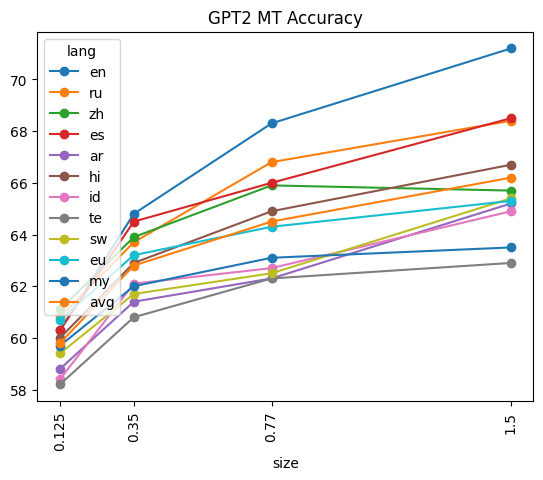

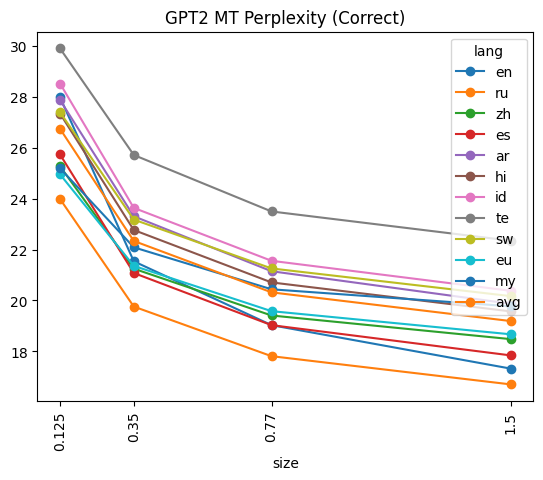

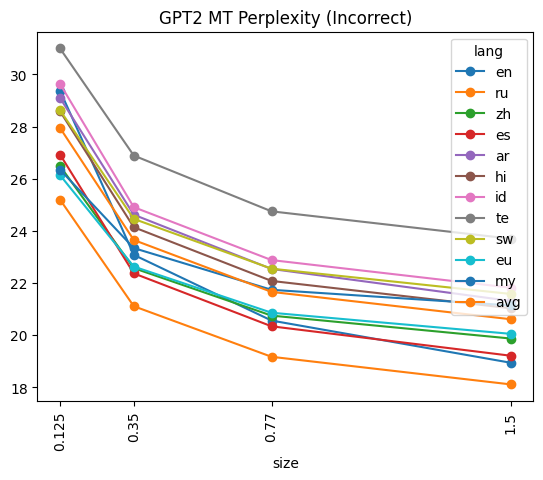

In [433]:
plot_size_df(acc_df_gpt2_mt, gpt2_model_sizes, gpt2_names, "GPT2 MT Accuracy")
plot_size_df(
    ppl_cor_df_gpt2_mt, gpt2_model_sizes, gpt2_names, "GPT2 MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_gpt2_mt, gpt2_model_sizes, gpt2_names, "GPT2 MT Perplexity (Incorrect)"
)


## OPT

In [434]:
opt_model_names = [
    "facebook/opt-125m",
    "facebook/opt-350m",
    "facebook/opt-1.3b",
    "facebook/opt-2.7b",
    "facebook/opt-6.7b",
    "facebook/opt-13b",
]
opt_model_sizes = [0.125, 0.35, 1.3, 2.7, 6.7, 13]
opt_names = [name.split("/")[-1] for name in opt_model_names]
acc_df_opt_mt, ppl_cor_df_opt_mt, ppl_inc_df_opt_mt = get_dfs(
    opt_model_names, "xstory_cloze_mt_nllb-3B"
)


In [435]:
display(acc_df_opt_mt)
display(ppl_cor_df_opt_mt)
display(ppl_inc_df_opt_mt)


lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en      61.1      64.3      74.0      75.4      78.8     79.4
1    ru      62.3      63.6      71.1      72.1      74.0     74.5
2    zh      60.5      63.5      68.9      71.3      72.2     72.8
3    es      60.8      63.9      71.3      71.7      72.7     74.1
4    ar      59.6      60.7      67.4      68.0      69.0     70.4
5    hi      60.2      62.5      67.6      69.8      71.0     71.7
6    id      58.6      60.4      66.4      68.5      70.3     70.9
7    te      58.3      59.0      64.9      66.0      67.8     68.8
8    sw      59.6      61.3      66.0      67.3      68.8     69.8
9    eu      61.0      63.0      67.8      67.8      68.9     70.1
10   my      59.9      61.5      65.3      65.9      66.8     67.6
11  avg      60.2      62.2      68.2      69.4      70.9     71.8

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     26.45     22.26     16.70     15.57     14.54    14.13
1    ru     23.52     20.55     16.87     16.08     15.36    15.07
2    zh     24.96     22.21     18.81     18.03     17.38    17.11
3    es     25.35     21.96     18.02     17.19     16.41    16.15
4    ar     27.40     24.08     20.04     19.21     18.45    18.12
5    hi     27.23     23.84     19.82     18.92     18.12    17.81
6    id     28.28     24.67     20.47     19.64     18.79    18.50
7    te     30.04     26.77     22.78     21.90     21.14    20.75
8    sw     27.71     24.38     20.73     20.02     19.29    19.01
9    eu     24.95     22.25     19.18     18.52     17.98    17.77
10   my     25.43     23.10     20.45     19.86     19.36    19.08
11  avg     26.48     23.28     19.44     18.63     17.89    17.59

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     27.82     23.71     18.50     17.39     16.43    16.07
1    ru     24.78     21.85     18.49     17.74     17.10    16.85
2    zh     26.16     23.51     20.40     19.69     19.09    18.88
3    es     26.59     23.26     19.61     18.80     18.09    17.93
4    ar     28.66     25.43     21.67     20.87     20.21    19.94
5    hi     28.46     25.15     21.45     20.58     19.90    19.62
6    id     29.46     25.89     22.09     21.31     20.55    20.35
7    te     31.15     27.95     24.31     23.55     22.89    22.56
8    sw     28.90     25.67     22.31     21.64     20.98    20.77
9    eu     26.19     23.54     20.71     20.11     19.62    19.47
10   my     26.64     24.39     22.01     21.46     21.02    20.79
11  avg     27.71     24.58     21.05     20.29     19.63    19.38

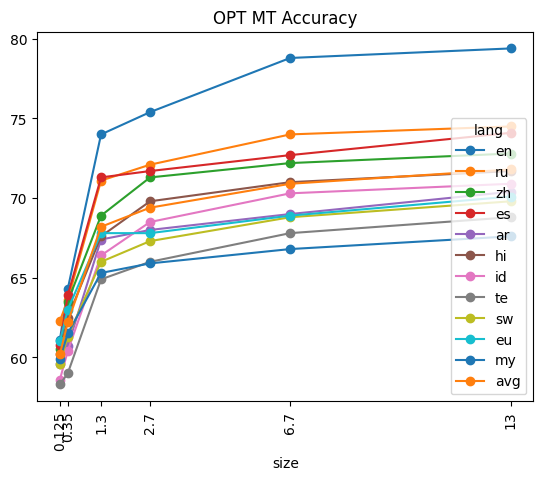

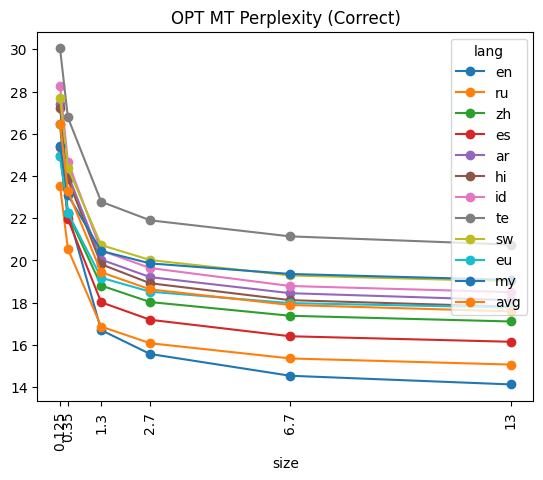

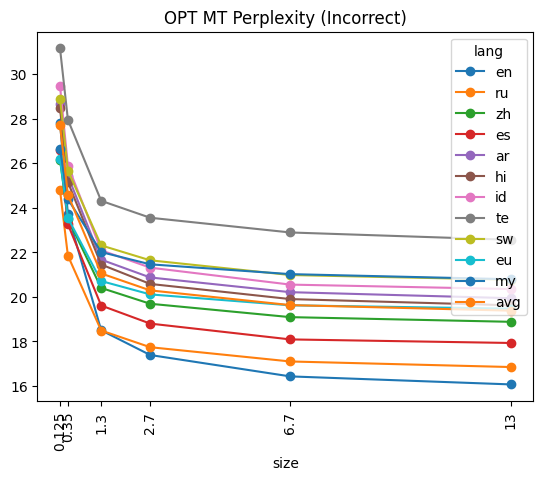

In [436]:
plot_size_df(acc_df_opt_mt, opt_model_sizes, opt_names, "OPT MT Accuracy")
plot_size_df(
    ppl_cor_df_opt_mt, opt_model_sizes, opt_names, "OPT MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_opt_mt, opt_model_sizes, opt_names, "OPT MT Perplexity (Incorrect)"
)


## LLaMA

In [437]:
llama_model_names = [
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/7B",
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/13B"
]
llama_model_sizes = [7, 13]
llama_names = [name.split("/")[-1] for name in llama_model_names]
acc_df_llama_mt, ppl_cor_df_llama_mt, ppl_inc_df_llama_mt = get_dfs(
    llama_model_names, "xstory_cloze_mt_nllb-3B"
)


In [438]:
display(acc_df_llama_mt)
display(ppl_cor_df_llama_mt)
display(ppl_inc_df_llama_mt)


lang    7B   13B
0    en  81.3  83.5
1    ru  75.2  76.2
2    zh  73.8  74.3
3    es  75.8  75.6
4    ar  69.0  70.4
5    hi  73.2  75.0
6    id  71.9  71.9
7    te  68.2  69.8
8    sw  68.4  70.4
9    eu  68.4  69.6
10   my  67.7  69.0
11  avg  72.1  73.2

lang     7B    13B
0    en  10.21   9.82
1    ru  10.75  10.50
2    zh  12.13  11.85
3    es  11.45  11.17
4    ar  12.81  12.56
5    hi  12.80  12.48
6    id  12.74  12.46
7    te  14.54  14.23
8    sw  13.53  13.27
9    eu  12.60  12.41
10   my  13.65  13.48
11  avg  12.47  12.20

lang     7B    13B
0    en  11.48  11.17
1    ru  11.88  11.67
2    zh  13.27  13.05
3    es  12.56  12.34
4    ar  13.92  13.72
5    hi  14.01  13.76
6    id  13.88  13.65
7    te  15.64  15.41
8    sw  14.64  14.46
9    eu  13.63  13.49
10   my  14.68  14.57
11  avg  13.60  13.39

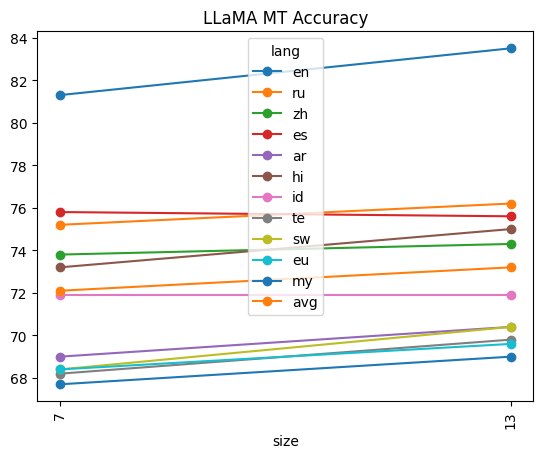

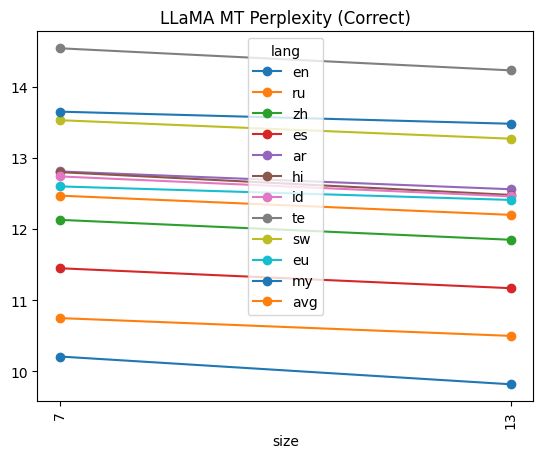

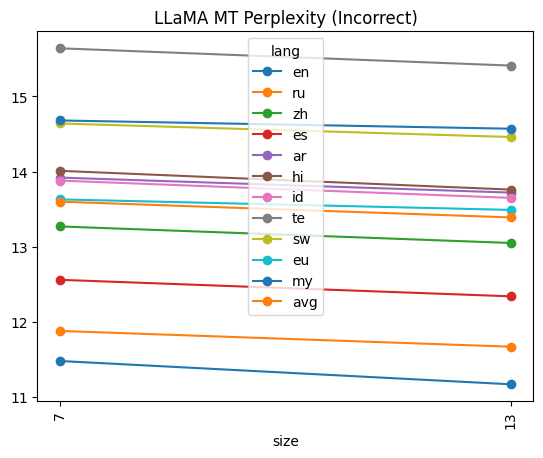

In [439]:
plot_size_df(acc_df_llama_mt, llama_model_sizes, llama_names, "LLaMA MT Accuracy")
plot_size_df(ppl_cor_df_llama_mt, llama_model_sizes, llama_names, "LLaMA MT Perplexity (Correct)")
plot_size_df(ppl_inc_df_llama_mt, llama_model_sizes, llama_names, "LLaMA MT Perplexity (Incorrect)")


## MT5

In [440]:
mt5_model_names = [
    "google/mt5-small",
    "google/mt5-base",
    "google/mt5-large",
    "google/mt5-xl",
    "google/mt5-xxl",
]
mt5_model_sizes = [0.30, 0.58, 1.2, 3.7, 13]
mt5_names = [name.split("/")[-1] for name in mt5_model_names]
acc_df_mt5_mt, ppl_cor_df_mt5_mt, ppl_inc_df_mt5_mt = get_dfs(mt5_model_names)


In [441]:
display(acc_df_mt5_mt)
display(ppl_cor_df_mt5_mt)
display(ppl_inc_df_mt5_mt)


lang  mt5-small  mt5-base  mt5-large  mt5-xl  mt5-xxl
0    en       50.7      49.8       44.3    45.7     46.7
1    ru       49.0      51.6       47.1    41.8     46.1
2    zh       49.3      49.6       47.1    40.4     49.8
3    es       51.2      49.0       50.0    44.4     45.9
4    ar       51.0      50.3       45.7    43.9     50.3
5    hi       49.4      52.2       50.0    46.1     48.5
6    id       48.8      50.0       44.0    42.5     48.9
7    te       50.2      50.5       46.9    45.5     50.8
8    sw       47.4      50.7       45.6    43.2     48.8
9    eu       48.6      49.1       49.4    43.1     49.3
10   my       49.1      51.8       48.8    44.5     48.4
11  avg       49.5      50.4       47.2    43.7     48.5

lang     mt5-small     mt5-base     mt5-large      mt5-xl    mt5-xxl
0    en  1.868034e+06  13544203.47  1.090669e+13   430029.12   52047.26
1    ru  9.191158e+06   2702896.53  1.756600e+12  1156627.72  182663.40
2    zh  4.444300e+08   3381148.52  1.591443e+11   235086.81   34299.03
3    es  1.559326e+07  15621977.25  3.528823e+12   523036.06  158619.27
4    ar  8.636016e+07    631214.11  2.519046e+11   494111.37  371093.43
5    hi  5.193157e+06    440435.60  3.066918e+12   545452.65   75027.17
6    id  7.681878e+06   4597085.88  1.437592e+12   914272.11  152048.12
7    te  1.458078e+07   1084107.23  9.377326e+11  2048464.26  287550.24
8    sw  7.219980e+06   1882629.47  7.710654e+11   666076.29  172698.93
9    eu  3.141810e+08   1661057.36  3.684538e+11   635447.47  209447.90
10   my  1.725319e+07    226728.59  3.069245e+11    22331.18   31772.40
11  avg  8.395933e+07   4161225.82  2.135622e+12   697357.73  157024.29

lang     mt5-small     mt5-base     mt5-large      mt5-xl    mt5-xxl
0    en  1.898570e+06  12586895.32  8.822960e+12   395244.60   50020.69
1    ru  8.365080e+06   2974320.42  1.644000e+12  1010340.02  174627.48
2    zh  4.446624e+08   3136163.89  1.477492e+11   192303.46   33740.45
3    es  1.432284e+07  16987046.06  3.835069e+12   473619.80  150019.05
4    ar  8.655757e+07    664944.35  2.157728e+11   450470.40  373841.93
5    hi  4.689022e+06    495191.68  3.540121e+12   502215.00   73489.47
6    id  7.017224e+06   4252444.84  1.112272e+12   785641.19  147808.54
7    te  1.426079e+07   1080053.90  8.995039e+11  1895669.68  292477.09
8    sw  5.914702e+06   2147655.83  5.932067e+11   597187.71  171105.07
9    eu  2.846103e+08   1695084.05  3.535874e+11   585323.86  207716.86
10   my  1.745429e+07    239121.09  2.866825e+11    20229.77   30554.28
11  avg  8.088662e+07   4205356.49  1.950084e+12   628022.32  155036.45

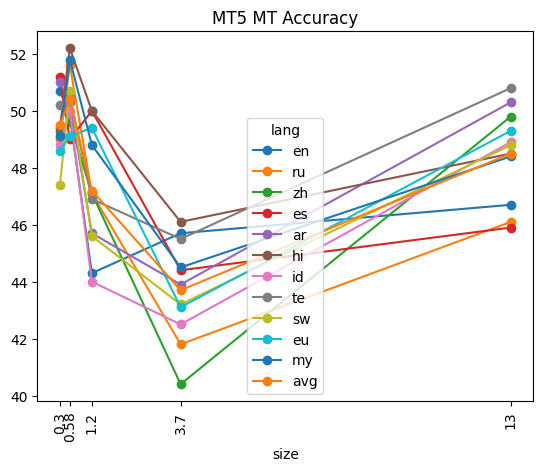

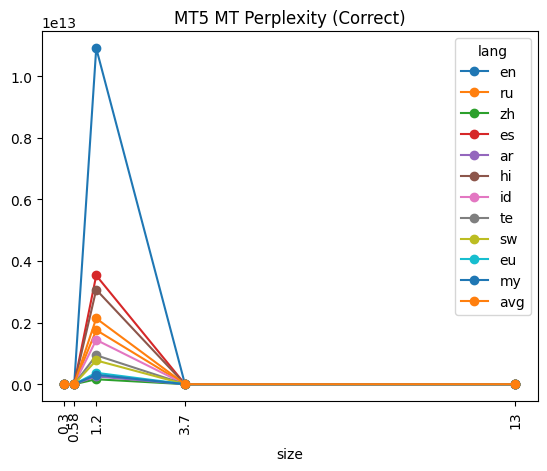

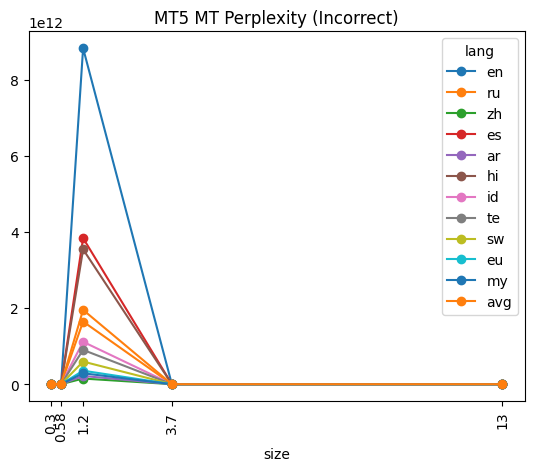

In [442]:
plot_size_df(acc_df_mt5_mt, mt5_model_sizes, mt5_names, "MT5 MT Accuracy")
plot_size_df(
    ppl_cor_df_mt5_mt, mt5_model_sizes, mt5_names, "MT5 MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_mt5_mt, mt5_model_sizes, mt5_names, "MT5 MT Perplexity (Incorrect)"
)


## MT0

In [443]:
mt0_model_names = [
    "bigscience/mt0-small",
    "bigscience/mt0-base",
    "bigscience/mt0-large",
    "bigscience/mt0-xl",
    "bigscience/mt0-xxl",
    "bigscience/mt0-xxl-mt",
    "bigscience/mt0-xxl-p3",
]
mt0_model_sizes = [0.30, 0.58, 1.2, 3.7, 13, 13, 13]
mt0_names = [name.split("/")[-1] for name in mt0_model_names]
acc_df_mt0_mt, ppl_cor_df_mt0_mt, ppl_inc_df_mt0_mt = get_dfs(mt0_model_names)


In [444]:
display(acc_df_mt0_mt)
display(ppl_cor_df_mt0_mt)
display(ppl_inc_df_mt0_mt)


lang  mt0-small  mt0-base  mt0-large  mt0-xl  mt0-xxl  mt0-xxl-mt  \
0    en       52.2      53.0       57.7    58.2     52.3        61.9   
1    ru       52.1      52.5       56.3    51.5     47.9        54.3   
2    zh       56.1      56.3       60.6    59.6     58.0        65.4   
3    es       50.8      51.1       53.5    56.1     52.9        59.7   
4    ar       55.0      56.5       59.4    58.4     52.3        55.3   
5    hi       53.1      50.4       53.0    51.6     45.1        48.0   
6    id       51.2      51.9       54.6    56.1     52.0        58.3   
7    te       52.1      50.6       51.5    51.6     46.5        51.0   
8    sw       50.9      51.7       52.9    50.8     48.6        52.2   
9    eu       52.5      53.0       51.9    52.2     49.9        52.8   
10   my       53.5      53.1       55.8    53.5     47.5        50.6   
11  avg       52.7      52.7       55.2    54.5     50.3        55.4   

    mt0-xxl-p3  
0         55.5  
1         49.8  
2         60.4  
3         55.9  
4         56.9  
5         49.8  
6         53.9  
7         50.5  
8         51.0  
9         56.6  
10        50.8  
11        53.7

lang  mt0-small    mt0-base  mt0-large     mt0-xl    mt0-xxl  mt0-xxl-mt  \
0    en   29597.35    44176.27   41405.60   35553.32   47628.41    38042.25   
1    ru  254904.25   215405.58  162926.15  213173.36  455962.32   413178.37   
2    zh   13943.28    11925.64    7253.30    8658.36   12979.83    13955.19   
3    es  164265.44   339508.68  276677.78  249016.55  247868.88   214090.95   
4    ar  624524.10  1046864.84  909197.54  603704.73  595675.91   565579.17   
5    hi  276203.94   393623.53  433897.04  240315.71  349422.50   211590.69   
6    id  156301.69   196353.21  206282.52  239225.56  241345.34   170105.83   
7    te  496192.25   579687.75  500102.24  351396.01  386721.46   221383.23   
8    sw  226204.01   316419.65  417665.22  363194.43  424621.87   360111.66   
9    eu  110096.57   281172.61  132496.97  169066.54  233001.95   179328.66   
10   my   69543.57    86725.48   34081.13   13803.17   33254.95    17257.74   
11  avg  220161.50   319260.29  283816.86  226100.70  275316.67   218602.16   

    mt0-xxl-p3  
0     62807.47  
1    298405.27  
2     19532.49  
3    217956.68  
4    237281.38  
5    110700.80  
6    188930.22  
7    219515.77  
8    441383.95  
9    438733.71  
10    25650.11  
11   205536.17

lang  mt0-small    mt0-base   mt0-large     mt0-xl    mt0-xxl  mt0-xxl-mt  \
0    en   30188.86    45515.61    44550.32   39341.94   50453.23    47072.80   
1    ru  257653.59   218920.94   170039.42  222574.66  443688.89   463167.40   
2    zh   14711.82    12705.81     8016.46    9940.13   15518.50    19237.55   
3    es  166772.82   343418.18   289193.44  267272.10  261946.81   251684.06   
4    ar  656930.96  1109967.36  1016557.52  678305.29  624540.63   643130.70   
5    hi  282128.84   398578.00   444732.53  247719.65  337483.54   215143.44   
6    id  157915.39   197858.57   214570.39  262929.87  260022.68   199971.44   
7    te  503919.63   578013.64   505242.03  362394.89  371747.28   231005.90   
8    sw  226063.34   317666.00   423199.48  370158.89  417270.13   384732.83   
9    eu  112435.20   291335.36   136114.38  175487.13  232316.76   194044.70   
10   my   71698.02    89778.66    35669.51   14405.24   32217.28    17705.10   
11  avg  225492.59   327614.38   298898.68  240957.25  277018.70   242445.08   

    mt0-xxl-p3  
0     66089.76  
1    301849.45  
2     22182.12  
3    232820.06  
4    256561.18  
5    112504.43  
6    201445.87  
7    222710.22  
8    447072.70  
9    472058.27  
10    25994.29  
11   214662.58

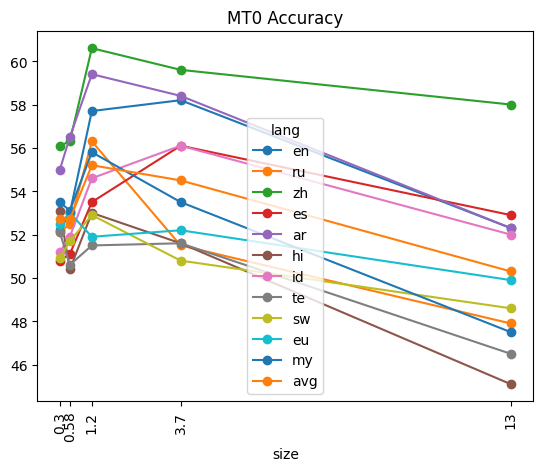

In [445]:
plot_size_df(
    acc_df_mt0_mt[
        ["lang", "mt0-small",
        "mt0-base",
        "mt0-large",
        "mt0-xl",
        "mt0-xxl"]
    ],
    mt0_model_sizes[:-2],
    mt0_names[:-2],
    "MT0 Accuracy",
)

## Summary EU MT

In [446]:
# summarize the eu language results for all models
model_sizes = (
    mgpt_model_sizes
    + xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + gpt2_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    mgpt_names + xglm_names + bloom_names + bloomz_names + gpt2_names + opt_names + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[16] = "bloomz-mt"
models[17] = "bloomz-p3"
models[28] = "llama"
models[29] = "llama"

acc_dfs = [
    acc_df_mgpt_mt,
    acc_df_xglm_mt,
    acc_df_bloom_mt,
    acc_df_bloomz_mt,
    acc_df_gpt2_mt,
    acc_df_opt_mt,
    acc_df_llama_mt,
]
ppl_cor_dfs = [
    ppl_cor_df_mgpt_mt,
    ppl_cor_df_xglm_mt,
    ppl_cor_df_bloom_mt,
    ppl_cor_df_bloomz_mt,
    ppl_cor_df_gpt2_mt,
    ppl_cor_df_opt_mt,
    ppl_cor_df_llama_mt,
]
ppl_inc_dfs = [
    ppl_inc_df_mgpt_mt,
    ppl_inc_df_xglm_mt,
    ppl_inc_df_bloom_mt,
    ppl_inc_df_bloomz_mt,
    ppl_inc_df_gpt2_mt,
    ppl_inc_df_opt_mt,
    ppl_inc_df_llama_mt,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_mt_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [447]:
results_eu_mt_df

model_name      model    size   acc  ppl_cor  ppl_inc
0            mGPT       mGPT   1.300  61.2    19.41    20.41
1       xglm-564M       xglm   0.560  60.8    20.39    21.29
2       xglm-1.7B       xglm   1.700  64.3    17.80    18.84
3       xglm-2.9B       xglm   2.900  66.2    16.94    18.07
4       xglm-4.5B       xglm   4.500  66.0    16.39    17.54
5       xglm-7.5B       xglm   7.500  66.6    16.25    17.43
6      bloom-560m      bloom   0.560  62.7    23.53    24.94
7       bloom-1b1      bloom   1.100  65.0    20.72    22.09
8       bloom-1b7      bloom   1.700  66.8    19.32    20.74
9        bloom-3b      bloom   3.000  68.7    17.96    19.40
10      bloom-7b1      bloom   7.100  69.5    16.94    18.43
11    bloomz-560m     bloomz   0.560  63.9    23.98    25.55
12     bloomz-1b1     bloomz   1.100  66.7    20.30    21.76
13     bloomz-1b7     bloomz   1.700  68.0    19.87    21.52
14      bloomz-3b     bloomz   3.000  70.0    18.94    20.64
15     bloomz-7b1     bloomz   7.100  71.7    17.78    19.62
16  bloomz-7b1-mt  bloomz-mt   7.100  71.9    17.70    19.51
17  bloomz-7b1-p3  bloomz-p3   7.100  72.2    20.65    23.19
18           gpt2       gpt2   0.125  60.7    24.96    26.14
19    gpt2-medium       gpt2   0.350  63.2    21.36    22.63
20     gpt2-large       gpt2   0.770  64.3    19.58    20.86
21        gpt2-xl       gpt2   1.500  65.3    18.67    20.05
22       opt-125m        opt   0.125  61.0    24.95    26.19
23       opt-350m        opt   0.350  63.0    22.25    23.54
24       opt-1.3b        opt   1.300  67.8    19.18    20.71
25       opt-2.7b        opt   2.700  67.8    18.52    20.11
26       opt-6.7b        opt   6.700  68.9    17.98    19.62
27        opt-13b        opt  13.000  70.1    17.77    19.47
28             7B      llama   7.000  68.4    12.60    13.63
29            13B      llama  13.000  69.6    12.41    13.49

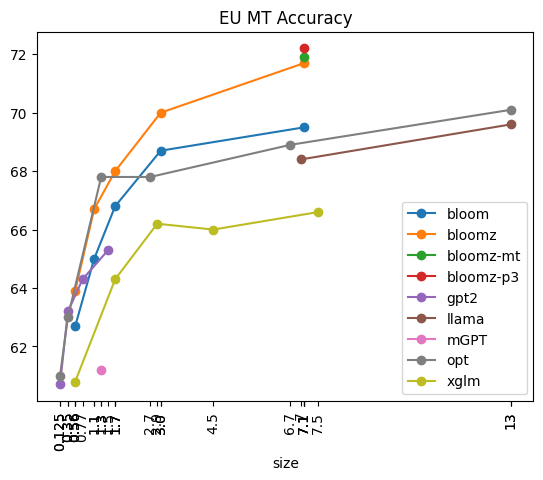

In [448]:
results_eu_mt_df.set_index("size", inplace=True)
results_eu_mt_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU MT Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


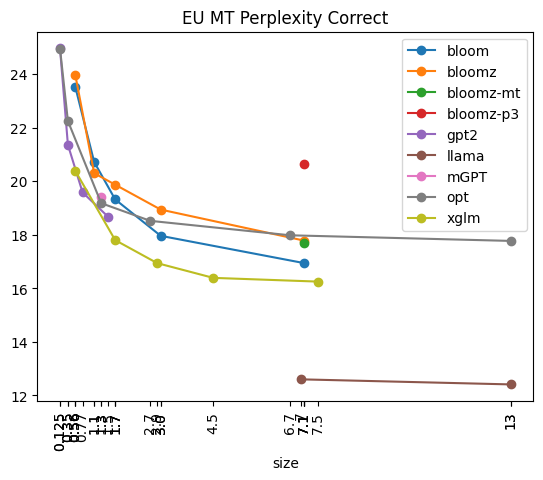

In [449]:
results_eu_mt_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="EU MT Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


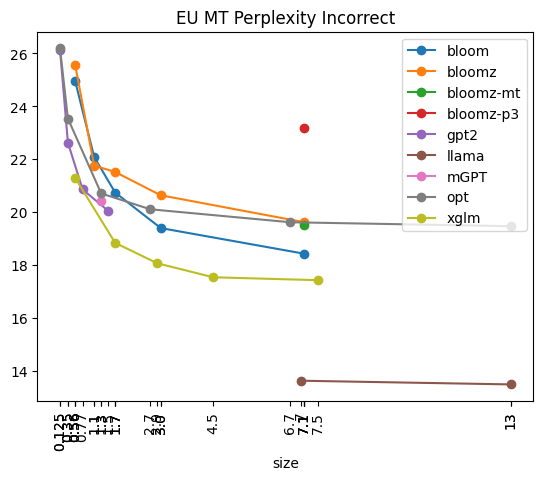

In [450]:
results_eu_mt_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="EU MT Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


## Summary AVG MT

In [451]:
# summarize the eu language results for all models
model_sizes = (
    mgpt_model_sizes
    + xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + gpt2_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    mgpt_names + xglm_names + bloom_names + bloomz_names + gpt2_names + opt_names + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[16] = "bloomz-mt"
models[17] = "bloomz-p3"
models[28] = "llama"
models[29] = "llama"

acc_dfs = [
    acc_df_mgpt_mt,
    acc_df_xglm_mt,
    acc_df_bloom_mt,
    acc_df_bloomz_mt,
    acc_df_gpt2_mt,
    acc_df_opt_mt,
    acc_df_llama_mt,
]
ppl_cor_dfs = [
    ppl_cor_df_mgpt_mt,
    ppl_cor_df_xglm_mt,
    ppl_cor_df_bloom_mt,
    ppl_cor_df_bloomz_mt,
    ppl_cor_df_gpt2_mt,
    ppl_cor_df_opt_mt,
    ppl_cor_df_llama_mt,
]
ppl_inc_dfs = [
    ppl_inc_df_mgpt_mt,
    ppl_inc_df_xglm_mt,
    ppl_inc_df_bloom_mt,
    ppl_inc_df_bloomz_mt,
    ppl_inc_df_gpt2_mt,
    ppl_inc_df_opt_mt,
    ppl_inc_df_llama_mt,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_mt_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [452]:
results_avg_mt_df

model_name      model    size   acc  ppl_cor  ppl_inc
0            mGPT       mGPT   1.300  61.6    20.28    21.28
1       xglm-564M       xglm   0.560  60.3    21.26    22.18
2       xglm-1.7B       xglm   1.700  63.7    18.32    19.39
3       xglm-2.9B       xglm   2.900  65.9    17.22    18.40
4       xglm-4.5B       xglm   4.500  66.6    16.63    17.83
5       xglm-7.5B       xglm   7.500  67.5    16.44    17.67
6      bloom-560m      bloom   0.560  62.8    24.55    26.01
7       bloom-1b1      bloom   1.100  64.7    21.40    22.81
8       bloom-1b7      bloom   1.700  66.7    19.85    21.33
9        bloom-3b      bloom   3.000  68.2    18.24    19.73
10      bloom-7b1      bloom   7.100  69.7    16.98    18.51
11    bloomz-560m     bloomz   0.560  64.0    24.54    26.14
12     bloomz-1b1     bloomz   1.100  66.3    20.61    22.12
13     bloomz-1b7     bloomz   1.700  68.3    20.03    21.73
14      bloomz-3b     bloomz   3.000  69.7    18.89    20.63
15     bloomz-7b1     bloomz   7.100  71.9    17.61    19.47
16  bloomz-7b1-mt  bloomz-mt   7.100  71.7    17.50    19.35
17  bloomz-7b1-p3  bloomz-p3   7.100  71.8    19.84    22.30
18           gpt2       gpt2   0.125  59.8    26.75    27.95
19    gpt2-medium       gpt2   0.350  62.8    22.34    23.65
20     gpt2-large       gpt2   0.770  64.5    20.32    21.66
21        gpt2-xl       gpt2   1.500  66.2    19.19    20.61
22       opt-125m        opt   0.125  60.2    26.48    27.71
23       opt-350m        opt   0.350  62.2    23.28    24.58
24       opt-1.3b        opt   1.300  68.2    19.44    21.05
25       opt-2.7b        opt   2.700  69.4    18.63    20.29
26       opt-6.7b        opt   6.700  70.9    17.89    19.63
27        opt-13b        opt  13.000  71.8    17.59    19.38
28             7B      llama   7.000  72.1    12.47    13.60
29            13B      llama  13.000  73.2    12.20    13.39

In [453]:
results_avg_mt_df.set_index("size", inplace=True)

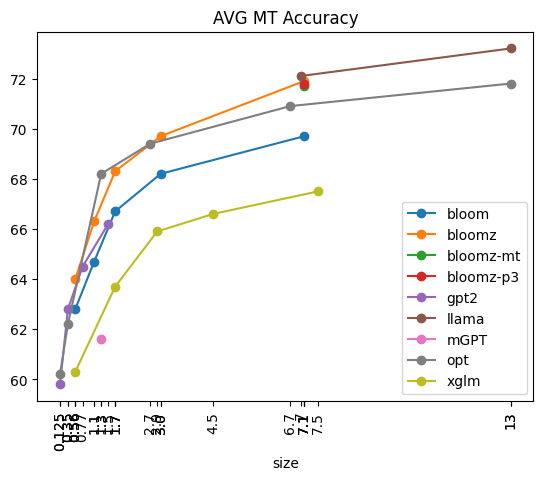

In [454]:
results_avg_mt_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG MT Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


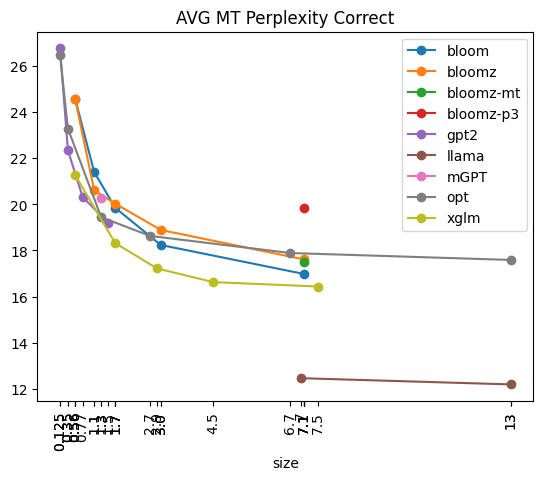

In [455]:
results_avg_mt_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="AVG MT Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


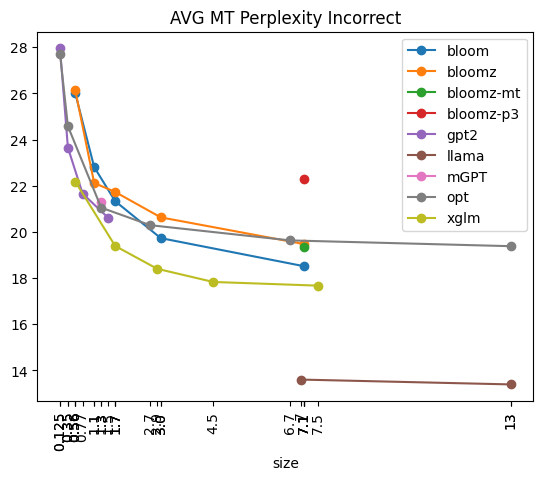

In [456]:
results_avg_mt_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="AVG MT Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


# XStoryCloze Evaluation MT Few-shot

## XGLM

In [457]:
xglm_model_names = [
    "facebook/xglm-564M",
    "facebook/xglm-1.7B",
    "facebook/xglm-2.9B",
    "facebook/xglm-4.5B",
    "facebook/xglm-7.5B",
]
xglm_model_sizes = [0.56, 1.7, 2.9, 4.5, 7.5]
xglm_names = [name.split("/")[-1] for name in xglm_model_names]
acc_df_xglm_mt_few_shot, ppl_cor_df_xglm_mt_few_shot, ppl_inc_df_xglm_mt_few_shot = get_dfs(
    xglm_model_names, "xstory_cloze_mt_few_shot"
)


In [458]:
display(acc_df_xglm_mt_few_shot)
display(ppl_cor_df_xglm_mt_few_shot)
display(ppl_inc_df_xglm_mt_few_shot)


lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en       61.3       66.6       69.6       72.1       73.7
1    ru       55.2       60.8       67.8       67.2       69.0
2    zh       52.2       58.0       60.2       60.6       61.1
3    es       55.1       60.4       64.9       68.1       69.2
4    ar       53.1       56.8       60.1       60.1       62.8
5    hi       53.7       58.9       60.7       60.0       64.7
6    id       53.7       59.3       62.6       64.2       67.2
7    te       52.2       56.4       59.3       57.2       59.9
8    sw       51.0       58.0       59.7       58.6       62.0
9    eu       51.9       56.3       61.0       49.4       64.0
10   my       48.8       58.5       60.2       52.2       62.0
11  avg       53.5       59.1       62.4       60.9       65.1

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      21.41      17.18      15.57      14.67      14.43
1    ru      31.76      22.31      18.47      17.75      16.20
2    zh      71.54      44.61      38.01      37.15      33.43
3    es      51.74      24.59      19.20      18.24      16.65
4    ar      47.31      26.80      23.12      25.13      20.97
5    hi      30.77      25.91      22.38      22.85      20.08
6    id      51.36      25.58      19.81      19.68      18.45
7    te      22.12      27.03      23.88      22.92      20.80
8    sw      53.44      27.49      22.67      24.07      19.95
9    eu      49.71      26.55      22.15      16.93      19.00
10   my       3.42      22.05      20.58      19.34      18.75
11  avg      39.51      26.37      22.35      21.70      19.88

lang  xglm-564M  xglm-1.7B  xglm-2.9B  xglm-4.5B  xglm-7.5B
0    en      22.50      18.41      16.91      16.04      15.83
1    ru      32.63      23.57      19.88      19.19      17.47
2    zh      72.39      46.29      39.88      39.09      35.32
3    es      52.85      25.74      20.47      19.62      18.00
4    ar      47.78      27.51      24.30      26.59      22.28
5    hi      31.30      27.09      23.50      23.91      21.37
6    id      52.27      26.82      21.00      20.97      19.71
7    te      22.71      27.97      24.92      23.68      21.80
8    sw      52.75      28.46      23.64      24.88      21.01
9    eu      49.88      27.34      23.24      16.91      20.11
10   my       3.45      22.83      21.44      19.59      19.67
11  avg      40.05      27.46      23.56      22.77      21.14

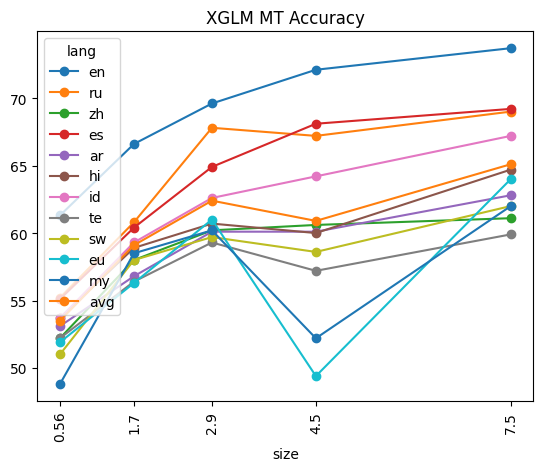

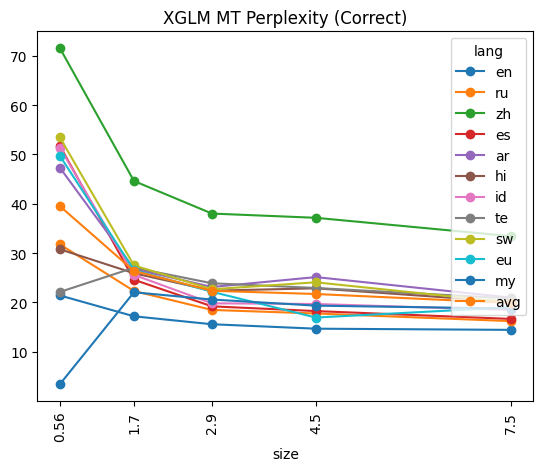

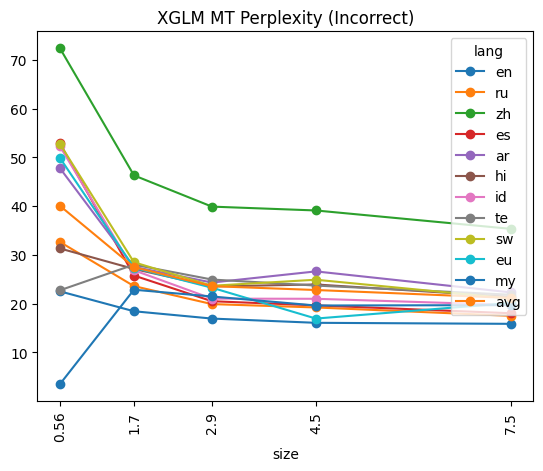

In [459]:
plot_size_df(acc_df_xglm_mt_few_shot, xglm_model_sizes, xglm_names, "XGLM MT Accuracy")
plot_size_df(
    ppl_cor_df_xglm_mt_few_shot, xglm_model_sizes, xglm_names, "XGLM MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_xglm_mt_few_shot, xglm_model_sizes, xglm_names, "XGLM MT Perplexity (Incorrect)"
)


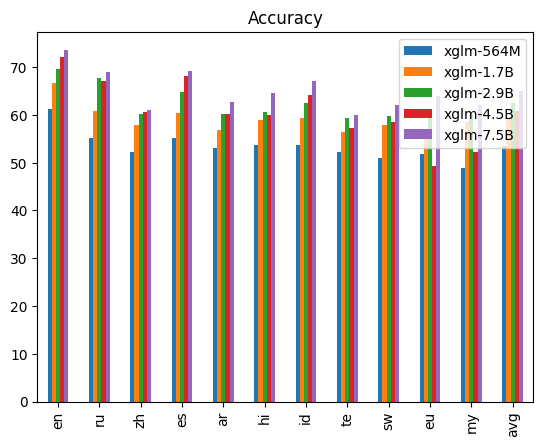

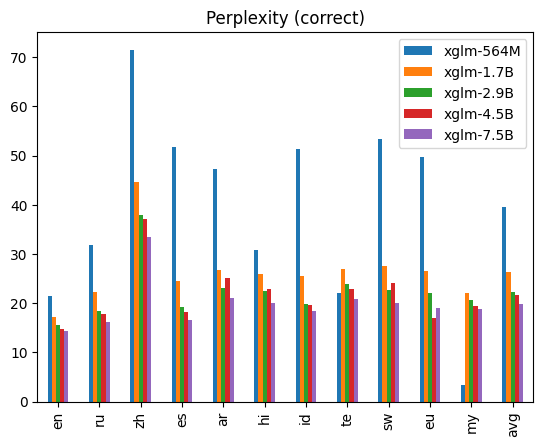

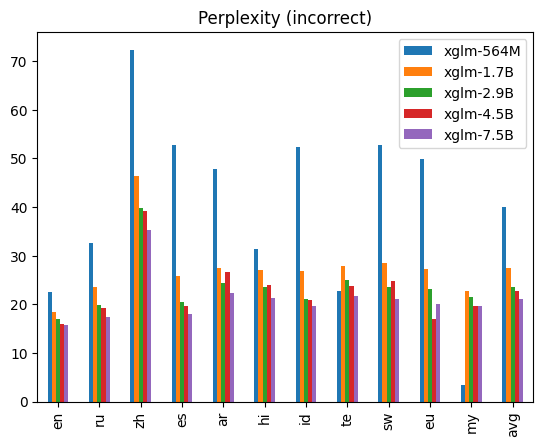

In [460]:
plot_df(acc_df_xglm_mt_few_shot, "Accuracy")
plot_df(ppl_cor_df_xglm_mt_few_shot, "Perplexity (correct)")
plot_df(ppl_inc_df_xglm_mt_few_shot, "Perplexity (incorrect)")


## BLOOM

In [461]:
bloom_model_names = [
    "bigscience/bloom-560m",
    "bigscience/bloom-1b1",
    "bigscience/bloom-1b7",
    "bigscience/bloom-3b",
    "bigscience/bloom-7b1",
]
bloom_names = [name.split("/")[-1] for name in bloom_model_names]
bloom_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1]
acc_df_bloom_mt_few_shot, ppl_cor_df_bloom_mt_few_shot, ppl_inc_df_bloom_mt_few_shot = get_dfs(
    bloom_model_names, "xstory_cloze_mt_few_shot"
)


In [462]:
display(acc_df_bloom_mt_few_shot)
display(ppl_cor_df_bloom_mt_few_shot)
display(ppl_inc_df_bloom_mt_few_shot)


lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en        64.1       67.4       70.0      72.1       74.9
1    ru        49.2       50.2       52.0      53.8       57.8
2    zh        59.6       63.5       64.1      68.4       70.4
3    es        59.6       63.3       65.7      68.5       71.4
4    ar        55.3       58.4       62.3      64.9       67.4
5    hi        55.9       57.9       58.4      62.4       66.1
6    id        57.6       60.9       63.9      64.8       68.4
7    te        53.4       54.5       55.8      59.0       62.0
8    sw        49.9       51.6       54.4      56.4       59.0
9    eu        51.2       54.3       55.5      59.2       64.7
10   my        47.3       47.2       48.4      48.2       46.9
11  avg        54.8       57.2       59.1      61.6       64.5

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       25.17      21.03      18.82     16.70      14.87
1    ru        6.23      17.37      35.31     35.01      32.47
2    zh       40.49      32.83      28.72     23.13      19.95
3    es       57.83      37.07      32.63     25.58      20.98
4    ar       41.60      38.63      38.10     30.53      25.87
5    hi       34.92      38.23      36.85     29.12      24.33
6    id      217.57      40.87      33.54     29.87      23.48
7    te       26.03      21.74      38.48     33.05      29.60
8    sw      272.28      57.40      53.85     45.35      32.50
9    eu      116.22      41.80      46.21     36.97      28.10
10   my        4.74       3.28       6.71      4.00       2.90
11  avg       76.64      31.84      33.57     28.12      23.19

lang  bloom-560m  bloom-1b1  bloom-1b7  bloom-3b  bloom-7b1
0    en       26.79      22.58      20.45     18.33      16.53
1    ru        6.25      17.34      36.06     35.54      33.88
2    zh       42.48      34.90      30.91     25.15      21.92
3    es       60.25      39.71      35.19     27.80      23.09
4    ar       42.59      40.28      40.48     32.86      28.07
5    hi       35.36      39.67      38.55     31.13      26.19
6    id      222.93      43.03      35.94     32.12      25.43
7    te       26.18      22.25      40.02     34.69      31.47
8    sw      265.37      58.32      54.66     46.92      33.90
9    eu      117.35      43.05      47.69     38.91      30.39
10   my        4.74       3.28       6.75      3.99       2.89
11  avg       77.30      33.13      35.15     29.77      24.89

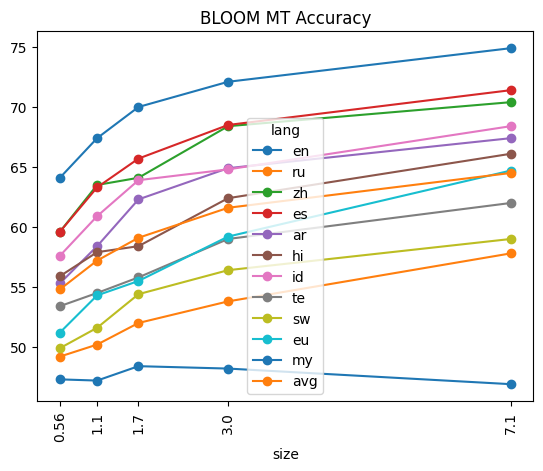

In [463]:
plot_size_df(acc_df_bloom_mt_few_shot, bloom_model_sizes, bloom_names, "BLOOM MT Accuracy")


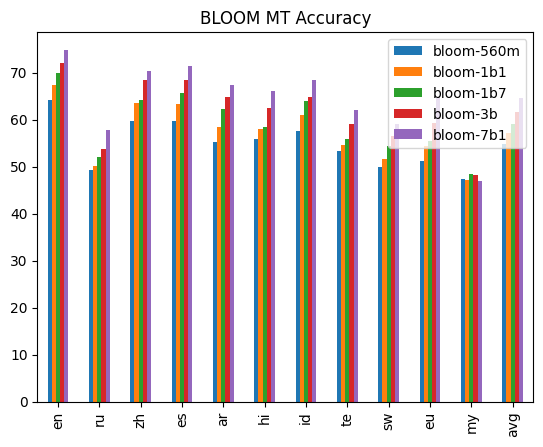

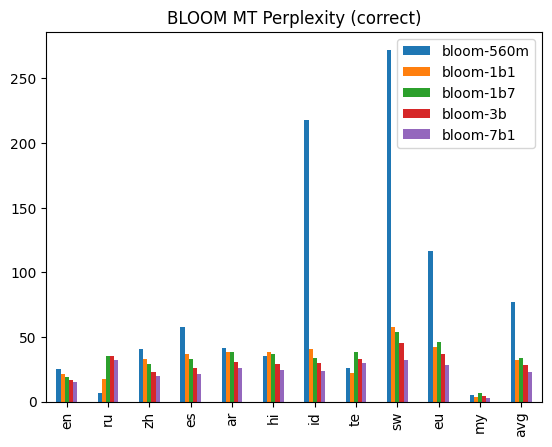

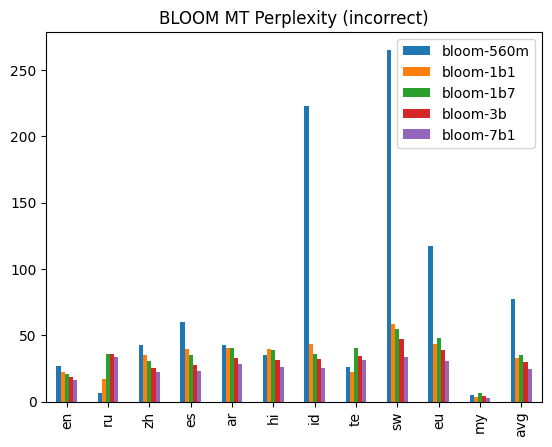

In [464]:
plot_df(acc_df_bloom_mt_few_shot, "BLOOM MT Accuracy")
plot_df(ppl_cor_df_bloom_mt_few_shot, "BLOOM MT Perplexity (correct)")
plot_df(ppl_inc_df_bloom_mt_few_shot, "BLOOM MT Perplexity (incorrect)")


## BLOOMZ

In [465]:
bloomz_model_names = [
    "bigscience/bloomz-560m",
    "bigscience/bloomz-1b1",
    "bigscience/bloomz-1b7",
    "bigscience/bloomz-3b",
    "bigscience/bloomz-7b1",
    "bigscience/bloomz-7b1-mt",
    "bigscience/bloomz-7b1-p3",
]
bloomz_names = [name.split("/")[-1] for name in bloomz_model_names]
bloomz_model_sizes = [0.56, 1.1, 1.7, 3.0, 7.1, 7.1, 7.1]
acc_df_bloomz_mt_few_shot, ppl_cor_df_bloomz_mt_few_shot, ppl_inc_df_bloomz_mt_few_shot = get_dfs(
    bloomz_model_names, "xstory_cloze_mt_few_shot"
)


In [466]:
display(acc_df_bloomz_mt_few_shot)
display(ppl_cor_df_bloomz_mt_few_shot)
display(ppl_inc_df_bloomz_mt_few_shot)


lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en         66.0        68.8        72.4       74.4        78.0   
1    ru         51.6        51.1        51.6       52.3        58.7   
2    zh         58.8        65.5        65.2       66.7        72.6   
3    es         58.2        65.0        62.9       64.9        70.7   
4    ar         54.2        60.7        58.5       59.6        66.2   
5    hi         54.9        59.3        57.1       58.5        66.1   
6    id         54.3        61.8        61.9       62.8        70.5   
7    te         54.7        55.2        53.9       56.5        61.9   
8    sw         50.5        49.4        49.2       52.5        59.4   
9    eu         50.8        52.5        50.4       55.8        61.0   
10   my         48.0        47.2        47.2       47.2        50.5   
11  avg         54.7        57.9        57.3       59.2        65.1   

    bloomz-7b1-mt  bloomz-7b1-p3  
0            78.4           78.1  
1            58.7           58.1  
2            72.6           69.8  
3            73.5           69.4  
4            67.4           65.5  
5            66.4           66.6  
6            72.6           67.6  
7            60.3           59.5  
8            60.2           56.3  
9            62.0           61.8  
10           47.1           49.3  
11           65.4           63.8

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        24.69       20.04       18.57      16.90       15.18   
1    ru         9.37       19.11       29.90      33.78       29.69   
2    zh        35.00       26.01       27.12      24.47       17.86   
3    es        44.27       29.64       32.67      28.04       22.57   
4    ar        39.63       33.54       34.94      31.31       26.15   
5    hi       138.40       27.48       74.44      52.84       25.22   
6    id       136.83       30.70       30.93      29.83       21.74   
7    te        27.75       26.24       42.03      39.88       31.13   
8    sw      9858.49       71.76      381.96      65.98       32.51   
9    eu        58.23       46.38       71.11      50.24       30.08   
10   my         4.13        3.72        4.01       3.39        4.12   
11  avg       943.34       30.42       67.97      34.24       23.30   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           15.02          15.97  
1           27.93         100.58  
2           17.35          74.06  
3           20.16          82.24  
4           24.88          89.06  
5           23.10          90.58  
6           20.12          81.18  
7           30.42         138.73  
8           34.47         124.79  
9           32.51         131.12  
10           4.88          31.67  
11          22.80          87.27

lang  bloomz-560m  bloomz-1b1  bloomz-1b7  bloomz-3b  bloomz-7b1  \
0    en        26.46       21.74       20.43      18.80       17.19   
1    ru         9.44       19.17       30.35      34.16       30.72   
2    zh        36.57       28.00       29.02      26.47       19.88   
3    es        46.46       31.85       34.98      30.11       24.89   
4    ar        40.66       35.31       36.26      32.94       28.16   
5    hi       174.53       28.72       76.72      54.90       27.11   
6    id       137.79       32.58       32.84      31.54       23.93   
7    te        28.22       27.06       42.91      41.38       33.30   
8    sw     10110.64       71.66      367.71      66.56       33.96   
9    eu        58.74       46.96       70.01      52.27       32.05   
10   my         4.15        3.72        4.01       3.39        4.17   
11  avg       970.33       31.52       67.75      35.68       25.03   

    bloomz-7b1-mt  bloomz-7b1-p3  
0           17.04          18.37  
1           29.06         106.18  
2           19.34          84.43  
3           22.41          93.41  
4           26.96          99.65  
5           25.08         100.68  
6           22.26          90.96  
7           32.33         149.92  
8           36.27         131.01  
9           34.63         142.72  
10           4.84          31.90  
11          24.57          95.38

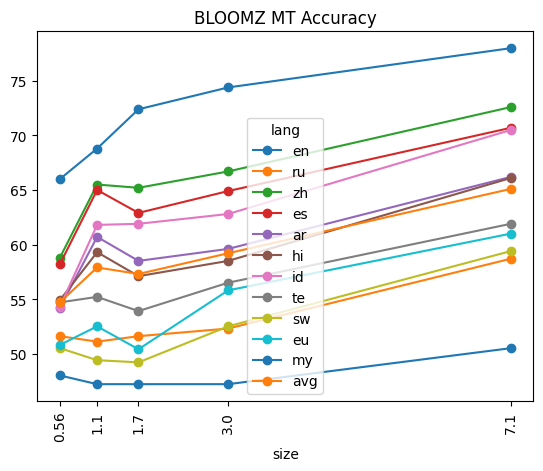

In [467]:
plot_size_df(
    acc_df_bloomz_mt_few_shot[
        ["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]
    ],
    bloomz_model_sizes[:-2],
    bloomz_names[:-2],
    "BLOOMZ MT Accuracy",
)


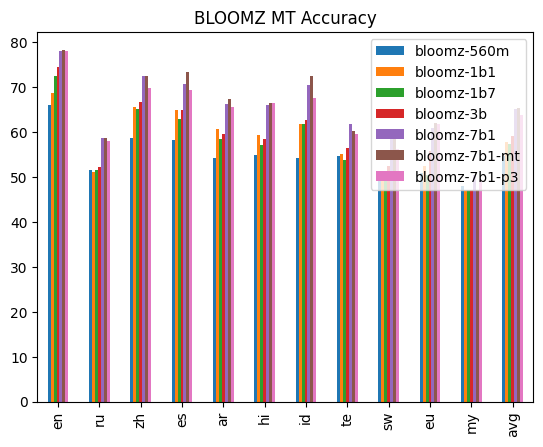

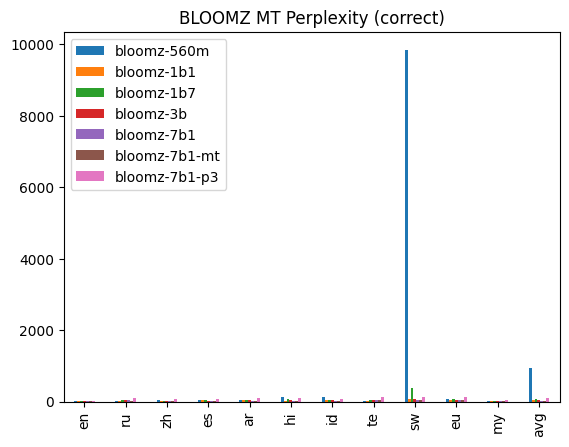

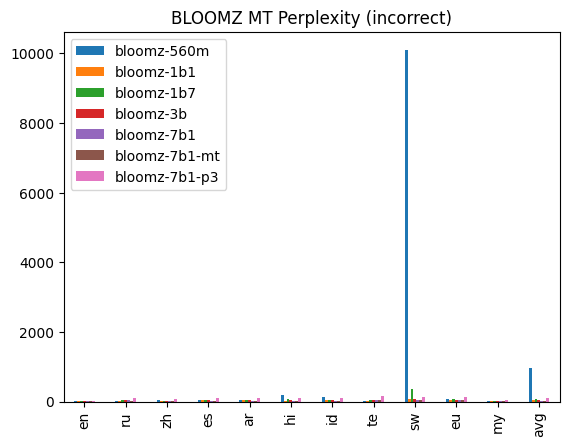

In [468]:
plot_df(acc_df_bloomz_mt_few_shot, "BLOOMZ MT Accuracy")
plot_df(ppl_cor_df_bloomz_mt_few_shot, "BLOOMZ MT Perplexity (correct)")
plot_df(ppl_inc_df_bloomz_mt_few_shot, "BLOOMZ MT Perplexity (incorrect)")

## OPT

In [469]:
opt_model_names = [
    "facebook/opt-125m",
    "facebook/opt-350m",
    "facebook/opt-1.3b",
    "facebook/opt-2.7b",
    "facebook/opt-6.7b",
    "facebook/opt-13b",
]
opt_model_sizes = [0.125, 0.35, 1.3, 2.7, 6.7, 13]
opt_names = [name.split("/")[-1] for name in opt_model_names]
acc_df_opt_mt_few_shot, ppl_cor_df_opt_mt_few_shot, ppl_inc_df_opt_mt_few_shot = get_dfs(
    opt_model_names, "xstory_cloze_mt_few_shot"
)


In [470]:
display(acc_df_opt_mt_few_shot)
display(ppl_cor_df_opt_mt_few_shot)
display(ppl_inc_df_opt_mt_few_shot)


lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en      61.1      64.3      74.0      75.4      78.8     79.4
1    ru      47.3      50.4      49.0      47.1      46.6     50.9
2    zh      45.9      46.9      47.5      48.2      51.1     55.9
3    es      53.5      50.8      59.7      62.4      66.1     67.2
4    ar      46.5      48.6      47.5      47.4      51.6     49.6
5    hi      48.6      46.1      51.2      48.9      47.3     48.4
6    id      49.8      48.4      50.0      48.2      51.2     55.9
7    te      50.6      46.3      49.0      47.2      48.8     49.4
8    sw      47.6      47.5      47.0      50.2      46.1     49.0
9    eu      51.5      48.8      46.7      46.7      47.1     47.2
10   my      47.2      48.6      48.4      47.3      47.7     48.3
11  avg      50.0      49.7      51.8      51.7      52.9     54.7

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     26.45     22.26     16.70     15.57     14.54    14.13
1    ru      2.21      4.03     10.17      3.81     10.64    20.60
2    zh      3.91      7.01      7.91      4.70     14.57    21.54
3    es      9.66     16.16     28.28     24.00     19.67    18.76
4    ar      4.72      3.39      5.03      4.27      4.45     3.96
5    hi      3.74      3.48      5.72      5.23      2.57     2.39
6    id      6.40     23.02     18.82     21.28     22.29    22.35
7    te      4.38      3.33      4.40      3.25      5.76     3.10
8    sw     60.90     36.29     25.59     17.75     17.32    17.80
9    eu    170.00    202.18     31.28     25.58     19.26    20.67
10   my      3.65      4.55      8.86      3.27      2.55     6.03
11  avg     26.91     29.61     14.80     11.70     12.15    13.76

lang  opt-125m  opt-350m  opt-1.3b  opt-2.7b  opt-6.7b  opt-13b
0    en     27.82     23.71     18.50     17.39     16.43    16.07
1    ru      2.21      4.06     10.11      3.80     10.40    20.67
2    zh      3.91      6.88      7.91      4.71     14.60    22.01
3    es      9.98     16.32     29.66     25.30     21.05    20.21
4    ar      4.67      3.39      5.01      4.30      4.46     3.97
5    hi      3.74      3.47      5.82      5.27      2.58     2.40
6    id      6.46     23.29     18.83     21.15     22.39    22.99
7    te      4.40      3.32      4.41      3.25      5.79     3.11
8    sw     59.31     35.87     24.64     17.71     17.11    17.90
9    eu    174.87    200.19     30.63     25.16     18.84    20.42
10   my      3.65      4.63      8.84      3.28      2.54     6.07
11  avg     27.37     29.56     14.94     11.94     12.38    14.17

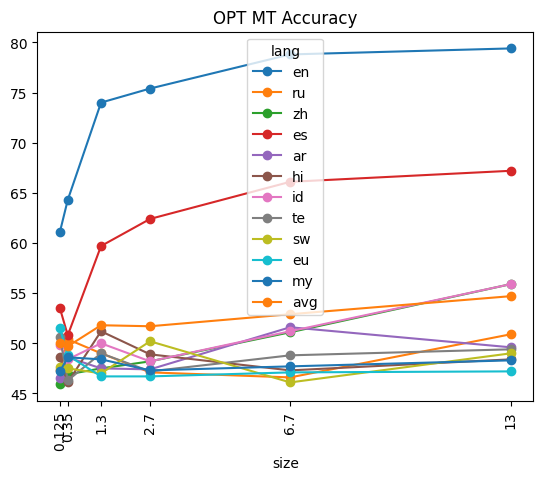

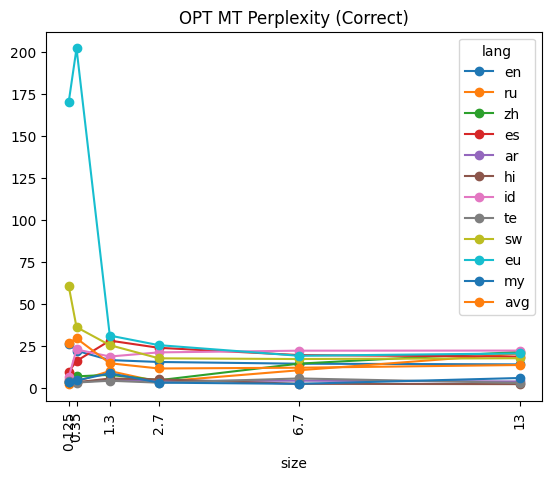

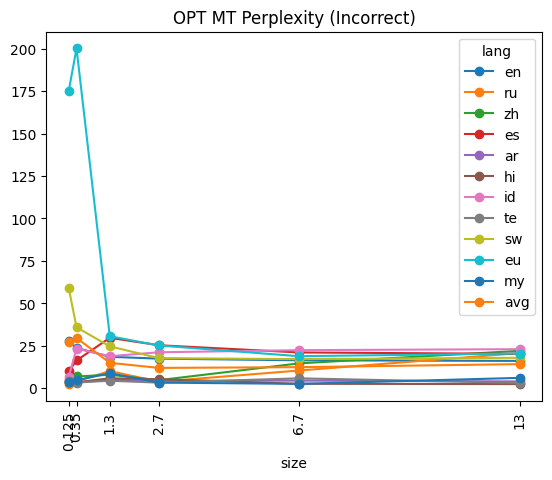

In [471]:
plot_size_df(acc_df_opt_mt_few_shot, opt_model_sizes, opt_names, "OPT MT Accuracy")
plot_size_df(
    ppl_cor_df_opt_mt_few_shot, opt_model_sizes, opt_names, "OPT MT Perplexity (Correct)"
)
plot_size_df(
    ppl_inc_df_opt_mt_few_shot, opt_model_sizes, opt_names, "OPT MT Perplexity (Incorrect)"
)


## LLaMA

In [472]:
llama_model_names = [
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/7B",
    "/gaueko1/hizkuntza-ereduak/LLaMA/lm/huggingface/13B"
]
llama_model_sizes = [7, 13]
llama_names = [name.split("/")[-1] for name in llama_model_names]
acc_df_llama_mt_few_shot, ppl_cor_df_llama_mt_few_shot, ppl_inc_df_llama_mt_few_shot = get_dfs(
    llama_model_names, "xstory_cloze_mt_few_shot"
)


In [473]:
display(acc_df_llama_mt_few_shot)
display(ppl_cor_df_llama_mt_few_shot)
display(ppl_inc_df_llama_mt_few_shot)


lang    7B   13B
0    en  81.3  83.5
1    ru  73.5  76.6
2    zh  66.9  69.0
3    es  73.9  76.4
4    ar  55.3  57.0
5    hi  55.0  59.5
6    id  58.8  63.0
7    te  52.5  49.4
8    sw  50.7  49.4
9    eu  52.4  49.8
10   my  50.2  48.6
11  avg  61.0  62.0

lang     7B    13B
0    en  10.21   9.82
1    ru  11.64  10.81
2    zh  12.66  11.84
3    es  11.70  11.15
4    ar  16.79  17.56
5    hi  15.37  15.91
6    id  15.61  14.81
7    te  10.79  12.44
8    sw  12.79  17.58
9    eu  12.13  18.77
10   my   7.53   8.30
11  avg  12.47  13.54

lang     7B    13B
0    en  11.48  11.17
1    ru  12.75  11.99
2    zh  13.60  12.83
3    es  12.84  12.37
4    ar  17.14  18.07
5    hi  15.70  16.50
6    id  16.15  15.62
7    te  10.95  12.35
8    sw  12.75  17.42
9    eu  12.22  18.72
10   my   7.57   8.25
11  avg  13.01  14.12

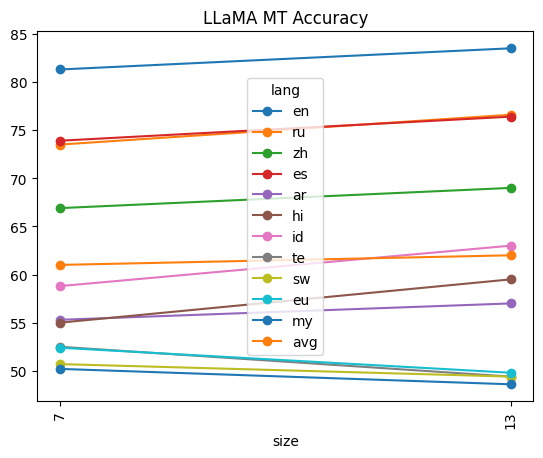

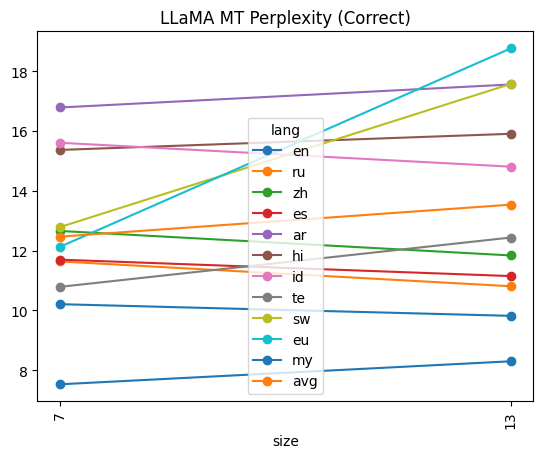

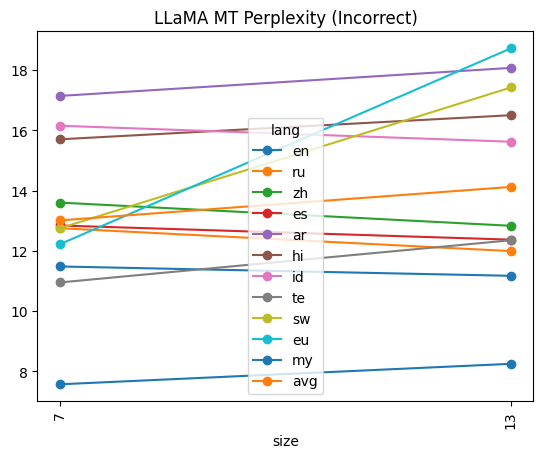

In [474]:
plot_size_df(acc_df_llama_mt_few_shot, llama_model_sizes, llama_names, "LLaMA MT Accuracy")
plot_size_df(ppl_cor_df_llama_mt_few_shot, llama_model_sizes, llama_names, "LLaMA MT Perplexity (Correct)")
plot_size_df(ppl_inc_df_llama_mt_few_shot, llama_model_sizes, llama_names, "LLaMA MT Perplexity (Incorrect)")


## Summary EU MT

In [475]:
# summarize the eu language results for all models
model_sizes = (
    xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    xglm_names + bloom_names + bloomz_names + opt_names + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[15] = "bloomz-mt"
models[16] = "bloomz-p3"
models[23] = "llama"
models[24] = "llama"

acc_dfs = [
    acc_df_xglm_mt_few_shot,
    acc_df_bloom_mt_few_shot,
    acc_df_bloomz_mt_few_shot,
    acc_df_opt_mt_few_shot,
    acc_df_llama_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_xglm_mt_few_shot,
    ppl_cor_df_bloom_mt_few_shot,
    ppl_cor_df_bloomz_mt_few_shot,
    ppl_cor_df_opt_mt_few_shot,
    ppl_cor_df_llama_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_xglm_mt_few_shot,
    ppl_inc_df_bloom_mt_few_shot,
    ppl_inc_df_bloomz_mt_few_shot,
    ppl_inc_df_opt_mt_few_shot,
    ppl_inc_df_llama_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_mt_few_shot_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [476]:
results_eu_mt_few_shot_df

model_name      model    size   acc  ppl_cor  ppl_inc
0       xglm-564M       xglm   0.560  51.9    49.71    49.88
1       xglm-1.7B       xglm   1.700  56.3    26.55    27.34
2       xglm-2.9B       xglm   2.900  61.0    22.15    23.24
3       xglm-4.5B       xglm   4.500  49.4    16.93    16.91
4       xglm-7.5B       xglm   7.500  64.0    19.00    20.11
5      bloom-560m      bloom   0.560  51.2   116.22   117.35
6       bloom-1b1      bloom   1.100  54.3    41.80    43.05
7       bloom-1b7      bloom   1.700  55.5    46.21    47.69
8        bloom-3b      bloom   3.000  59.2    36.97    38.91
9       bloom-7b1      bloom   7.100  64.7    28.10    30.39
10    bloomz-560m     bloomz   0.560  50.8    58.23    58.74
11     bloomz-1b1     bloomz   1.100  52.5    46.38    46.96
12     bloomz-1b7     bloomz   1.700  50.4    71.11    70.01
13      bloomz-3b     bloomz   3.000  55.8    50.24    52.27
14     bloomz-7b1     bloomz   7.100  61.0    30.08    32.05
15  bloomz-7b1-mt  bloomz-mt   7.100  62.0    32.51    34.63
16  bloomz-7b1-p3  bloomz-p3   7.100  61.8   131.12   142.72
17       opt-125m        opt   0.125  51.5   170.00   174.87
18       opt-350m        opt   0.350  48.8   202.18   200.19
19       opt-1.3b        opt   1.300  46.7    31.28    30.63
20       opt-2.7b        opt   2.700  46.7    25.58    25.16
21       opt-6.7b        opt   6.700  47.1    19.26    18.84
22        opt-13b        opt  13.000  47.2    20.67    20.42
23             7B      llama   7.000  52.4    12.13    12.22
24            13B      llama  13.000  49.8    18.77    18.72

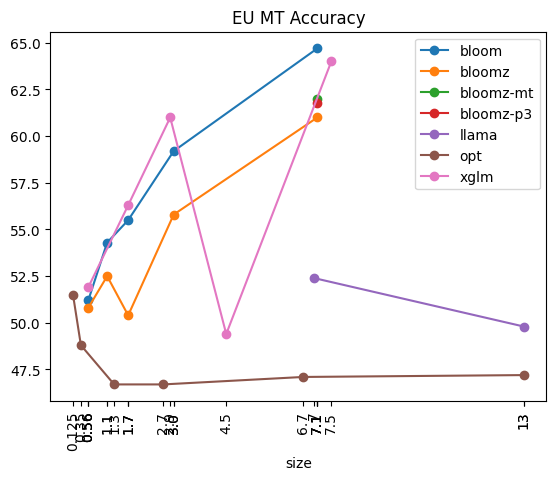

In [477]:
results_eu_mt_few_shot_df.set_index("size", inplace=True)
results_eu_mt_few_shot_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU MT Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


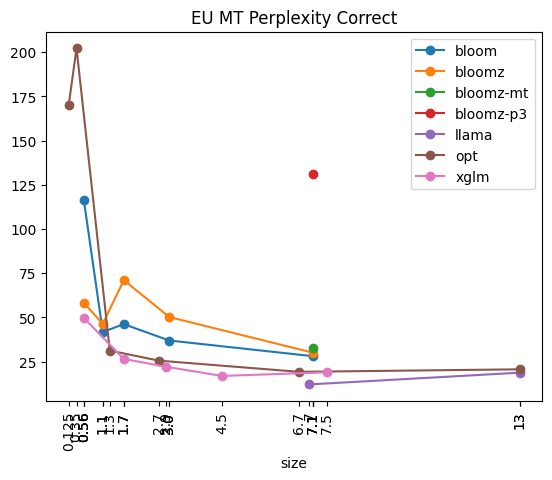

In [478]:
results_eu_mt_few_shot_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="EU MT Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


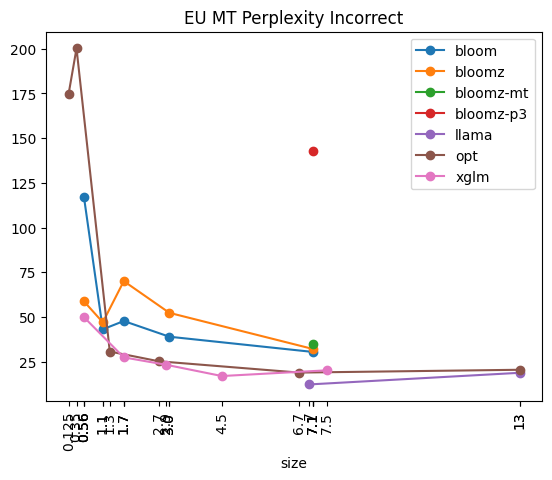

In [479]:
results_eu_mt_few_shot_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="EU MT Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


## Summary ES MT

In [480]:
# summarize the eu language results for all models
model_sizes = (
    xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    xglm_names + bloom_names + bloomz_names + opt_names + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[15] = "bloomz-mt"
models[16] = "bloomz-p3"
models[23] = "llama"
models[24] = "llama"

acc_dfs = [
    acc_df_xglm_mt_few_shot,
    acc_df_bloom_mt_few_shot,
    acc_df_bloomz_mt_few_shot,
    acc_df_opt_mt_few_shot,
    acc_df_llama_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_xglm_mt_few_shot,
    ppl_cor_df_bloom_mt_few_shot,
    ppl_cor_df_bloomz_mt_few_shot,
    ppl_cor_df_opt_mt_few_shot,
    ppl_cor_df_llama_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_xglm_mt_few_shot,
    ppl_inc_df_bloom_mt_few_shot,
    ppl_inc_df_bloomz_mt_few_shot,
    ppl_inc_df_opt_mt_few_shot,
    ppl_inc_df_llama_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])

results_eu_mt_few_shot_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [481]:
results_eu_mt_few_shot_df

model_name      model    size   acc  ppl_cor  ppl_inc
0       xglm-564M       xglm   0.560  55.1    51.74    52.85
1       xglm-1.7B       xglm   1.700  60.4    24.59    25.74
2       xglm-2.9B       xglm   2.900  64.9    19.20    20.47
3       xglm-4.5B       xglm   4.500  68.1    18.24    19.62
4       xglm-7.5B       xglm   7.500  69.2    16.65    18.00
5      bloom-560m      bloom   0.560  59.6    57.83    60.25
6       bloom-1b1      bloom   1.100  63.3    37.07    39.71
7       bloom-1b7      bloom   1.700  65.7    32.63    35.19
8        bloom-3b      bloom   3.000  68.5    25.58    27.80
9       bloom-7b1      bloom   7.100  71.4    20.98    23.09
10    bloomz-560m     bloomz   0.560  58.2    44.27    46.46
11     bloomz-1b1     bloomz   1.100  65.0    29.64    31.85
12     bloomz-1b7     bloomz   1.700  62.9    32.67    34.98
13      bloomz-3b     bloomz   3.000  64.9    28.04    30.11
14     bloomz-7b1     bloomz   7.100  70.7    22.57    24.89
15  bloomz-7b1-mt  bloomz-mt   7.100  73.5    20.16    22.41
16  bloomz-7b1-p3  bloomz-p3   7.100  69.4    82.24    93.41
17       opt-125m        opt   0.125  53.5     9.66     9.98
18       opt-350m        opt   0.350  50.8    16.16    16.32
19       opt-1.3b        opt   1.300  59.7    28.28    29.66
20       opt-2.7b        opt   2.700  62.4    24.00    25.30
21       opt-6.7b        opt   6.700  66.1    19.67    21.05
22        opt-13b        opt  13.000  67.2    18.76    20.21
23             7B      llama   7.000  73.9    11.70    12.84
24            13B      llama  13.000  76.4    11.15    12.37

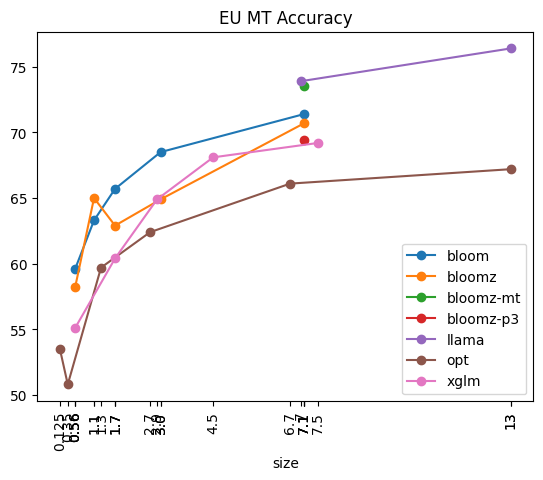

In [482]:
results_eu_mt_few_shot_df.set_index("size", inplace=True)
results_eu_mt_few_shot_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU MT Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


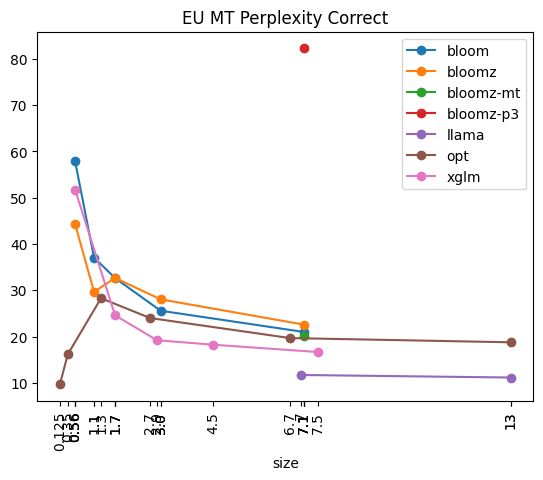

In [483]:
results_eu_mt_few_shot_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="EU MT Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


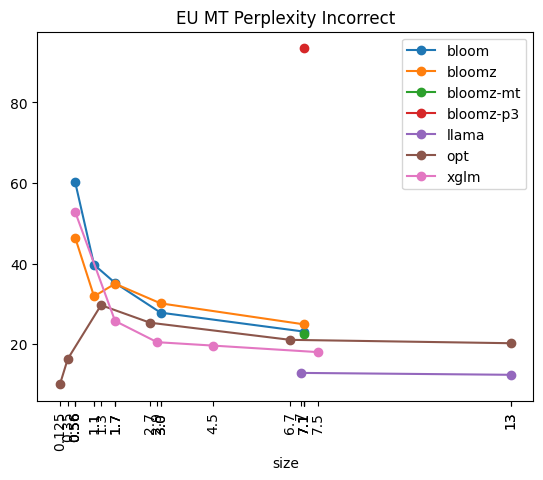

In [484]:
results_eu_mt_few_shot_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="EU MT Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


## Summary AVG MT

In [485]:
# summarize the eu language results for all models
model_sizes = (
    xglm_model_sizes
    + bloom_model_sizes
    + bloomz_model_sizes
    + opt_model_sizes
    + llama_model_sizes
)

model_names = (
    xglm_names + bloom_names + bloomz_names + opt_names + llama_names
)

models = [name.split("-")[0] for name in model_names]
models[15] = "bloomz-mt"
models[16] = "bloomz-p3"
models[23] = "llama"
models[24] = "llama"

acc_dfs = [
    acc_df_xglm_mt_few_shot,
    acc_df_bloom_mt_few_shot,
    acc_df_bloomz_mt_few_shot,
    acc_df_opt_mt_few_shot,
    acc_df_llama_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_xglm_mt_few_shot,
    ppl_cor_df_bloom_mt_few_shot,
    ppl_cor_df_bloomz_mt_few_shot,
    ppl_cor_df_opt_mt_few_shot,
    ppl_cor_df_llama_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_xglm_mt_few_shot,
    ppl_inc_df_bloom_mt_few_shot,
    ppl_inc_df_bloomz_mt_few_shot,
    ppl_inc_df_opt_mt_few_shot,
    ppl_inc_df_llama_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_mt_few_shot_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [486]:
results_avg_mt_few_shot_df

model_name      model    size   acc  ppl_cor  ppl_inc
0       xglm-564M       xglm   0.560  53.5    39.51    40.05
1       xglm-1.7B       xglm   1.700  59.1    26.37    27.46
2       xglm-2.9B       xglm   2.900  62.4    22.35    23.56
3       xglm-4.5B       xglm   4.500  60.9    21.70    22.77
4       xglm-7.5B       xglm   7.500  65.1    19.88    21.14
5      bloom-560m      bloom   0.560  54.8    76.64    77.30
6       bloom-1b1      bloom   1.100  57.2    31.84    33.13
7       bloom-1b7      bloom   1.700  59.1    33.57    35.15
8        bloom-3b      bloom   3.000  61.6    28.12    29.77
9       bloom-7b1      bloom   7.100  64.5    23.19    24.89
10    bloomz-560m     bloomz   0.560  54.7   943.34   970.33
11     bloomz-1b1     bloomz   1.100  57.9    30.42    31.52
12     bloomz-1b7     bloomz   1.700  57.3    67.97    67.75
13      bloomz-3b     bloomz   3.000  59.2    34.24    35.68
14     bloomz-7b1     bloomz   7.100  65.1    23.30    25.03
15  bloomz-7b1-mt  bloomz-mt   7.100  65.4    22.80    24.57
16  bloomz-7b1-p3  bloomz-p3   7.100  63.8    87.27    95.38
17       opt-125m        opt   0.125  50.0    26.91    27.37
18       opt-350m        opt   0.350  49.7    29.61    29.56
19       opt-1.3b        opt   1.300  51.8    14.80    14.94
20       opt-2.7b        opt   2.700  51.7    11.70    11.94
21       opt-6.7b        opt   6.700  52.9    12.15    12.38
22        opt-13b        opt  13.000  54.7    13.76    14.17
23             7B      llama   7.000  61.0    12.47    13.01
24            13B      llama  13.000  62.0    13.54    14.12

In [487]:
results_avg_mt_few_shot_df.set_index("size", inplace=True)

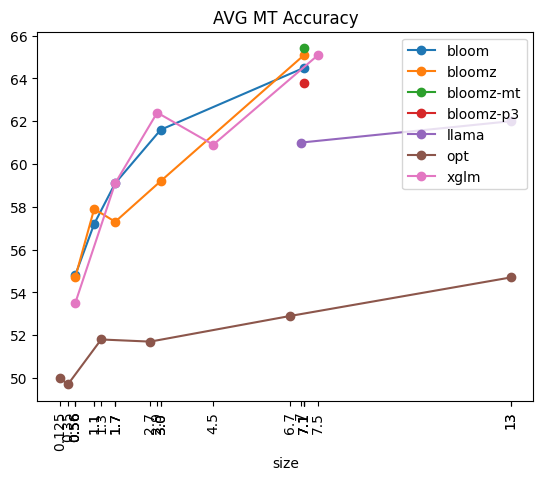

In [488]:
results_avg_mt_few_shot_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG MT Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");


(0.0, 100.0)

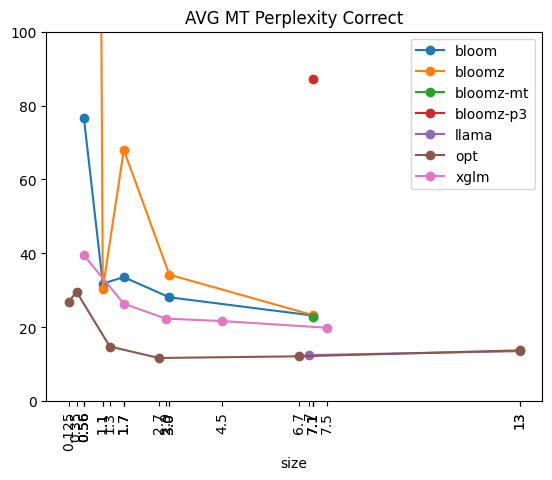

In [489]:
results_avg_mt_few_shot_df.groupby("model")["ppl_cor"].plot(
    x="size", y="ppl_cor", title="AVG MT Perplexity Correct", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


(0.0, 100.0)

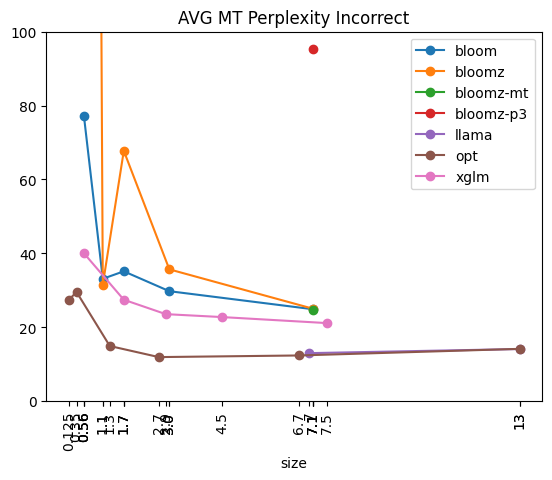

In [490]:
results_avg_mt_few_shot_df.groupby("model")["ppl_inc"].plot(
    x="size", y="ppl_inc", title="AVG MT Perplexity Incorrect", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");
plt.ylim(0, 100)


# XStoryCloze Evaluation Comparison

## XGLM EU

In [491]:
# summarize the eu language results for XGLM models
model_sizes = (
    xglm_model_sizes
    + xglm_model_sizes
    + xglm_model_sizes
)

model_names = (
    xglm_names + xglm_names + xglm_names
)

models = ["xglm"]*5 + ["xglm-mt-nllb"]*5 + ["xglm-mt-few-shot"]*5

acc_dfs = [
    acc_df_xglm,
    acc_df_xglm_mt,
    acc_df_xglm_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_xglm,
    ppl_cor_df_xglm_mt,
    ppl_cor_df_xglm_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_xglm,
    ppl_inc_df_xglm_mt,
    ppl_cor_df_xglm_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_xglm_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [492]:
results_eu_xglm_df

model_name             model  size   acc  ppl_cor  ppl_inc
0   xglm-564M              xglm  0.56  55.1    34.55    35.48
1   xglm-1.7B              xglm  1.70  57.5    23.12    23.84
2   xglm-2.9B              xglm  2.90  58.4    20.18    20.93
3   xglm-4.5B              xglm  4.50  55.3   104.26   107.33
4   xglm-7.5B              xglm  7.50  61.7    18.94    19.77
5   xglm-564M      xglm-mt-nllb  0.56  60.8    20.39    21.29
6   xglm-1.7B      xglm-mt-nllb  1.70  64.3    17.80    18.84
7   xglm-2.9B      xglm-mt-nllb  2.90  66.2    16.94    18.07
8   xglm-4.5B      xglm-mt-nllb  4.50  66.0    16.39    17.54
9   xglm-7.5B      xglm-mt-nllb  7.50  66.6    16.25    17.43
10  xglm-564M  xglm-mt-few-shot  0.56  51.9    49.71    49.71
11  xglm-1.7B  xglm-mt-few-shot  1.70  56.3    26.55    26.55
12  xglm-2.9B  xglm-mt-few-shot  2.90  61.0    22.15    22.15
13  xglm-4.5B  xglm-mt-few-shot  4.50  49.4    16.93    16.93
14  xglm-7.5B  xglm-mt-few-shot  7.50  64.0    19.00    19.00

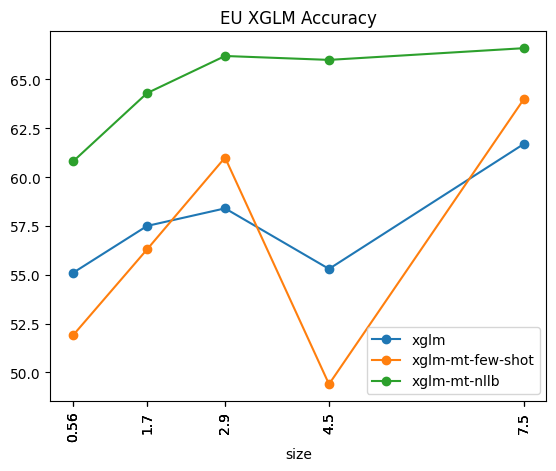

In [493]:
results_eu_xglm_df.set_index("size", inplace=True)
results_eu_xglm_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU XGLM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## XGLM ES

In [494]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])

results_es_xglm_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)

In [495]:
results_es_xglm_df

model_name             model  size   acc  ppl_cor  ppl_inc
0   xglm-564M              xglm  0.56  56.5    24.74    25.50
1   xglm-1.7B              xglm  1.70  60.6    18.75    19.58
2   xglm-2.9B              xglm  2.90  64.6    16.70    17.64
3   xglm-4.5B              xglm  4.50  66.4    15.69    16.65
4   xglm-7.5B              xglm  7.50  66.7    15.10    16.10
5   xglm-564M      xglm-mt-nllb  0.56  62.3    20.43    21.34
6   xglm-1.7B      xglm-mt-nllb  1.70  64.7    17.23    18.29
7   xglm-2.9B      xglm-mt-nllb  2.90  68.5    16.11    17.29
8   xglm-4.5B      xglm-mt-nllb  4.50  68.6    15.47    16.64
9   xglm-7.5B      xglm-mt-nllb  7.50  69.8    15.25    16.47
10  xglm-564M  xglm-mt-few-shot  0.56  55.1    51.74    51.74
11  xglm-1.7B  xglm-mt-few-shot  1.70  60.4    24.59    24.59
12  xglm-2.9B  xglm-mt-few-shot  2.90  64.9    19.20    19.20
13  xglm-4.5B  xglm-mt-few-shot  4.50  68.1    18.24    18.24
14  xglm-7.5B  xglm-mt-few-shot  7.50  69.2    16.65    16.65

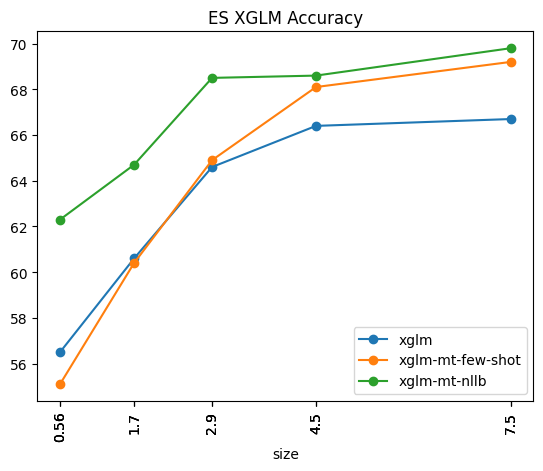

In [496]:
results_es_xglm_df.set_index("size", inplace=True)
results_es_xglm_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ES XGLM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## XGLM AVG

In [497]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_xglm_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)

In [498]:
results_avg_xglm_df

model_name             model  size   acc  ppl_cor  ppl_inc
0   xglm-564M              xglm  0.56  56.5    31.07    31.92
1   xglm-1.7B              xglm  1.70  59.7    23.35    24.27
2   xglm-2.9B              xglm  2.90  62.2    20.34    21.35
3   xglm-4.5B              xglm  4.50  61.8    31.91    33.22
4   xglm-7.5B              xglm  7.50  64.3    18.62    19.68
5   xglm-564M      xglm-mt-nllb  0.56  60.3    21.26    22.18
6   xglm-1.7B      xglm-mt-nllb  1.70  63.7    18.32    19.39
7   xglm-2.9B      xglm-mt-nllb  2.90  65.9    17.22    18.40
8   xglm-4.5B      xglm-mt-nllb  4.50  66.6    16.63    17.83
9   xglm-7.5B      xglm-mt-nllb  7.50  67.5    16.44    17.67
10  xglm-564M  xglm-mt-few-shot  0.56  53.5    39.51    39.51
11  xglm-1.7B  xglm-mt-few-shot  1.70  59.1    26.37    26.37
12  xglm-2.9B  xglm-mt-few-shot  2.90  62.4    22.35    22.35
13  xglm-4.5B  xglm-mt-few-shot  4.50  60.9    21.70    21.70
14  xglm-7.5B  xglm-mt-few-shot  7.50  65.1    19.88    19.88

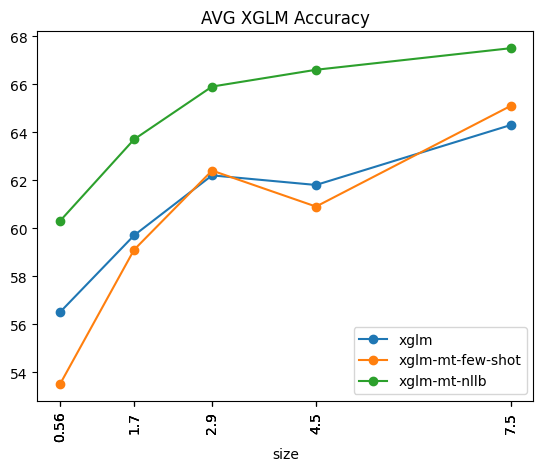

In [499]:
results_avg_xglm_df.set_index("size", inplace=True)
results_avg_xglm_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG XGLM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOM EU

In [500]:
# summarize the eu language results for XGLM models
model_sizes = (
    bloom_model_sizes
    + bloom_model_sizes
    + bloom_model_sizes
)

model_names = (
    bloom_names + bloom_names + bloom_names
)

models = ["bloom"]*5 + ["bloom-mt-nllb"]*5 + ["bloom-mt-few-shot"]*5

acc_dfs = [
    acc_df_bloom,
    acc_df_bloom_mt,
    acc_df_bloom_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_bloom,
    ppl_cor_df_bloom_mt,
    ppl_cor_df_bloom_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_bloom,
    ppl_inc_df_bloom_mt,
    ppl_cor_df_bloom_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_bloom_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [501]:
results_eu_bloom_df

model_name              model  size   acc  ppl_cor  ppl_inc
0   bloom-560m              bloom  0.56  53.8   116.24   118.98
1    bloom-1b1              bloom  1.10  53.8    88.00    90.22
2    bloom-1b7              bloom  1.70  55.7    60.89    62.87
3     bloom-3b              bloom  3.00  57.2    50.50    52.24
4    bloom-7b1              bloom  7.10  59.0    41.14    43.03
5   bloom-560m      bloom-mt-nllb  0.56  62.7    23.53    24.94
6    bloom-1b1      bloom-mt-nllb  1.10  65.0    20.72    22.09
7    bloom-1b7      bloom-mt-nllb  1.70  66.8    19.32    20.74
8     bloom-3b      bloom-mt-nllb  3.00  68.7    17.96    19.40
9    bloom-7b1      bloom-mt-nllb  7.10  69.5    16.94    18.43
10  bloom-560m  bloom-mt-few-shot  0.56  51.2   116.22   116.22
11   bloom-1b1  bloom-mt-few-shot  1.10  54.3    41.80    41.80
12   bloom-1b7  bloom-mt-few-shot  1.70  55.5    46.21    46.21
13    bloom-3b  bloom-mt-few-shot  3.00  59.2    36.97    36.97
14   bloom-7b1  bloom-mt-few-shot  7.10  64.7    28.10    28.10

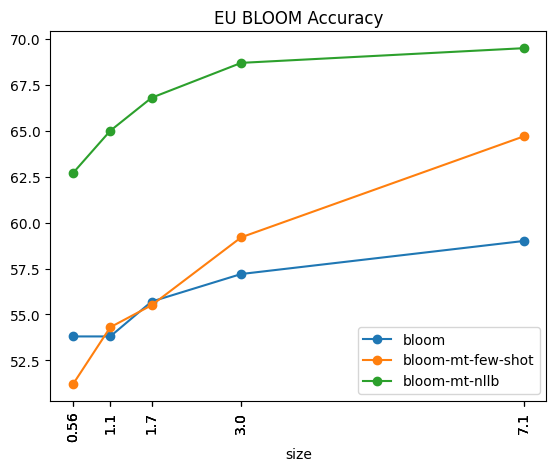

In [502]:
results_eu_bloom_df.set_index("size", inplace=True)
results_eu_bloom_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU BLOOM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOM ES

In [503]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])

results_es_bloom_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [504]:
results_es_bloom_df

model_name              model  size   acc  ppl_cor  ppl_inc
0   bloom-560m              bloom  0.56  58.7    23.78    24.75
1    bloom-1b1              bloom  1.10  61.3    20.01    20.99
2    bloom-1b7              bloom  1.70  64.3    17.83    18.92
3     bloom-3b              bloom  3.00  67.0    16.09    17.24
4    bloom-7b1              bloom  7.10  70.1    14.66    15.88
5   bloom-560m      bloom-mt-nllb  0.56  64.7    23.79    25.25
6    bloom-1b1      bloom-mt-nllb  1.10  65.9    20.43    21.84
7    bloom-1b7      bloom-mt-nllb  1.70  69.3    18.81    20.28
8     bloom-3b      bloom-mt-nllb  3.00  70.4    17.17    18.63
9    bloom-7b1      bloom-mt-nllb  7.10  72.0    15.86    17.40
10  bloom-560m  bloom-mt-few-shot  0.56  59.6    57.83    57.83
11   bloom-1b1  bloom-mt-few-shot  1.10  63.3    37.07    37.07
12   bloom-1b7  bloom-mt-few-shot  1.70  65.7    32.63    32.63
13    bloom-3b  bloom-mt-few-shot  3.00  68.5    25.58    25.58
14   bloom-7b1  bloom-mt-few-shot  7.10  71.4    20.98    20.98

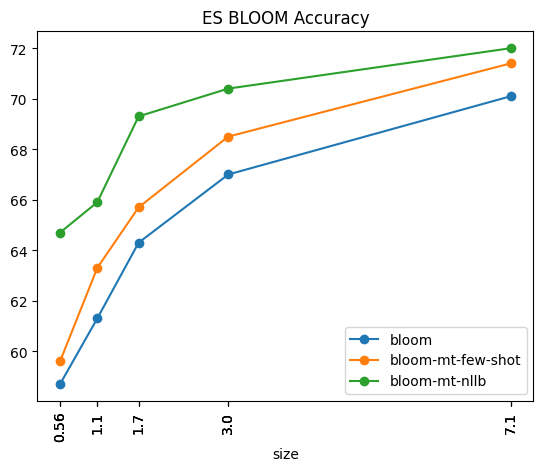

In [505]:
results_es_bloom_df.set_index("size", inplace=True)
results_es_bloom_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ES BLOOM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOM AVG

In [506]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_bloom_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [507]:
results_es_bloom_df

model_name              model   acc  ppl_cor  ppl_inc
size                                                       
0.56  bloom-560m              bloom  58.7    23.78    24.75
1.10   bloom-1b1              bloom  61.3    20.01    20.99
1.70   bloom-1b7              bloom  64.3    17.83    18.92
3.00    bloom-3b              bloom  67.0    16.09    17.24
7.10   bloom-7b1              bloom  70.1    14.66    15.88
0.56  bloom-560m      bloom-mt-nllb  64.7    23.79    25.25
1.10   bloom-1b1      bloom-mt-nllb  65.9    20.43    21.84
1.70   bloom-1b7      bloom-mt-nllb  69.3    18.81    20.28
3.00    bloom-3b      bloom-mt-nllb  70.4    17.17    18.63
7.10   bloom-7b1      bloom-mt-nllb  72.0    15.86    17.40
0.56  bloom-560m  bloom-mt-few-shot  59.6    57.83    57.83
1.10   bloom-1b1  bloom-mt-few-shot  63.3    37.07    37.07
1.70   bloom-1b7  bloom-mt-few-shot  65.7    32.63    32.63
3.00    bloom-3b  bloom-mt-few-shot  68.5    25.58    25.58
7.10   bloom-7b1  bloom-mt-few-shot  71.4    20.98    20.98

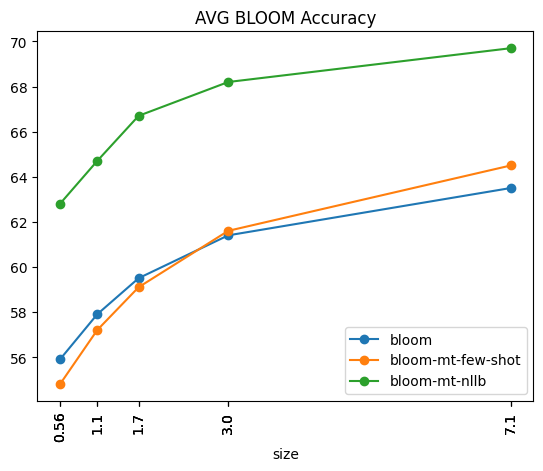

In [508]:
results_avg_bloom_df.set_index("size", inplace=True)
results_avg_bloom_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG BLOOM Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOMZ EU

In [519]:
# summarize the eu language results for XGLM models
model_sizes = (
    bloomz_model_sizes[:-2]
    + bloomz_model_sizes[:-2]
    + bloomz_model_sizes[:-2]
)

model_names = (
    bloomz_names[:-2] + bloomz_names[:-2] + bloomz_names[:-2]
)

models = ["bloomz"]*5 + ["bloomz-mt-nllb"]*5 + ["bloomz-mt-few-shot"]*5

acc_dfs = [
    acc_df_bloomz[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    acc_df_bloomz_mt[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    acc_df_bloomz_mt_few_shot[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
]
ppl_cor_dfs = [
    ppl_cor_df_bloomz[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    ppl_cor_df_bloomz_mt[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    ppl_cor_df_bloomz_mt_few_shot[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
]
ppl_inc_dfs = [
    ppl_inc_df_bloomz[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    ppl_inc_df_bloomz_mt[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
    ppl_cor_df_bloomz_mt_few_shot[["lang", "bloomz-560m", "bloomz-1b1", "bloomz-1b7", "bloomz-3b", "bloomz-7b1"]],
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_bloomz_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [516]:
results_eu_bloomz_df

model_name               model  size   acc   ppl_cor   ppl_inc
0   bloomz-560m              bloomz  0.56  47.1   6841.67   6689.80
1    bloomz-1b1              bloomz  1.10  52.0    288.67    293.84
2    bloomz-1b7              bloomz  1.70  47.2  28747.34  28074.24
3     bloomz-3b              bloomz  3.00  45.9  22186.82  21626.92
4    bloomz-7b1              bloomz  7.10  52.9   4138.25   4213.08
5   bloomz-560m      bloomz-mt-nllb  0.56  63.9     23.98     25.55
6    bloomz-1b1      bloomz-mt-nllb  1.10  66.7     20.30     21.76
7    bloomz-1b7      bloomz-mt-nllb  1.70  68.0     19.87     21.52
8     bloomz-3b      bloomz-mt-nllb  3.00  70.0     18.94     20.64
9    bloomz-7b1      bloomz-mt-nllb  7.10  71.7     17.78     19.62
10  bloomz-560m  bloomz-mt-few-shot  0.56  50.8     58.23     58.23
11   bloomz-1b1  bloomz-mt-few-shot  1.10  52.5     46.38     46.38
12   bloomz-1b7  bloomz-mt-few-shot  1.70  50.4     71.11     71.11
13    bloomz-3b  bloomz-mt-few-shot  3.00  55.8     50.24     50.24
14   bloomz-7b1  bloomz-mt-few-shot  7.10  61.0     30.08     30.08

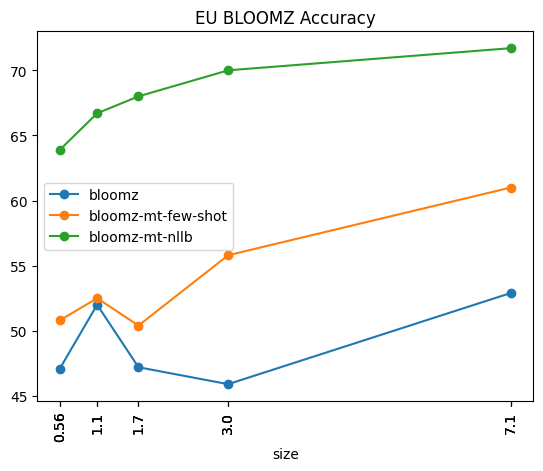

In [520]:
results_eu_bloomz_df.set_index("size", inplace=True)
results_eu_bloomz_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU BLOOMZ Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOMZ ES

In [521]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])

results_es_bloomz_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [522]:
results_es_bloomz_df

model_name               model  size   acc  ppl_cor  ppl_inc
0   bloomz-560m              bloomz  0.56  60.0    30.23    31.57
1    bloomz-1b1              bloomz  1.10  62.3    19.97    21.09
2    bloomz-1b7              bloomz  1.70  60.4    68.04    72.31
3     bloomz-3b              bloomz  3.00  58.3   111.60   117.73
4    bloomz-7b1              bloomz  7.10  68.0    33.56    36.59
5   bloomz-560m      bloomz-mt-nllb  0.56  65.1    23.73    25.36
6    bloomz-1b1      bloomz-mt-nllb  1.10  67.6    19.73    21.25
7    bloomz-1b7      bloomz-mt-nllb  1.70  70.5    19.02    20.73
8     bloomz-3b      bloomz-mt-nllb  3.00  72.7    17.77    19.53
9    bloomz-7b1      bloomz-mt-nllb  7.10  76.0    16.43    18.32
10  bloomz-560m  bloomz-mt-few-shot  0.56  58.2    44.27    44.27
11   bloomz-1b1  bloomz-mt-few-shot  1.10  65.0    29.64    29.64
12   bloomz-1b7  bloomz-mt-few-shot  1.70  62.9    32.67    32.67
13    bloomz-3b  bloomz-mt-few-shot  3.00  64.9    28.04    28.04
14   bloomz-7b1  bloomz-mt-few-shot  7.10  70.7    22.57    22.57

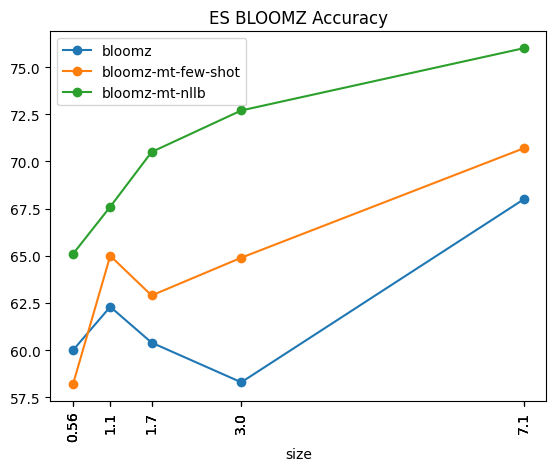

In [523]:
results_es_bloomz_df.set_index("size", inplace=True)
results_es_bloomz_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ES BLOOMZ Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## BLOOMZ AVG

In [524]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_bloomz_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [525]:
results_avg_bloomz_df

model_name               model  size   acc     ppl_cor     ppl_inc
0   bloomz-560m              bloomz  0.56  55.3  2488544.50  2097428.38
1    bloomz-1b1              bloomz  1.10  58.3       90.13       92.71
2    bloomz-1b7              bloomz  1.70  56.9     6208.61     6256.51
3     bloomz-3b              bloomz  3.00  57.0     5675.11     5734.68
4    bloomz-7b1              bloomz  7.10  60.8     1211.92     1267.95
5   bloomz-560m      bloomz-mt-nllb  0.56  64.0       24.54       26.14
6    bloomz-1b1      bloomz-mt-nllb  1.10  66.3       20.61       22.12
7    bloomz-1b7      bloomz-mt-nllb  1.70  68.3       20.03       21.73
8     bloomz-3b      bloomz-mt-nllb  3.00  69.7       18.89       20.63
9    bloomz-7b1      bloomz-mt-nllb  7.10  71.9       17.61       19.47
10  bloomz-560m  bloomz-mt-few-shot  0.56  54.7      943.34      943.34
11   bloomz-1b1  bloomz-mt-few-shot  1.10  57.9       30.42       30.42
12   bloomz-1b7  bloomz-mt-few-shot  1.70  57.3       67.97       67.97
13    bloomz-3b  bloomz-mt-few-shot  3.00  59.2       34.24       34.24
14   bloomz-7b1  bloomz-mt-few-shot  7.10  65.1       23.30       23.30

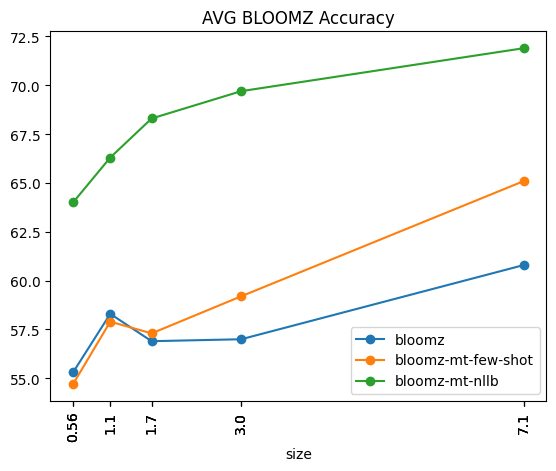

In [526]:
results_avg_bloomz_df.set_index("size", inplace=True)
results_avg_bloomz_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="AVG BLOOMZ Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## LLaMA EU

In [528]:
# summarize the eu language results for XGLM models
model_sizes = (
    llama_model_sizes
    + llama_model_sizes
    + llama_model_sizes
)

model_names = (
    llama_names + llama_names + llama_names
)

models = ["llama"]*2 + ["llama-mt-nllb"]*2 + ["llama-mt-few-shot"]*2

acc_dfs = [
    acc_df_llama,
    acc_df_llama_mt,
    acc_df_llama_mt_few_shot,
]
ppl_cor_dfs = [
    ppl_cor_df_llama,
    ppl_cor_df_llama_mt,
    ppl_cor_df_llama_mt_few_shot,
]
ppl_inc_dfs = [
    ppl_inc_df_llama,
    ppl_inc_df_llama_mt,
    ppl_cor_df_llama_mt_few_shot,
]

acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "eu"].values[0][1:])

results_eu_llama_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [529]:
results_eu_llama_df

model_name              model  size   acc  ppl_cor  ppl_inc
0         7B              llama     7  52.7    85.42    86.61
1        13B              llama    13  54.2    67.63    68.59
2         7B      llama-mt-nllb     7  68.4    12.60    13.63
3        13B      llama-mt-nllb    13  69.6    12.41    13.49
4         7B  llama-mt-few-shot     7  52.4    12.13    12.13
5        13B  llama-mt-few-shot    13  49.8    18.77    18.77

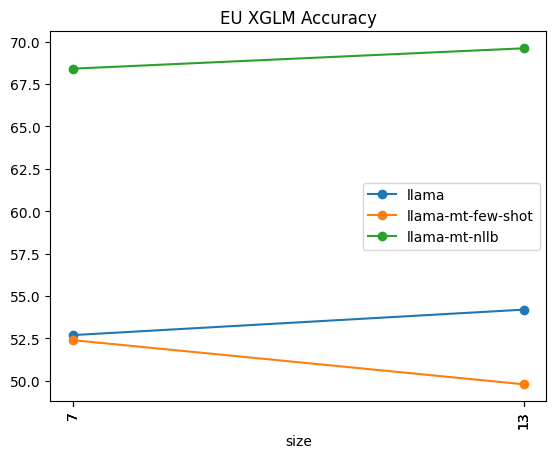

In [530]:
results_eu_llama_df.set_index("size", inplace=True)
results_eu_llama_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="EU LLaMA Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## LLaMA ES

In [533]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "es"].values[0][1:])

results_es_llama_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [534]:
results_es_llama_df

model_name              model  size   acc  ppl_cor  ppl_inc
0         7B              llama     7  70.2     9.63    10.29
1        13B              llama    13  73.9     8.73     9.45
2         7B      llama-mt-nllb     7  75.8    11.45    12.56
3        13B      llama-mt-nllb    13  75.6    11.17    12.34
4         7B  llama-mt-few-shot     7  73.9    11.70    11.70
5        13B  llama-mt-few-shot    13  76.4    11.15    11.15

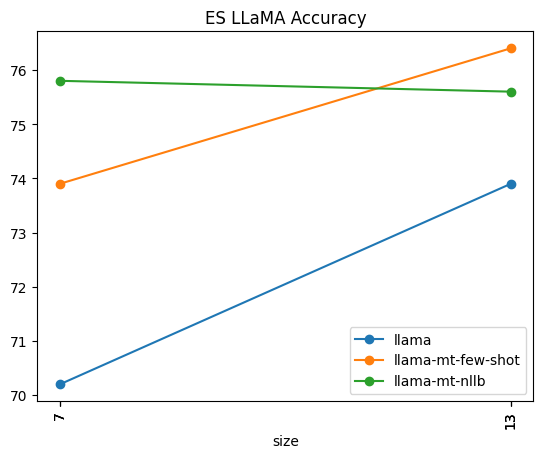

In [535]:
results_eu_llama_df.set_index("size", inplace=True)
results_eu_llama_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ES LLaMA Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## LLaMA RU

In [541]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "ru"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "ru"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "ru"].values[0][1:])

results_ru_llama_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [542]:
results_ru_llama_df

model_name              model  size   acc  ppl_cor  ppl_inc
0         7B              llama     7  68.4     7.78     8.20
1        13B              llama    13  71.0     7.11     7.56
2         7B      llama-mt-nllb     7  75.2    10.75    11.88
3        13B      llama-mt-nllb    13  76.2    10.50    11.67
4         7B  llama-mt-few-shot     7  73.5    11.64    11.64
5        13B  llama-mt-few-shot    13  76.6    10.81    10.81

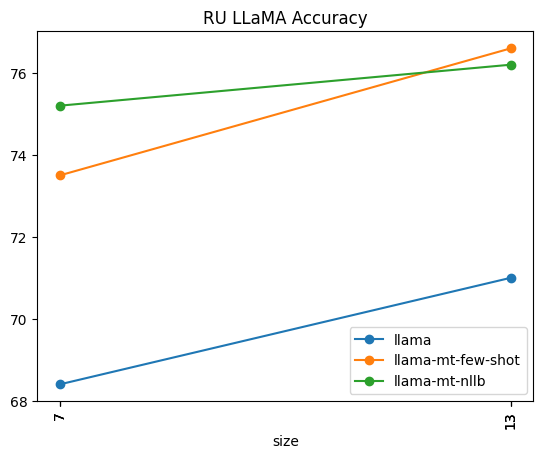

In [543]:
results_ru_llama_df.set_index("size", inplace=True)
results_ru_llama_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="RU LLaMA Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## LLaMA ZH

In [548]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "zh"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "zh"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "zh"].values[0][1:])

results_zh_llama_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [549]:
results_zh_llama_df

model_name              model  size   acc  ppl_cor  ppl_inc
0         7B              llama     7  61.2     8.37     8.61
1        13B              llama    13  63.3     7.40     7.65
2         7B      llama-mt-nllb     7  73.8    12.13    13.27
3        13B      llama-mt-nllb    13  74.3    11.85    13.05
4         7B  llama-mt-few-shot     7  66.9    12.66    12.66
5        13B  llama-mt-few-shot    13  69.0    11.84    11.84

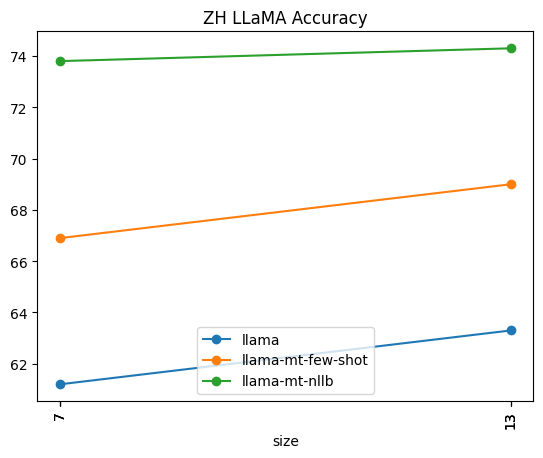

In [550]:
results_zh_llama_df.set_index("size", inplace=True)
results_zh_llama_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ZH LLaMA Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");

## LLaMA AVG

In [538]:
acc_eu, ppl_cor_eu, ppl_inc_eu = [], [], []
for df in acc_dfs:
    acc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_cor_dfs:
    ppl_cor_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])
for df in ppl_inc_dfs:
    ppl_inc_eu.extend(df.loc[df["lang"] == "avg"].values[0][1:])

results_avg_llama_df = pd.DataFrame(
    {
        "model_name": model_names,
        "model": models,
        "size": model_sizes,
        "acc": acc_eu,
        "ppl_cor": ppl_cor_eu,
        "ppl_inc": ppl_inc_eu,
    }
)


In [539]:
results_avg_llama_df

model_name              model  size   acc  ppl_cor  ppl_inc
0         7B              llama     7  60.9    16.75    17.22
1        13B              llama    13  60.1    14.12    14.57
2         7B      llama-mt-nllb     7  72.1    12.47    13.60
3        13B      llama-mt-nllb    13  73.2    12.20    13.39
4         7B  llama-mt-few-shot     7  61.0    12.47    12.47
5        13B  llama-mt-few-shot    13  62.0    13.54    13.54

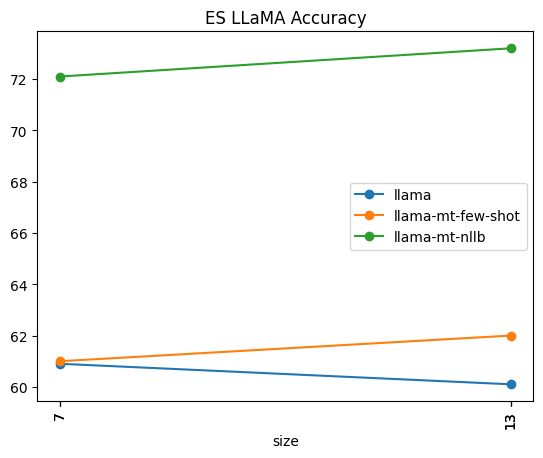

In [540]:
results_avg_llama_df.set_index("size", inplace=True)
results_avg_llama_df.groupby("model")["acc"].plot(
    x="size", y="acc", title="ES LLaMA Accuracy", legend=True, marker="o"
)
plt.xticks(model_sizes, model_sizes, rotation="vertical");